第5章: 係り受け解析  
夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をCaboChaを使って係り受け解析し，その結果をneko.txt.cabochaというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．  

40． 係り受け解析結果の読み込み（形態素）  
形態素を表すクラスMorphを実装せよ．このクラスは表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をメンバ変数に持つこととする．さらに，CaboChaの解析結果（neko.txt.cabocha）を読み込み，各文をMorphオブジェクトのリストとして表現し，3文目の形態素列を表示せよ．

In [1]:
import CaboCha

targetStr = '今日はたくさん歩いた。'

c = CaboCha.Parser()
tree =  c.parse(targetStr)
print(tree.toString(CaboCha.FORMAT_XML))


<sentence>
 <chunk id="0" link="2" rel="D" score="-1.727814" head="0" func="1">
  <tok id="0" feature="名詞,副詞可能,*,*,*,*,今日,キョウ,キョー">今日</tok>
  <tok id="1" feature="助詞,係助詞,*,*,*,*,は,ハ,ワ">は</tok>
 </chunk>
 <chunk id="1" link="2" rel="D" score="-1.727814" head="2" func="2">
  <tok id="2" feature="名詞,副詞可能,*,*,*,*,たくさん,タクサン,タクサン">たくさん</tok>
 </chunk>
 <chunk id="2" link="-1" rel="D" score="0.000000" head="3" func="4">
  <tok id="3" feature="動詞,自立,*,*,五段・カ行イ音便,連用タ接続,歩く,アルイ,アルイ">歩い</tok>
  <tok id="4" feature="助動詞,*,*,*,特殊・タ,基本形,た,タ,タ">た</tok>
  <tok id="5" feature="記号,句点,*,*,*,*,。,。,。">。</tok>
 </chunk>
</sentence>



In [18]:
!curl -LO http://www.cl.ecei.tohoku.ac.jp/nlp100/data/neko.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  943k  100  943k    0     0   160k      0  0:00:05  0:00:05 --:--:--  217k


In [3]:
def make_analyzed_file(input_file_name: str, output_file_name: str) -> None:
    """
    プレーンな日本語の文章ファイルを係り受け解析してファイルに保存する.
    (空白は削除します.)
    :param input_file_name プレーンな日本語の文章ファイル名
    :param output_file_name 係り受け解析済みの文章ファイル名
    """
    c = CaboCha.Parser()
    with open(input_file_name, encoding='utf-8') as input_file:
        with open(output_file_name, mode='w', encoding='utf-8') as output_file:
            for line in input_file:
                tree = c.parse(line.lstrip())
                output_file.write(tree.toString(CaboCha.FORMAT_LATTICE))


make_analyzed_file('neko.txt', 'neko.txt.cabocha')


In [24]:
# このクラスは表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をメンバ変数に持つこととする．
# さらに，CaboChaの解析結果（neko.txt.cabocha）を読み込み，各文をMorphオブジェクトのリストとして表現し，3文目の形態素列を表示せよ
class Morph :
    def __init__(self, surface, base, pos, pos1) :
        self.surface = surface
        self.base = base
        self.pos = pos
        self.pos1 = pos1
        
doc = []

skip_empty_line = False

with open("neko.txt.cabocha") as f :
    lines = f.readlines()
    sentense = []
    for line in lines:
        line = line[:-1]
        if line.startswith("*") :
            continue
        if line == "EOS" :
            if not skip_empty_line or len(sentense) > 0 :
#             if len(sentense) > 0 :
                doc.append(sentense)
            sentense = []
            continue
#         print(line) # for debugging
        surface, rest = line.split("\t")
        rest = rest.split(",")

        assert len(rest) >= 6
        pos, pos1, base = rest[0], rest[1], rest[6]

        m = Morph(surface, base, pos, pos1)
        sentense.append(m)

print(" ".join(map(lambda x: x.surface, doc[2])))
print(" / ".join(map(lambda x: x.surface, doc[2])))


吾輩 は 猫 で ある 。
吾輩 / は / 猫 / で / ある / 。



# List と Tuple の違い

- List:
    -  [　] で囲まれる
    -  メンバーとサイズを変更可能

- Tuple:
    - ( ) で囲まれる
    - 更新不可
    - "read-only" list 

In [23]:
# 組み込み関数map()と無名関数lambda（ラムダ式）とをあわせて使うと、リストの要素すべてを２倍する、
# （文字列要素を）一括置換する、といったようにリスト要素すべてに変更を加えたオブジェクトを取得することができます。

list_1 = [1, 3, 5]
list_2 = map(lambda x: x * 2, list_1)

# Python3でmap()関数の仕様が変りました
# Python2系では [2, 6, 10] というリストが返ってきましたが、3系では map object が返ってきます
print(list_2)  # <map object at XXXXXXXXX>

# Python3でリストとして取得したい場合
list_2 = list(map(lambda x: x * 2, list_1))
print(list_2)  # [2, 6, 10]

# tuple()関数を使うとタプルとして取得も可能
list_3 = tuple(map(lambda x: x * 2, list_1))
print(list_3)  # (2, 6, 10)

# 文字列連結の例
list_s_1 = ['高橋', '鈴木', '渡辺']
list_s_2 = list(map(lambda x: x + '様', list_s_1))
print(list_s_2)  # ['高橋様', '鈴木様', '渡辺様']

[2, 6, 10]
(2, 6, 10)
['高橋様', '鈴木様', '渡辺様']


41 係り受け解析結果の読み込み（文節・係り受け）  
40に加えて，文節を表すクラスChunkを実装せよ．このクラスは形態素（Morphオブジェクト）のリスト（morphs），係り先文節インデックス番号（dst），係り元文節インデックス番号のリスト（srcs）をメンバ変数に持つこととする．さらに，入力テキストのCaboChaの解析結果を読み込み，１文をChunkオブジェクトのリストとして表現し，8文目の文節の文字列と係り先を表示せよ．第5章の残りの問題では，ここで作ったプログラムを活用せよ．  

In [28]:
class Morph(object):
    def __init__(self, surface, base, pos, pos1):
        self.surface = surface
        self.base = base
        self.pos = pos
        self.pos1 = pos1

class Chunk :
    def __init__(self, idx=-1, morphs=[], dst=-1, srcs=[]):
            self.idx = idx
            self.morphs = morphs
            self.dst = dst
            self.srcs = srcs


doc = []

skip_empty_line = False

with open("neko.txt.cabocha") as f:
    lines = f.readlines()
    chunks = []
    chunk = Chunk()
    morphs = []
    for line in lines:
        line = line[:-1]
        # Enter new chunk
        if line.startswith("*"):
            if len(morphs) > 0:
                chunk.morphs = morphs
                chunks.append(chunk)
                morphs = []

            # parse chunk
            idx, dst, _, score = line[2:].split(" ")
            dst = dst[:-1]  # remove "D"
            idx, dst, score = int(idx), int(dst), float(score)
            chunk = Chunk(idx=idx, morphs=[], dst=dst, srcs=[])
            continue
        elif line == "EOS":
            if len(morphs) > 0:
                chunk.morphs = morphs
                chunks.append(chunk)
                morphs = []

            if not skip_empty_line or len(chunks) > 0:
                if len(chunks) > 0:
                    assert chunks[0].idx == 0
                for chunk in chunks:
                    chunk.srcs = (
                        list(map(lambda c: c.idx, filter(lambda c: chunk.idx == c.dst, chunks))))
                doc.append(chunks)
            chunks = []
            morphs = []
            continue

        # parse POS tagging result
        surface, rest = line.split("\t")
        rest = rest.split(",")

        assert len(rest) >= 6
        pos, pos1, base = rest[0], rest[1], rest[6]

        m = Morph(surface, base, pos, pos1)
        morphs.append(m)

n = 7
chunks = doc[n]
for chunk in chunks:
    print("idx: {}, dst: {}, srcs: {}".format(chunk.idx, chunk.dst, chunk.srcs))
    print(" ".join(map(lambda x: x.surface, chunk.morphs)))

idx: 0, dst: 5, srcs: []
吾輩 は
idx: 1, dst: 2, srcs: []
ここ で
idx: 2, dst: 3, srcs: [1]
始め て
idx: 3, dst: 4, srcs: [2]
人間 という
idx: 4, dst: 5, srcs: [3]
もの を
idx: 5, dst: -1, srcs: [0, 4]
見 た 。


42 係り元と係り先の文節の表示  
係り元の文節と係り先の文節のテキストをタブ区切り形式ですべて抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [35]:
class Morph(object):
    def __init__(self, surface, base, pos, pos1):
        self.surface = surface
        self.base = base
        self.pos = pos
        self.pos1 = pos1

class Chunk :
    def __init__(self, idx=-1, morphs=[], dst=-1, srcs=[]):
            self.idx = idx
            self.morphs = morphs
            self.dst = dst
            self.srcs = srcs


doc = []

skip_empty_line = False

with open("neko.txt.cabocha") as f:
    lines = f.readlines()
    chunks = []
    chunk = Chunk()
    morphs = []
    for line in lines:
        line = line[:-1]
        # Enter new chunk
        if line.startswith("*"):
            if len(morphs) > 0:
                chunk.morphs = morphs
                chunks.append(chunk)
                morphs = []

            # parse chunk
            idx, dst, _, score = line[2:].split(" ")
            dst = dst[:-1]  # remove "D"
            idx, dst, score = int(idx), int(dst), float(score)
            chunk = Chunk(idx=idx, morphs=[], dst=dst, srcs=[])
            continue
        elif line == "EOS":
            if len(morphs) > 0:
                chunk.morphs = morphs
                chunks.append(chunk)
                morphs = []

            if not skip_empty_line or len(chunks) > 0:
                if len(chunks) > 0:
                    assert chunks[0].idx == 0
                for chunk in chunks:
                    chunk.srcs = (
                        list(map(lambda c: c.idx, filter(lambda c: chunk.idx == c.dst, chunks))))
                doc.append(chunks)
            chunks = []
            morphs = []
            continue

        # parse POS tagging result
        surface, rest = line.split("\t")
        rest = rest.split(",")

        assert len(rest) >= 6
        pos, pos1, base = rest[0], rest[1], rest[6]

        m = Morph(surface, base, pos, pos1)
        morphs.append(m)
        
import sys

for chunks in doc:
    for chunk in chunks:
        srcs = list(filter(lambda c: c.idx in chunk.srcs, chunks))
        dst = list(filter(lambda c: c.idx == chunk.dst, chunks))
        for c in srcs + dst:
            morphs = list(
                filter(lambda m: m.pos != "記号", c.morphs))
            if len(morphs) > 1:
                for m in morphs[:-1]:
                    sys.stdout.write("{}\t".format(m.surface))
                sys.stdout.write("{}\n".format(morphs[-1].surface))


猫	で	ある
吾輩	は
名前	は
生れ	た	か
どこ	で
つか	ぬ
つか	ぬ
つか	ぬ
生れ	た	か
見当	が
何	でも
所	で
所	で
じめじめ	し	た
泣い	て
泣い	て
所	で
記憶	し	て	いる
記憶	し	て	いる
泣い	て
いた事	だけ	は
見	た
始め	て
ここ	で
人間	という
始め	て
もの	を
人間	という
見	た
吾輩	は
もの	を
種族	で	あっ	た	そう	だ
聞く	と
あと	で
種族	で	あっ	た	そう	だ
種族	で	あっ	た	そう	だ
人間	中	で
書生	という
種族	で	あっ	た	そう	だ
獰悪	な
種族	で	あっ	た	そう	だ
聞く	と
それ	は
人間	中	で
獰悪	な
書生	という	の	は
話	で	ある
捕え	て
捕え	て
我々	を
煮	て
捕え	て
食う	という
煮	て
話	で	ある
書生	という	の	は
食う	という
思わ	なかっ	た
当時	は
なかっ	た	から
考	も
何	という
なかっ	た	から
当時	は
考	も
思わ	なかっ	た
思わ	なかっ	た
思わ	なかっ	た
なかっ	た	から
載せ	られ	て
掌	に
彼	の
載せ	られ	て
掌	に
持ち上げ	られ	た
持ち上げ	られ	た
載せ	られ	て
スー	と
持ち上げ	られ	た
フワフワ	し	た
フワフワ	し	た
感じ	が
フワフワ	し	た
あっ	た	ばかり	で	ある
感じ	が
上	で
掌	の
落ちつい	て
落ちつい	て
上	で
見	た	の	が
顔	を
書生	の
見	た	の	が
落ちつい	て
顔	を
人間	という
人間	という
見	た	の	が
もの	の
人間	という
見	始	で	あろ	う
もの	の
もの	だ	と
もの	だ	と
妙	な
思っ	た
もの	だ	と
感じ	が
思っ	た
残っ	て	いる
残っ	て	いる
感じ	が
今	でも
装飾	さ	れ	べき	はず	の
第	一	毛	をもって
顔	が
装飾	さ	れ	べき	はず	の
つるつる	し	て
顔	が
薬缶	だ
薬缶	だ
つるつる	し	て
逢っ	た	が
逢っ	た	が
逢っ	た	が
猫	に	も
片	輪	に	は
出会わ	し	た
一	度	も
事	が
出会わ	し	た
逢っ	た	が
片	輪	に	は
事	が
突起	し	て	いる
真中	が
顔	の
突起	し	て	いる
突起	し	て	いる
のみ	なら	ず
真中	が
中	から
その	穴	の
中	から
ぷうぷうと

思わ	れ	ない
思わ	れ	ない
猫	と	も
良家	の
思わ	れ	ない
察	する	と
猫	と	も
暮し	て	いる	らしい
切っ	て
肥満	し	て	いる
切っ	て
ところ	を
肥満	し	て	いる
見る	と
ところ	を
食っ	てる	らしい
食っ	てる	らしい
見る	と
御馳走	を
暮し	て	いる	らしい
暮し	て	いる	らしい
食っ	てる	らしい
豊か	に
聞か	ざる	を	得	なかっ	た
誰	だい	と
誰	だい	と
誰	だい	と
云う	君	は
聞か	ざる	を	得	なかっ	た
吾輩	は
誰	だい	と
黒	よ	昂然	たる
黒	よ	昂然	たる
己	れ	あ
車屋	の
もの	だ
黒	よ	昂然	たる
黒	は
車屋	の
乱暴	猫	で	ある
近辺	で
知ら	ぬ
近辺	で
知ら	ぬ
乱暴	猫	で	ある
乱暴	猫	で	ある
黒	は
交際	し	ない
強い	ばかり	で
車屋	だけ	に
ない	から
ない	から
ない	から
強い	ばかり	で
教育	が
交際	し	ない
交際	し	ない
交際	し	ない
ない	から
誰	も
的	に
同盟	敬遠	主義	の
なっ	て	いる
的	に
奴	だ
なっ	て	いる
起す	と	同時に
名	を
彼	の
聞い	て
名	を
起す	と	同時に
感じ	を
起す	と	同時に
吾輩	は
聞い	て
感じ	を
生じ	た	の	で	ある
生じ	た	の	で	ある
生じ	た	の	で	ある
念	も
軽侮	の
生じ	た	の	で	ある
起す	と	同時に
一方	で	は
念	も
見	た
試し	て	みよ	う	と
無学	で	ある	か	を
無学	で	ある	か	を
彼	が
試し	て	みよ	う	と
無学	で	ある	か	を
思っ	て
試し	て	みよ	う	と
見	た
問答	を
左	の
し	て
問答	を
見	た
吾輩	は
思っ	て
し	て
教師	と	は
一体	車	屋	と
えらい	だろ	う
えらい	だろ	う
教師	と	は
どっち	が
方	が
車屋	の
強い	に
方	が
いら	あ	な
いら	あ	な
強い	に
極	って
うち	の
御	め	え	の
主人	を
うち	の
見	ねえ
主人	を
皮	ばかり	だ	ぜ
皮	ばかり	だ	ぜ
皮	ばかり	だ	ぜ
見	ねえ
骨	と
大分	強	そう	だ
猫	だけ	に
車屋	の
大分	強	そう	だ
君	も
猫	だけ	に
いる	と
車屋	に
食える	と
食える	と
いる	と
御馳走	が
見える	ね
食える

もの	だ	から
感服	し	た
見	たり	し	て	いる
する	か	と
する	か	と
やめ	に
思う	と
する	か	と
見	たり	し	て	いる
見	たり	し	て	いる
見	たり
横	から
見	たり	し	て	いる
見	たり	し	て	いる
もの	だ	から
思う	と
見	たり
竪	から
拗じ	向け	たり
からだ	を
見る	よう	に	し	たり
延ばし	て
手	を
見る	よう	に	し	たり
見る	よう	に	し	たり
見る	よう	に	し	たり
拗じ	向け	たり
延ばし	て
年寄	が
三世相	を
見	て	いる
むい	て
方	へ
窓	の
むい	て
方	へ
持っ	て	来	たり	し	て
先	まで
鼻	の
持っ	て	来	たり	し	て
むい	て
先	まで
見	て	いる
見る	よう	に	し	たり
持っ	て	来	たり	し	て
やめ	て	くれ	ない	と
揺れ	て
膝	が
やめ	て	くれ	ない	と
揺れ	て
険	呑	で
事	で
ようやく	の
劇	しく	なくなっ	た	と
劇	しく	なくなっ	た	と
劇	しく	なくなっ	た	と
事	で
動揺	が
思っ	たら
劇	しく	なくなっ	た	と
声	で
かい	た	の	だろ	う	と
かい	た	の	だろ	う	と
かい	た	の	だろ	う	と
声	で
何	を
思っ	たら
かい	た	の	だろ	う	と
感服	し	た	が
色	に	は
絵	端書	の
感服	し	た	が
主人	は
色	に	は
動物	の
かい	て	ある
正体	が
動物	の
分ら	ぬ	ので
正体	が
し	た
し	た
さっき	から
苦心	を
もの	と
し	た
感服	し	た	が
分ら	ぬ	ので
もの	と
絵	端書	か	と
絵	端書	か	と
分ら	ぬ
思い	ながら
絵	端書	か	と
肖像	だ
眼	を
寝	て	い	た
開い	て
開い	て
開い	て
眼	を
上品	に
肖像	だ
払っ	て
見る	と
払っ	て
見る	と
紛れ	も
肖像	だ
肖像	だ
思い	ながら
開い	て
自分	の
極め込ん	だ
極め込ん	だ
主人	の	よう	に
アンドレア・デル・サルト	を
もの	で	も	ある	まい	が
極め込ん	だ
出来	て	いる
整っ	て
色彩	も
形体	も
整っ	て
整っ	て
画家	だけ	に
色彩	も
出来	て	いる
もの	で	も	ある	まい	が
整っ	て
見	た	って
誰	が
相違	ない
相違	ない
見	た	って
猫	に
眼識	の
もの	なら


着	換え	ない	の	か
面倒	だ	から
有っ	て	も
着	換え	ない	の	か
ない	から	か
面倒	だ	から
分ら	ぬ
分ら	ぬ
着	換え	ない	の	か
吾輩	に	は
思わ	れ	ない
思わ	れ	ない
ため	と	も
失恋	の
思わ	れ	ない
これ	だけ	は
ため	と	も
出	て
両人	が
行っ	た
出	て
あと	で
行っ	た
頂戴	し	た
頂戴	し	た
失敬	し	て
頂戴	し	た
食い切っ	た
寒月	君	の
蒲鉾	の
食い切っ	た
残り	を
蒲鉾	の
頂戴	し	た
あと	で
吾輩	は
失敬	し	て
残り	を
猫	で	は	ない
頃	で	は
猫	で	は	ない
猫	で	は	ない
吾輩	も
頃	で	は
普通	一般	の
ある	と
猫	か
桃川	如燕	以後	の
ある	と
金魚	を
グレー	の
偸	ん	だ
金魚	を
猫	くらい	の
偸	ん	だ
資格	は
猫	くらい	の
ある	と
ある	と
猫	か
資格	は
ある	と
黒	など	は
車屋	の
黒	など	は
固	より
眼中	に
一切	くらい
蒲鉾	の
頂戴	し	た	って
一切	くらい
云わ	れる
云わ	れる
云わ	れる
頂戴	し	た	って
人	から
事	も
云わ	れる
なかろ	う
事	も
事	で	は	ない
人目	を
忍ん	で
人目	を
する	という
する	という
忍ん	で
間食	を
癖	は
する	という
事	で	は	ない
限っ	た
限っ	た
何	も
吾	等	猫	族	に
事	で	は	ない
癖	は
限っ	た
御	三	など	は
うち	の
失敬	し	て	いる
失敬	し	て	は
留守	中	に
細君	の
失敬	し	て	は
失敬	し	て	は
留守	中	に
餅菓子	など	を
頂戴	し
失敬	し	て	は
失敬	し	て	いる
失敬	し	て	いる
御	三	など	は
頂戴	し
頂戴	し	て	は
仕付	を
上品	な
仕付	を
御	三	ばかり	じゃ	ない
上品	な
受け	つつ	ある	と
仕付	を
吹聴	せら	れ	て	いる
吹聴	せら	れ	て	いる
受け	つつ	ある	と
細君	から
小児	で	すら
吹聴	せら	れ	て	いる
傾向	が
小児	で	すら
傾向	が
こと	で	あっ	た	が
四	五	日	前	の
着い	た
小	供	が
二	人	の
覚まし	て
覚まし	て
覚まし	て
覚まし	て
小	供	が
馬鹿	に
早く	から
眼	を
着い	た
寝	て	いる
寝	て	いる
主人

食い	たく	は	ない	の	で	ある
云う	と
実	を
食い	たく	は	ない	の	で	ある
食い	たく	は	ない	の	で	ある
食い	たく	は	ない	の	で	ある
せ	しむ
吾輩	は
云う	と
雑煮	を
厭	に	なっ	た	の	で	ある
様子	を
椀	底	の
熟視	すれ	ば
様子	を
熟視	すれ	ば
気味が悪く	なっ	て
食う	の	が
気味が悪く	なっ	て
厭	に	なっ	た	の	で	ある
食う	の	が
開け	た	なら
開け	た	なら
開け	た	なら
開け	た	なら
御	三	でも
勝手口	を
聞き	得	た	なら
小	供	の
奥	の
足音	が
小	供	の
近付く	の	を
近付く	の	を
足音	が
こちら	へ
聞き	得	た	なら
開け	た	なら
近付く	の	を
浮ば	なかっ	たろ	う
浮ば	なかっ	たろ	う
惜気	も
見棄て	たろ	う	しかも
見棄て	たろ	う	しかも
椀	を
浮ば	なかっ	たろ	う
事	は
雑煮	の
浮ば	なかっ	たろ	う
浮ば	なかっ	たろ	う
浮ば	なかっ	たろ	う
聞き	得	た	なら
吾輩	は
見棄て	たろ	う	しかも
事	は
来年	まで
念頭	に
来	ない
来	ない
誰	も
来	ない
来	ない
来	ない
来	ない
いくら	躇	し	て	い	て	も
誰	も
食わ	ぬ	か
食わ	ぬ	か	と
食わ	ぬ	か
催促	さ	れる	よう	な
食わ	ぬ	か	と
心持	が
催促	さ	れる	よう	な
心持	が
念じ	た
中	を
椀	の
覗き	込み	ながら
中	を
来	て	くれれ	ば	いい	と
来	て	くれれ	ば	いい	と
来	て	くれれ	ば	いい	と
覗き	込み	ながら
誰	か
念じ	た
吾輩	は
来	て	くれれ	ば	いい	と
来	て	くれ	ない
来	て	くれ	ない
誰	も
食わ	なけれ	ば	なら	ぬ
食わ	なけれ	ば	なら	ぬ
食わ	なけれ	ば	なら	ぬ
吾輩	は
雑煮	を
重量	を
重量	を
最後	に	から	だ
全体	の
落す	よう	に	し	て
底	へ
椀	の
落す	よう	に	し	て
重量	を
底	へ
食い込ん	だ
餅	の
あぐり	と
角	を
餅	の
食い込ん	だ
食い込ん	だ
落す	よう	に	し	て
角	を
一寸	ばかり
食い	付い	た	の	だ	から
込め	て
力	を
食い	付い	た	の	だ	から
込め	て
噛み	切れる	訳	だ	が
もの	なら
大抵	な
噛み	切れる

ざあ	年	が
え	方	だろ	う
お	めで	て
つけろ	い
気	を
向う	面	め
向う	面	め
向う	面	め
向う	面	め
つけろ	い
子	の
向う	面	め
向う	づら	という
向う	づら	という
子	の
句	は
向う	づら	という
言語	で	ある	よう	だ	が
言語	で	ある	よう	だ	が
句	は
罵詈	の
出来	なかっ	た
出来	なかっ	た
出来	なかっ	た
言語	で	ある	よう	だ	が
吾輩	に	は
了解	が
う	が	吹い
う	が	吹い
伺	が
向う	づら	と
向う	づら	と
う	が	吹い
子	の
云う	の	は
向う	づら	と
意味	か	ね
意味	か	ね
云う	の	は
事	よ
手	め	え	が
つかれ	てる
つかれ	てる
手	め	え	が
悪	体	を
癖	に
つかれ	てる
事	よ
訳	を
訳	を
世話	あ	ねえ
事	よ
事	よ
事	よ
意味	か	ね
癖	に
世話	あ	ねえ
正月	野郎	だって
正月	野郎	は
事	よ
詩的	で	ある	が
正月	野郎	は
文句	で	ある
意味	に
至る	と
意味	に
至る	と
文句	で	ある
何とか	より	も
子	の
文句	で	ある
不明瞭	な
文句	で	ある
詩的	で	ある	が
何とか	より	も
不明瞭	な
参考	の
聞い	て	おき	たい	が
聞い	て	おき	たい	が
おっ	た
得	られ	ぬ	に
答弁	は
明瞭	な
得	られ	ぬ	に
聞い	た	って
答弁	は
極まっ	て	いる	から
得	られ	ぬ	に
おっ	た
対	っ	た	まま
面	と
立っ	て
立っ	て
対	っ	た	まま
無言	で
おっ	た
聞い	て	おき	たい	が
極まっ	て	いる	から
立っ	て
体	で	ある
体	で	ある
手持無沙汰	の
うち	の
黒	の
神	さん	が
うち	の
声	を
張り	揚げ	て
声	を
上げ	て
おや	棚	へ
置い	た
上げ	て
鮭	が
置い	た
神	さん	が
張り	揚げ	て
鮭	が
取っ	た	ん	だ	よ
畜生	が
あの	黒	の
取っ	た	ん	だ	よ
畜生	が
猫	だっ	ちゃ	ありゃ
あ	し	ない
猫	だっ	ちゃ	ありゃ
帰っ	て	来	たら
今	に
いやがれ	と
する	か
見	て
する	か
いやがれ	と
帰っ	て	来	たら
見	て
いやがれ	と
空気	を
空気	を
初春	の
長閑	な
震動	さ	せ	て
震動	さ	せ	て
空気	を
無遠慮	に
俗	了	し	

もの	じゃ	あり	ませ	ん	か
やる	ん	です
芝居	見	た	よう	な
もの	です	な
書割	が
ええ	衣装	と
書割	が
もの	です	な
もの	です	な
もの	じゃ	あり	ませ	ん	か
くらい	な
行き	ます	か
行き	ます	か
行き	ます	か
もの	です	な
失礼	ながら
思い	ます
成功	し	た
成功	し	た
第	一	回	として	は
方	だ	と
成功	し	た
思い	ます
行き	ます	か
方	だ	と
所	な	んで
やっ	た	と
やっ	た	と
やっ	た	と
心中	物	と
いう	と
心中	物	と
所	な	んで
船頭	が
乗せ	て
御	客	を
船頭	が
乗せ	て
芳原	へ
所	な	んで
思い	ます
いう	と
やり	まし	た	な	と
幕	を
大変	な
やり	まし	た	な	と
所	な	んで
幕	を
やり	まし	た	な	と
教師	だけ	に
首	を
吹き出し	た
鼻	から
日の出	の
吹き出し	た
煙り	が
日の出	の
掠め	て
掠め	て
煙り	が
耳	を
横手	へ
顔	の
掠め	て
横手	へ
ない	ん	です
大変	な
事	も
大変	な
ない	ん	です
事	も
人物	は
登場	の
見番	だけ	です	から	と
船頭	と
御	客	と
仲居	と
仲居	と
船頭	と
花魁	と
遣手	と
仲居	と
見番	だけ	です	から	と
人物	は
遣手	と
もの	で	ある
もの	で	ある
もの	で	ある
見番	だけ	です	から	と
東風	子	は
平気	な
し	た	が
名	を
花魁	という
きい	て
名	を
し	た	が
顔	を
し	た	が
主人	は
きい	て
顔	を
呈出	し	た
見番	という
術語	について
見番	という
見え	て
智識	が
明瞭	の
なかっ	た	と
智識	が
見え	て
術語	について
なかっ	た	と
呈出	し	た
呈出	し	た
呈出	し	た
し	た	が
見え	て
質問	を
もの	です	か	な
下婢	に
娼家	の
下婢	に
もの	です	か	な
仲居	という	の	は
思い	ます
見	ませ	ん	が
見	ませ	ん	が
見	ませ	ん	が
見	ませ	ん	が
研究	は
し	て
思い	ます
遣手	という	の	が
下女	で
茶屋	の
遣手	という	の	が
仲居	は
下女	で
見	た	よう	な
女	部屋	の
見	た	よう	な
遣手	という	の	が
もの	だろ	う	と
見	た	よう	な
思い	ます
も

肺病	とか
もの	が
出来	て	のう
近頃	は
もの	が
ペスト	だ	の	って
頃	の	よう	に
ペスト	だ	の	って
ペスト	だ	の	って
頃	の	よう	に
肺病	だの
病気	ばかり
殖え	た
病気	ばかり
殖え	た
隙	も
にゃ	油断	も
ペスト	だ	の	って
隙	も
出来	て	のう
いか	ん	よ
旧幕	時代	に
者	に
ない	から
者	は
碌	な
ない	から
者	に
者	は
つけ	ない	と
つけ	ない	と
つけ	ない	と
ない	から
御前	も
気	を
いか	ん	よ
つけ	ない	と
そう	で	ござい	ましょ	う	か	ねえ
いか	ん	よ
感動	し	て	いる
感動	し	て	いる
下女	は
大	に
引く	と
風邪	を
いっ	て	も
引く	と
出	ある	き	も	し	ない	よう	だっ	た	に
出	ある	き	も	し	ない	よう	だっ	た	に
いっ	て	も
出来	まし	て	ね
出来	まし	て	ね
出来	まし	て	ね
出来	まし	て	ね
出来	まし	て	ね
友達	が
出来	まし	て	ね
出	ある	き	も	し	ない	よう	だっ	た	に
いえ	ね
それ	が
近頃	は
友達	が
大	得意	で	ある
秘密	で	も
国事	の
秘密	で	も
時	の	よう	に
大	得意	で	ある
下女	は
時	の	よう	に
雄	猫	で	ござい	ます	よ
教師	の
ええ	あの	表通り	の
所	に
教師	の
所	に
雄	猫	で	ござい	ます	よ
雄	猫	で	ござい	ます	よ
人	で	ござん	す
云う	の	は
教師	と
人	で	ござん	す
無作法	な
声	を
無作法	な
声	を
人	か	え
人	で	ござん	す
ええ	顔	を
たんび	に
絞め殺さ	れる	よう	な
絞め殺さ	れる	よう	な
たんび	に
鵝鳥	が
声	を
絞め殺さ	れる	よう	な
声	を
人	で	ござん	す
雄	猫	で	ござい	ます	よ
云う	の	は
人	か	え
絞め殺さ	れる	よう	な
鵝鳥	が
声	は
絞め殺さ	れる	よう	な
形容	で	ある
形容	で	ある
声	は
主人	は
吾輩	の
毎	朝風呂	場	で
含嗽	を
つっ	突い	て
つっ	突い	て
楊枝	で
咽喉	を
声	を
妙	な
つっ	突い	て
声	を
無遠慮	に
癖	が
主人	は
癖	が
機嫌	の
時	は
あ	やる
あ	やる
やけに	が
あ	が
機嫌	の
時	は
づい	て
時	は
あ	やる
時

笑っ	て	い	た	が
口	を
静か	な
調子	で	ある
静か	な
思わ	れ	ませ	ん	が
見る	と
伺っ	て
思わ	れ	ませ	ん	が
事	で
不思議	な
思わ	れ	ませ	ん	が
有り	そう	に	も
思わ	れ	ませ	ん	が
見る	と
事	で
有り	そう	に	も
なり	ませ	ん
もの	です	から
似	た	よう	な
似	た	よう	な
自分	で
経験	を
似	た	よう	な
近頃	し	た
近頃	し	た
経験	を
もの	です	から
私	など	は
近頃	し	た
なり	ませ	ん
疑	が
少し	も
なり	ませ	ん
気	に
なり	ませ	ん
思わ	れ	ませ	ん	が
もの	です	から
疑	が
気	に
縊	り	たく	なっ	た	の
首	を
おや	君	も
縊	り	たく	なっ	た	の
首	じゃ	ない	んで
首	じゃ	ない	んで
私	の	は
思わ	れ	ます
明けれ	ば
出来事	です	から
暮	の
昨年	の
事	で
暮	の
出来事	です	から
出来事	です	から
出来事	です	から
起っ	た
起っ	た
同	刻	くらい	に
出来事	です	から
明けれ	ば
事	で
先生	と
起っ	た
思わ	れ	ます
不思議	に
思わ	れ	ます
これ	も
出来事	です	から
不思議	に
面白い	と
面白い	と
迷亭	も
空也	餅	を
あり	まし	て
知人	の
向島	の
家	で
知人	の
あり	まし	て
あり	まし	て
その	日	は
家	で
忘年会	兼	合奏	会	が
携え	て	行き	まし	た
携え	て	行き	まし	た
携え	て	行き	まし	た
携え	て	行き	まし	た
あり	まし	て
私	も
それ	へ
ヴァイオリン	を
令夫人	が
十	五	六	人	令嬢	やら
集っ	て
令夫人	が
盛会	で
盛会	で
集っ	て
整っ	て	い	まし	た
快事	と
近来	の
快事	と
くらい	に
整っ	て	い	まし	た
整っ	て	い	まし	た
盛会	で
くらい	に
万事	が
晩餐	も
すん	で
すん	で
合奏	も
出	て
話し	が
四方	の
出	て
すん	で
話し	が
大分	遅く	なっ	た	から
大分	遅く	なっ	た	から
出	て
時刻	も
帰ろ	う	か	と
し	て
し	て
暇乞い	を
帰ろ	う	か	と
大分	遅く	なっ	た	から
し	て
思っ	て	い	ます	と
帰ろ	う	か	と
見受け	ませ	ん	でし	た	から
夫人	が
某	博士	の
来	て


御	気分	さえ
悪い	です	よ	と
悪い	です	よ	と
悪く	なけれ	ば
気分	は
悪い	です	よ	と
僕	が
上げ	ます	から
上げ	ます	から
水薬	を
頓服	と
上げ	ます	から
ともかく	も
水薬	を
危ない	よう	に	なり	そう	です	な
危ない	よう	に	なり	そう	です	な
危ない	よう	に	なり	そう	です	な
上げ	ます	から
へえ	どう	か
なる	と	いけ	ませ	ん	よ	と
事	じゃ	ござい	ませ	ん
決して	御	心配	に
ほど	の
事	じゃ	ござい	ませ	ん
ほど	の
なる	と	いけ	ませ	ん	よ	と
なる	と	いけ	ませ	ん	よ	と
なる	と	いけ	ませ	ん	よ	と
危ない	よう	に	なり	そう	です	な
事	じゃ	ござい	ませ	ん
神経	を
御	起し	に
なる	と	いけ	ませ	ん	よ	と
先生	が
過ぎ	た
過ぎ	た
三	時	は
三	十	分
下女	を
薬	取り	に
厳命	で
細君	の
出し	て
出し	て
厳命	で
馳	け
行っ	て
出し	て
返っ	て	くる
出し	て
馳	け
返っ	て	くる
行っ	て
出し	て
十	五	分	前	で	ある
四	時
四	時	に	は
十	五	分
来	た
十	五	分	前	頃	から
四	時
無かっ	た	のに
無かっ	た	のに
無かっ	た	のに
十	五	分	前	頃	から
今	まで
何	と	も
来	た
来	た
来	た
来	た
来	た
無かっ	た	のに
急	に
嘔気	を
出	て	くる
注い	で
注い	で
水薬	を
茶碗	へ
置い	て	くれ	た	から
前	へ
僕	の
置い	て	くれ	た	から
注い	で
前	へ
出	て	くる
取り上げ	て
茶碗	を
飲も	う	と	する	と
取り上げ	て
出	て	くる
胃	の
ー	と
者	が
吶喊	し	て
者	が
出	て	くる
細君	は
置い	て	くれ	た	から
飲も	う	と	する	と
吶喊	し	て
やむをえ	ず
茶碗	を
下	へ
逼	る
なっ	たら
なっ	たら
御	飲み	に
い	でしょ	う	と
い	でしょ	う	と
なっ	たら
逼	る
細君	は
い	でしょ	う	と
飲ん	で
出掛け	なく	て	は
出掛け	なく	て	は
飲ん	で
出掛け	なく	て	は
義理	が
飲ん	で	しまお	う	と	また
思い切っ	て
つける	と
つける	と
つける	と
飲ん	で	しまお	う	と	また
茶碗	を
唇	へ
つける	

考え	て	いる	らしい
宛	も
考え	て	いる	らしい
よる	と
なる	だろ	う	と
書き流し	た
人	で	ある	と
研究	し
空間	を
研究	し
論語	を
焼	芋	を
人	で	ある	と
鼻汁	を
人	で	ある	と
天然	居士	は
書き流し	た
書き流し	た
書き流し	た
人	で	ある	と
言文	一致	体	で
一気呵成	に
文章	で	ある
ごたごた	し	た
文章	で	ある
書き流し	た
ごたごた	し	た
笑っ	た	が
朗読	し	て
朗読	し	て
これ	を
笑っ	た	が
いつ	に
笑っ	た	が
面白い	と
笑っ	た	が
主人	は
朗読	し	て
面白い	と
垂らす	の	は
鼻汁	を
消そ	う	と
酷	だ	から
消そ	う	と
垂らす	の	は
酷	だ	から
句	だけ	へ
笑っ	た	が
消そ	う	と
句	だけ	へ
棒	を
一	本	で
ところ	を
三	本
二	本	引き
ところ	を
三	本
併行	線	を
奇麗	な
併行	線	を
引い	て	いる
食み出し	て	も	構わ	ず
行	まで
ほか	の
食み出し	て	も	構わ	ず
線	が
行	まで
引い	て	いる
食み出し	て	も	構わ	ず
並ん	で	も
並ん	で	も
線	が
八	本
出来	ない	と
句	が
あと	の
出来	ない	と
並ん	で	も
句	が
見え	て
出来	ない	と
捨て	て
筆	を
捻っ	て
髭	を
見え	て
今度	は
捨て	て
捻っ	て
捻り出し	て
捻り出し	て
文章	を
髭	から
入れ	ます	と
入れ	ます	と
捻り出し	て
御覧	に
入れ	ます	と
見幕	で
捻っ	て	は
捻っ	て	は
見幕	で
猛烈	に
捻っ	て	は
坐	わる
下ろし	て	いる
ところ	へ
下ろし	て	いる
坐	わる
出	て	来	て
出	て	来	て
茶の間	から
妻君	が
坐	わる
坐	わる
鼻	の
主人	の
先	へ
鼻	の
坐	わる
ところ	へ
出	て	来	て
ぴたり	と
先	へ
ちょっと	と
ちょっと	と
叩く	よう	な
叩く	よう	な
水中	で
銅鑼	を
声	を
叩く	よう	な
なん	だ	と
主人	は
声	を
気に入ら	ない	と
返事	が
見え	て
気に入ら	ない	と
ちょっと	と
見え	て
妻君	は	また
ちょっと	と
穴	へ
鼻	の
入れ	て
人さし指	を
親指	と
入れ	て
穴	へ
人さし指	を
なん	だ	よ	と
今度	は
入れ	て
鼻毛

負け	ない	か	と
負け	ない	か	と
もん	だ	から
云う	と
負け	ない	か	と
焚い	て	しまっ	た	そう	です
女	が
くべ	て
くべ	て
内	の
九	冊	の
三	冊	を
内	の
くべ	て
くべ	て
女	が
三	冊	を
火	に
焚い	て	しまっ	た	そう	です
云う	ん	です	って
云う	と
くべ	て
し	まし	た	な
事	を
し	まし	た	な
焚い	て	しまっ	た	そう	です
事	を
書い	て	ある	ん	です	って
本	の
内	に	は
本	の
書い	て	ある	ん	です	って
何	か
予言	か
見	られ	ない
見	られ	ない
何	か
ほか	で
事	が
見	られ	ない
書い	て	ある	ん	です	って
し	まし	た	な
内	に	は
事	が
くべ	た	そう	です
くべ	た	そう	です
なっ	た	から
なっ	た	から
なっ	た	から
王様	は
九	冊	が
六	冊	に
減っ	たろ	う	と
減っ	たろ	う	と
減っ	たろ	う	と
なっ	た	から
少し	は
価	も
思っ	て
減っ	たろ	う	と
聞く	と
聞く	と
聞く	と
思っ	て
六	冊	で
いくら	だ	と
くべ	た	そう	です
引か	ない	そう	です
元	の
引か	ない	そう	です
引か	ない	そう	です
一文	も
乱暴	だ	と
乱暴	だ	と
引か	ない	そう	です
それ	は
云う	と
乱暴	だ	と
くべ	た	そう	です
女	は	また
くべ	た	そう	です
とっ	て
三	冊	を
くべ	た	そう	です
くべ	た	そう	です
書い	て	ある	ん	です	って
聞く	と
云う	と
女	は	また
とっ	て
火	に
云う	そう	です
あっ	た	と
あっ	た	と
未練	が
見え	て
あっ	た	と
売る	と
三	冊	を
余っ	た
売る	と
売る	と
見え	て
三	冊	を
いくら	で
聞く	と
売る	と
云う	そう	です
くれ	と
くれ	と
九	冊	分	の	ね	だ	ん	を
云う	そう	です
王様	は
聞く	と
くれ	と
九	冊	が
六	冊	に
なっ	て	も
なっ	て	も
なっ	て	も
六	冊	が
三	冊	に
くべる	かも	知れ	ない	ので
くべる	かも	知れ	ない	ので
元	の
引か	ない
引か	ない
一	厘	も
引か	せよ	う	と	する	と
引か	せよ	う	と	する	と
引か	ない
それ	を
くべる	かも	知れ	ない	ので
三	冊	

迷亭	が
一致	する
面白い	と
一致	する
一致	する
云う	と
面白い	と
主人	も
釣ら	れる	と
釣ら	れる	と
釣ら	れる	と
女	が
同	距離	に
仮定	し	ます
釣ら	れる	と
仮定	し	ます
一	番地	面	に
二	人	の
女	の
二	人	の
首	と
女	の
首	を
首	と
繋い	で	いる
首	を
縄	は
繋い	で	いる
仮定	し	ます
仮定	し	ます
縄	は
ホリゾンタル	と
し	ます
し	ます
６	を
縄	が
地平線	と
角度	と
角度	と
し	ます
し	ます
各部	が
縄	の
６	を
各部	が
力	と
力	と
做	し
し	ます
し	ます
部分	の
部分	の
縄	の
部分	の
力	と
し	ます
１	α	２
１	2
做	し
７	は
力	と
御	承知	下さい
御	承知	下さい
体重	と
女	の
御	承知	下さい
体重	と
御	分り	に
どう	です
なり	まし	た	か
御	分り	に
主人	は
迷亭	と
見合せ	て
顔	を
分っ	た	と
主人	は
見合せ	て
分っ	た	と
作っ	た	の	だ	から
大抵	と
大抵	と
度合	は
作っ	た	の	だ	から
作っ	た	の	だ	から
作っ	た	の	だ	から
度合	は
両人	が
勝手	に
出来	ない	かも	知れ	ない
場合	に	は
他人	の
出来	ない	かも	知れ	ない
出来	ない	かも	知れ	ない
作っ	た	の	だ	から
場合	に	は
応用	が
立ち	ます
御存じ	の
多角	形	に関する
平均	性	理論	に
御存じ	の
より	ます	と
平均	性	理論	に
立ち	ます
立ち	ます
方程式	が
十	二	の
立ち	ます
より	ます	と
下	の	ごとく
方程式	が
1	)	T	2	cos	2	=	T	3	cos	3
T	1	cos	1	=	T	2	cos	2	(
(	2	)
1	)	T	2	cos	2	=	T	3	cos	3
沢山	だろ	う	と
沢山	だろ	う	と
くらい	で
沢山	だろ	う	と
(	2	)
方程式	は
くらい	で
事	を
乱暴	な
沢山	だろ	う	と
主人	は
事	を
首脳	な	ん	です	が	と
式	が
首脳	な	ん	です	が	と
首脳	な	ん	です	が	と
式	が
演説	の
気	に
首脳	な	ん	です	が	と
寒月	君	は
気	に
しよ	う	じゃ	ない	か	と
しよ	う	じゃ	ない	か	と
逐っ	て
事	

なり	たい	と
それ	じゃ
御	令嬢	を
寒月	に
お	やり	に
おっしゃる	んで
なり	たい	と
えん	じゃ	無い	ん	です	と
えん	じゃ	無い	ん	です	と
宜しい	の	で	ござい	ます	が
おっしゃる	んで
やり	たい	なんて
えん	じゃ	無い	ん	です	と
鼻	子	は
急	に
主人	を
有る	ん	です	から
有る	ん	です	から
有る	ん	です	から
ほか	に	も
口	が
困りゃ	し	ませ	ん
貰っ	て	いただか	ない	だって
無理	に
困りゃ	し	ませ	ん
有る	ん	です	から
貰っ	て	いただか	ない	だって
聞か	ん	で	も	好い	でしょ	う	と
聞か	ん	で	も	好い	でしょ	う	と
事	なんか
寒月	の
聞か	ん	で	も	好い	でしょ	う	と
困りゃ	し	ませ	ん
それ	じゃ
事	なんか
聞か	ん	で	も	好い	でしょ	う	と
主人	も
躍起	と
隠し	なさる
しかし	御
訳	も
隠し	なさる
ない	でしょ	う	と
訳	も
ない	でしょ	う	と
鼻	子	も
喧嘩腰	に
怒鳴っ	て	いる
間	に
双方	の
坐っ	て
間	に
怒鳴っ	て	いる
持っ	て
持っ	て
銀	煙管	を
軍配	団扇	の	よう	に
怒鳴っ	て	いる
裡	で
心	の
よい	や	と
よい	や	と
裡	で
八卦	よい	や
怒鳴っ	て	いる
迷亭	は
坐っ	て
持っ	て
よい	や	と
云っ	た	の	です	か	と
方	で
寒月	の
貰い	たい	と	でも
貰い	たい	と	でも
方	で
云っ	た	の	です	か	と
貰い	たい	と	でも
喰わ	せる
喰わ	せる
喰わ	せる
喰わ	せる
云っ	た	の	です	か	と
主人	が
正面	から
鉄砲	を
云っ	た	ん	じゃ	ない	ん	です	けれども
貰い	たい	と
思っ	て	いらっしゃる	ん	です	か	と
思っ	て	いらっしゃる	ん	です	か	と
云っ	た	ん	じゃ	ない	ん	です	けれども
貰い	たい	だろ	う	と
限る	と
限る	と
婦人	鉄砲	に
限る	と
思っ	て	いらっしゃる	ん	です	か	と
主人	は
婦人	鉄砲	に
覚っ	た	らしい
限る	と
運ん	でる	ん	じゃ	あり	ませ	ん	が	——
運ん	でる	ん	じゃ	あり	ませ	ん	が	——
話し	は
ない	でしょ	う	と
嬉しく	ない
嬉しく	ない
寒月	さん	だって
事	も
嬉しく	ない
ない

かく	ん	で	ござい	ます	か
かく	ん	で	ござい	ます	か
絵	も
器用	です	ね
器用	です	ね
かく	ん	で	ござい	ます	か
拝見	し	ましょ	う	と
拝見	し	ましょ	う	と
器用	です	ね
眺め	て	い	た	が
拝見	し	ましょ	う	と
狸	だ	よ
いや	だ
狸	だ	よ
眺め	て	い	た	が
いや	だ
かく	ん	でしょ	う	ね	——
かく	ん	でしょ	う	ね	——
かく	ん	でしょ	う	ね	——
かく	ん	でしょ	う	ね	——
何	だって
撰	り	に
撰	って
狸	なんぞ
不思議	だ	よ	と
見える	から
見える	から
狸	と
不思議	だ	よ	と
かく	ん	でしょ	う	ね	——
見える	から
感心	する
感心	する
不思議	だ	よ	と
文句	を
読ん	で
文句	を
御覧	なさい	と
読ん	で
笑い	ながら
笑い	ながら
御覧	なさい	と
主人	が
笑い	ながら
読む	よう	に
読む	よう	に
下女	が
新聞	を
鼻	子	は
読む	よう	に
歳	の
旧暦	の
歳	の
舞踏	し	ます
狸	が
山	の
やっ	て
やっ	て
狸	が
園遊会	を
舞踏	し	ます
舞踏	し	ます
やっ	て
盛	に
歌	に
来い	さ	と
来い	さ	と
歌	に
し	の
来い	さ	と
夜	で
し	の
来	まい	ぞ
来	まい	ぞ
夜	で
御山	婦	美	も
馬鹿	に	し	て	いる	じゃ	ござい	ませ	ん	か	と
何	です
馬鹿	に	し	て	いる	じゃ	ござい	ませ	ん	か	と
馬鹿	に	し	て	いる	じゃ	ござい	ませ	ん	か	と
人	を
体	で	ある
体	で	ある
体	で	ある
馬鹿	に	し	て	いる	じゃ	ござい	ませ	ん	か	と
鼻	子	は
不平	の
天女	は
御	気に入り	ませ	ん	か	と
天女	は
御	気に入り	ませ	ん	か	と
迷亭	が	また
一	枚
弾い	て	いる
着	て
着	て
天女	が
羽衣	を
弾い	て	いる
弾い	て	いる
見る	と
着	て
琵琶	を
天女	の
鼻	が
天女	の
小さ	過ぎる	よう	です	が
小さ	過ぎる	よう	です	が
鼻	が
人並	です	よ
人並	です	よ
それ	が
読ん	で
読ん	で
鼻	より
文句	を
人並	です	よ
読ん	で
小さ	過ぎる	よう	です	が
文句	に	は
あり	まし	た
所	に
あり	まし	た
天文学	者	が
一	人	の
あり	ま

者	で	は
訳	の
事件	に関して	は
事件	に関して	は
主人	は
無頓着	で	かつ
銭	が
な	さ
し	ない	が
し	ない	が
し	ない	が
迷亭	は
銭	に
不自由	は
かろ	う
偶然	童子	だ	から
かろ	う
寒月	に
援	け	を
便宜	は
かろ	う
かろ	う
し	ない	が
偶然	童子	だ	から
便宜	は
見る	と
し	て
可哀相	な	の	は
見る	と
力学	を
首縊り	の
演説	する
力学	を
先生	ばかり	と
演説	する
可哀相	な	の	は
先生	ばかり	と
奮発	し	て
吾輩	でも
偵察	し	て	やら	なく	て	は
乗り込ん	で
敵	城	へ
偵察	し	て	やら	なく	て	は
動静	を
偵察	し	て	やら	なく	て	は
奮発	し	て
乗り込ん	で
動静	を
不公平	で	ある
不公平	で	ある
偵察	し	て	やら	なく	て	は
猫	だ	けれど
吾輩	は
し	て	いる
読ん	で
エピクテタス	を
上	へ
机	の
読ん	で
上	へ
学者	の
学者	の
くらい	な
家	に
学者	の
寄寓	する
家	に
猫	で
寄寓	する
し	て	いる
世間	一般	の
愚	猫	と	は
し	て	いる
し	て	いる
し	て	いる
し	て	いる
猫	だ	けれど
猫	で
愚	猫	と	は
撰	を
殊	に
冒険	を
あえて	する
冒険	を
くらい	の
あえて	する
義侠	心	は
くらい	の
畳み込ん	で	ある
畳み込ん	で	ある
先	に
尻尾	の
畳み込ん	で	ある
義侠	心	は
固	より
先	に
なっ	た	と
なっ	た	と
なっ	た	と
何	も
寒月	君	に
恩	に
なっ	た	と
訳	も
ない	が
訳	も
沙汰	で	は	ない
沙汰	で	は	ない
ため	に
個人	の
ただ	に
ため	に
血気	躁狂	の
沙汰	で	は	ない
ない	が
これ	は
血気	躁狂	の
云え	ば
美挙	だ
公平	を
中庸	を
天意	を
天意	を
現実	に
美挙	だ
美挙	だ
云え	ば
天	晴	な
許諾	を
人	の
許諾	を
経	ずし	て
吾妻橋	事件	など	を
処	に
処	に
廻	わす
以上	は
廻	わす
軒下	に
人	の
忍ばし	て
忍ばし	て
軒下	に
犬	を
報道	を
忍ばし	て
報道	を
得々	として
人	に
吹聴	する
人	に
以上	は
吹聴	する
ごろつき	書生
日雇	婆
ごろつき	書生
日雇	婆
頓	馬	に

癖	に	と
剣突	を
別	方面	から
し	て
掛け	た	じゃ	ない	か
半襟	を
掛け	た	じゃ	ない	か
し	て
半襟	を
しまっ	て	おき	まし	た	が
いただき	まし	た	ので
いただき	まし	た	ので
せんだって	御	嬢	様	から
勿体ない	と
過ぎ	て
勿体ない	と
いただき	まし	た	ので
過ぎ	て
思っ	て
勿体ない	と
しまっ	て	おき	まし	た	が
中	へ
行李	の
しまっ	て	おき	まし	た	が
掛け	た	じゃ	ない	か
思っ	て
中	へ
易	え	まし	た
汚れ	まし	た	から
汚れ	まし	た	から
今	まで	の	が
汚れ	まし	た	から
易	え	まし	た
しまっ	て	おき	まし	た	が
ある	の
ある	の
もの	を
上げ	た
もの	を
事	が
上げ	た
ある	の
易	え	まし	た
い	つ
事	が
染め出し	た	の	で	ござい	ます
御	正月
染め出し	た	の	で	ござい	ます
いらっしゃい	まし	て
白木屋	へ
染め出し	た	の	で	ござい	ます
染め出し	た	の	で	ござい	ます
染め出し	た	の	で	ござい	ます
番	附	を
相撲	の
染め出し	た	の	で	ござい	ます
ある	の
御	正月
いらっしゃい	まし	て
御	求め	遊ばし	た	ので	——
鶯	茶	へ
番	附	を
いや	だ	から
いや	だ	から
妾	し	に	は
地味	過ぎ	て
上げよ	う	と
上げよ	う	と
いや	だ	から
御前	に
おっしゃっ	た
上げよ	う	と
あれ	で	ござい	ます
おっしゃっ	た
いや	だ
いや	だ
あれ	で	ござい	ます
似合う	の	ね
恐れ入り	ます
にくらしい	わ
褒め	た	ん	じゃ	ない
恐れ入り	ます
貰っ	た	ん	だい
貰っ	た	ん	だい
もの	を
だまっ	て
だまっ	て
もの	を
貰っ	た	ん	だい
にくらしい	ん	だ	よ
だまっ	て
遊ばし	ます
ない	だろ	う	じゃ	ない	か
似合う	なら
似合う	なら
御前	に	さえ
その	くらい
ない	だろ	う	じゃ	ない	か
ない	だろ	う	じゃ	ない	か
事	あ
ない	だろ	う	じゃ	ない	か
似合う	なら
妾	し	に	だって
事	あ
遊ばし	ます
遊ばし	ます
遊ばし	ます
遊ばし	ます
貰っ	た	ん	だい
ない	だろ	う	じゃ	ない	か
御	似合い
黙っ	て	いる	ん	だい
分っ	てる
似	あう	

る説	ある	に	も
る説	ある	に	も
あら	ず	と	の
有力	な
関	せ	ず
る説	ある	に	も
なり	ませ	ん
結果	と
結果	と
ある程度	まで	は
必然	の
認め	ね	ば
結果	と
なり	ませ	ん
心意	的	状況	は
関	せ	ず
認め	ね	ば
察せ	られ	ます
生ん	だ
生ん	だ
鼻	の
不	似合	なる
持主	の
鼻	の
生ん	だ
かく	の	ごとく
身分	に
持主	の
子	に	は
生ん	だ
察せ	られ	ます
鼻	に	も
鼻	に	も
何	か
異状	が
事	と
察せ	られ	ます
子	に	は
事	と
認め	られ	ん	かも	知れ	ませ	ん	が
御	若い	から
御	若い	から
年	が
認め	られ	ん	かも	知れ	ませ	ん	が
鼻	の
金田	令嬢	の
構造	において
鼻	の
認め	られ	ん	かも	知れ	ませ	ん	が
異状	を
特別	の
認め	られ	ん	かも	知れ	ませ	ん	が
寒月	君	など	は
御	若い	から
構造	において
異状	を
無論	さ
遺伝	は
もの	で	あり	ます	から
潜伏期	の
もの	で	あり	ます	から
遺伝	は
無論	さ
劇変	と共に
劇変	と共に
い	つ
何	時	気候	の
膨脹	する	か	も
発達	し	て
急	に
膨脹	する	か	も
それ	の	ごとく
御	母堂	の
膨脹	する	か	も
間	に
咄嗟	の
膨脹	する	か	も
劇変	と共に
発達	し	て
それ	の	ごとく
間	に
知れ	ませ	ん
膨脹	する	か	も
無論	さ
無論	さ
御	婚儀	は
無論	さ
学理	的	論証	に
迷亭	の
より	ます	と
学理	的	論証	に
なっ	た
中	御	断念	に
今	の
なっ	た
より	ます	と
中	御	断念	に
方	が
なっ	た
安全	か	と
方	が
思わ	れ	ます
安全	か	と
存じ	ます
存じ	ます
御	主人	は
当家	の
存じ	ます
無論	の
存じ	ます
寝	て
そこ	に
存じ	ます
無かろ	う	と
無かろ	う	と
無かろ	う	と
無かろ	う	と
猫又	殿	に	も
御	異存	は
存じ	ます
思わ	れ	ます
これ	に	は
御	主人	は
寝	て
無かろ	う	と
無論	さ
無論	さ
起き	返っ	て
無論	さ
無論	さ
認め	られ	ん	かも	知れ	ませ	ん	が
もの	で	あり	ます	から
知れ	ませ	ん
それ	故に
御	婚儀	は
存じ	ます
主人	は
起き	返っ	

ない	が
音	は
聞き分ける	ごとく
音	を
木魚	の
聞き分ける	ごとく
比丘尼	が
音	を
下	から	でも
椽	の
鑑定	する
たしか	で	あれ	ば
音	さえ
禿頭	だ	な	と
禿頭	だ	な	と
たしか	で	あれ	ば
鑑定	する
鑑定	する
下	から	でも
禿頭	だ	な	と
出所	を
事	が
鑑定	する
聞き分ける	ごとく
事	が
煩わし	たい	と
煩わし	たい	と
煩わし	たい	と
君	を
思っ	て	な
煩わし	たい	と
出来	ます
私	に
事	なら
出来	ます
なり	まし	た	の	も
どう	か	——
どう	か	——
何でも	御
今度	東京	勤務	と
どう	か	——
今度	東京	勤務	と
事	に
なり	まし	た	の	も
事	なら
事	に
訳	で	あり	ます	から	と
掛け	た
掛け	た
掛け	た
御	心配	を
結果	に
掛け	た
ほかなら	ん
結果	に
訳	で	あり	ます	から	と
なり	まし	た	の	も
ほかなら	ん
承諾	する
承諾	する
承諾	する
依頼	を
金田	君	の
承諾	する
訳	で	あり	ます	から	と
御	客	さん	は
快	よく
依頼	を
口調	で
見る	と
口調	で
御	客	さん	は
世話	に
金田	君	の
世話	に
人	と
見る	と
御	客	さん	は
人	と
来	た	の	で	ある	が
発展	し	て	くる	な
発展	し	て	くる	な
発展	し	て	くる	な
事件	が
い	ので
い	ので
い	ので
い	ので
い	ので
発展	し	て	くる	な
今日	は
天気	が
来	た	の	で	ある	が
気	も
来	た	の	で	ある	が
来	た	の	で	ある	が
い	ので
気	も
なし	に
掛け	な	ん	だ
好	材料	を
得よ	う	と	は
好	材料	を
得よ	う	と	は
掛け	な	ん	だ
来	た	の	で	ある	が
し	て
し	て
御	彼岸	に
お寺	詣り	を
なる	よう	な
なる	よう	な
御馳走	に
牡丹餅	の
なる	よう	な
し	て
偶然	方丈	で
御馳走	に
者	だ
なる	よう	な
聞い	て	いる
事	を
依頼	する	か	な	と
依頼	する	か	な	と
事	を
客人	に
聞い	て	いる
下	から
椽	の
聞い	て	いる
澄し	て
耳	を
聞い	て	いる
金田	君	は
依頼	する	か	な	と
下	から
澄し	て
苦	沙弥	と
苦	沙弥	と
変物	が
する	

云う	まで	は
表し	て
主人	が
どうぞ	と
我慢	し	て	い	た	かも	知れ	ない
畳	の
上	で
畳	の
我慢	し	て	い	た	かも	知れ	ない
任せ	て	あっ	た	なら
鈴木	君	は
云う	まで	は
上	で
誰	で	あろ	う
所有	す	べき
早晩	自分	の
布団	の
所有	す	べき
上	に
布団	の
上	に
挨拶	も
乗っ	た
もの	は
乗っ	た
誰	で	あろ	う
もの	は
人間	なら
事	も
あろ	う	が
事	も
怪しから	ん
怪しから	ん
あろ	う	が
猫	と	は
猫	で	ある	と
乗り手	が
云う	の	が
猫	で	ある	と
感ぜ	しめる
感ぜ	しめる
感ぜ	しめる
云う	の	が
不愉快	を
条件	で	ある
心	の
鈴木	君	の
平均	を
心	の
平均	を
第	二	の
条件	で	ある
これ	が
第	二	の
猫	の
態度	が
猫	の
最後	に
態度	が
癪	に
し	て	いる
し	て	いる
少し	は
気の毒	そう	に	でも
事	か
し	て	いる
ぱちつかせ	て
権利	も
権利	も
布団	の
上	に
布団	の
構え	て
構え	て
上	に
傲然	と
ぱちつかせ	て
眼	を
眼	を
無愛嬌	な
ぱちつかせ	て
事	か
構え	て
眼	を
見つめ	て	いる
見つめ	て	いる
云わ	ぬ	ばかり	に
誰	だい	と
見つめ	て	いる
顔	を
鈴木	君	の
見つめ	て	いる
ぱちつかせ	て
御前	は
云わ	ぬ	ばかり	に
顔	を
条件	で	ある
破壊	する
平均	を
第	三	の
破壊	する
条件	で	ある
これ	が
第	三	の
ある	なら
ある	なら
これ	ほど
不平	が
もの	だ	が
頸	根っこ	を
吾輩	の
捉え	て
頸	根っこ	を
引きずり	卸し	たら
捉え	て
もの	だ	が
もの	だ	が
ある	なら
引きずり	卸し	たら
宜	さ	そう	な
見	て	いる
見	て	いる
見	て	いる
もの	だ	が
鈴木	君	は
だまっ	て
人間	が
恐れ	て
恐れ	て
人間	が
猫	に
せ	ぬ	と
せ	ぬ	と
恐れ	て
手出し	を
せ	ぬ	と
事	は
ない	のに
ない	のに
事	は
有ろ	う	はず	が
云う	と
処分	し	て
処分	し	て
処分	し	て
吾輩	を
洩らさ	ない	か	と
不平	を
自分	の
洩らさ	ない	か	と
処分	し	て
不平	を
云う	と
ない	のに
洩らさ	ない	か

し	たい
長生	は
もん	だ	な
し	たい
僥倖	に
廻り	合わ	ん	と	も
僥倖	に
限ら	ん	から	ね	と
廻り	合わ	ん	と	も
知ら	ぬ
知ら	ぬ
鈴木	君	に対して	も
主人	に対する	ごとく
遠慮	と
事	を
知ら	ぬ
限ら	ん	から	ね	と
迷亭	は
事	を
逢わ	なけれ	ば
仲間	で	も
自炊	の
逢わ	なけれ	ば
逢わ	なけれ	ば
仲間	で	も
十	年	も
もの	だ	が
もの	だ	が
気	の
もの	だ	が
逢わ	なけれ	ば
つか	ぬ
限っ	て
迷亭	君	に
見え	ぬ	の	は
振	も
見え	ぬ	の	は
限っ	て
振	も
つか	ぬ
馬鹿	な	の	か
えらい	の	だ	か
つか	ぬ
つか	ぬ
つか	ぬ
もの	だ	が
見え	ぬ	の	は
馬鹿	な	の	か
見当	が
馬鹿	に	し	た
馬鹿	に	し	た
可哀そう	に
もの	で	も	ない	と
馬鹿	に	し	た
し	た	が
し	た	が
返事	は
当ら	ず	障ら	ず	の
し	た	が
もの	で	も	ない	と
鈴木	君	は
返事	は
いじっ	て	いる
落ちつき	かね	て
いじっ	て	いる
金	鎖	を
例	の
いじっ	て	いる
いじっ	て	いる
し	た	が
落ちつき	かね	て
金	鎖	を
神経	的	に
乗っ	た	か	と
君	電気	鉄道	へ
乗っ	た	か	と
主人	は
鈴木	君	に対して
奇問	を
もの	だ
ひやかさ	れ	に
諸君	から
来	た	よう	な
ひやかさ	れ	に
もの	だ
今日	は
来	た	よう	な
田舎者	だって	——
持っ	てる	よ
持っ	てる	よ
持っ	てる	よ
持っ	てる	よ
田舎者	だって	——
これ	でも
街	鉄	を
六	十	株
出来	ない	な
出来	ない	な
馬鹿	に
持っ	て	い	た	が
持っ	て	い	た	が
僕	は
八	百	八	十	八	株	半
事	に
喰っ	て	しまっ	て
喰っ	て	しまっ	て
事	に
大方	虫	が
持っ	て	い	た	が
喰っ	て	しまっ	て
今	じゃ
半	株	ばかり	しか
出	て	くれ	ば
出	て	くれ	ば
出	て	くれ	ば
君	が
東京	へ
し	た
喰わ	ない
虫	の
ところ	を
喰わ	ない
ところ	を
十	株	ばかり
ところ	だっ	た	が
し	た
事	を
し	た
出	て	くれ	ば
ところ	だっ	た	が
事	を
悪	るい
悪	るい
相	変ら	ず
口	が
高く	なる	ばかり	だ	か

様子	も
満足	する
様子	も
発表	しよ	う	と	し	つつ	ある	で	は	ない	か
圧倒	する
圧倒	する
中	ロード・ケルヴィン	を
大	論文	を
大	論文	を
圧倒	する
ほど	な
発表	しよ	う	と	し	つつ	ある	で	は	ない	か
大	論文	を
通り掛っ	て
通り掛っ	て
吾妻	橋	を
仕損じ	た
芸	を
身投げ	の
仕損じ	た
通り掛っ	て
芸	を
事	は
仕損じ	た
ある	が
事	は
出来事	で	は	ない
出来事	で	は	ない
青年	に
熱誠	なる
有り	がち	の
青年	に
発作	的	所為	で
有り	がち	の
出来事	で	は	ない
出来事	で	は	ない
出来事	で	は	ない
問屋	たる	に
智識	の
問屋	たる	に
煩い	を
ほど	の
出来事	で	は	ない
ある	が
これ	も
発作	的	所為	で
彼	が
ほど	の
喩	を
迷亭	一流	の
もっ	て
喩	を
評	すれ	ば
評	すれ	ば
もっ	て
寒月	君	を
活動	図書館	で	ある
活動	図書館	で	ある
評	すれ	ば
彼	は
もっ	て
智識	を
捏ね	上げ	たる
もっ	て
二	十	八	珊	の
捏ね	上げ	たる
弾丸	で	ある
二	十	八	珊	の
弾丸	が
爆発	する	なら
得	て
一	たび	時機	を
爆発	する	なら
爆発	する	なら
弾丸	が
得	て
学界	に
見	給	え	——
——	も
爆発	し	て
見	給	え	——
爆発	する	なら
爆発	し	て
なっ	て	しまう	さ
——」	迷亭	は
爆発	する	だろ	う
出	て	来	ない	ので
至っ	て
ここ	に
自称	する
自称	する
至っ	て
迷亭	一流	と
形容詞	が
自称	する
出	て	来	ない	ので
出	て	来	ない	ので
——」	迷亭	は
形容詞	が
思う	よう	に
見え	た	が
俗	に
竜頭蛇尾	の
感	に
竜頭蛇尾	の
ひるん	で
ひるん	で
感	に
見え	た	が
出	て	来	ない	ので
ひるん	で
なっ	て	しまう	さ
なっ	て	しまう	さ
あっ	た	って
あっ	た	って
活動	切手	など	は
何	千	万	枚
なっ	て	しまう	さ
微塵	に
粉	な
なっ	て	しまう	さ
見	給	え	——
見え	た	が
あっ	た	って
微塵	に
駄目	だ
釣り合わ	ない
釣り合わ	ない
寒月	に	は
女性	は
釣り合わ	ない
駄目	だ
それ	だ	から
女性	は

思っ	て
やっ	て
見	た	が
少し	も
効用	が
鼻	を
擦り付け	たら	と
擦り付け	たら	と
鼻	を
頬	に
思っ	て
擦り付け	たら	と
持っ	て	行っ	たら
顔	の
主人	の
先	へ
顔	の
持っ	て	行っ	たら
思っ	て
先	へ
突き飛ばし	た
眠っ	た	まま
主人	は
延ばし	て
延ばし	て
延ばし	て
眠っ	た	まま
手	を
鼻	づら	を
吾輩	の
延ばし	て
鼻	づら	を
否や	と
突き飛ばし	た
持っ	て	行っ	たら
急所	で	ある
急所	で	ある
鼻	は
猫	にとって	も
ない	から
ない	から
此度	は
仕方	が
起こそ	う	と	し	た	が
二	返	ばかり
にゃ	ー	にゃ	ー	と
鳴い	て
二	返	ばかり
起こそ	う	と	し	た	が
ない	から
鳴い	て
出	ない
もの	か
出	ない
時	ばかり	は
出	ない
思う	よう	な
思う	よう	な
思う	よう	な
咽喉	に
物	が
痞	えて
声	が
思う	よう	な
出	ない
起こそ	う	と	し	た	が
もの	か
時	ばかり	は
声	が
思い	で
やっと	の
渋り	ながら
思い	で
渋り	ながら
奴	を
出す	と
出す	と
奴	を
驚い	た
出す	と
主人	は
肝心	の
ない	のに
気色	も
ない	のに
主人	は
気色	も
し	出し	た
し	出し	た
足音	が
陰	士	の
し	出し	た
ない	のに
足音	が
椽側	を
ミチリミチリ	と
伝っ	て
椽側	を
近づい	て	来る
伝っ	て
来	た	な
駄目	だ	と
駄目	だ	と
駄目	だ	と
来	た	な
こう	なっ	て	は
め	て
め	て
駄目	だ	と
諦	ら
窺	が	う
柳行李	の
襖	と
間	に
柳行李	の
忍ば	せ	て
間	身	を
しばし	の
忍ば	せ	て
間	に
間	身	を
窺	が	う
窺	が	う
め	て
忍ば	せ	て
動静	を
足音	は
陰	士	の
已	む
障子	の
寝室	の
前	へ
障子	の
来	て
前	へ
已	む
已	む
足音	は
来	て
ぴたり	と
凝らし	て
息	を
次	は
する	だろ	う	と
何	を
吾輩	は
凝らし	て
次	は
する	だろ	う	と
一生懸命	に
考え	た	が
あと	で
勢	で	ある
鼠	を
時	は
勢	で	ある
気分	に
なれ	ば
気分	に
ない	の	だ
ない	の	だ
なれ	ば
訳	は
勢	で	ある
飛び出し	そう	な


這入っ	た	の	は
這入っ	た	の	は
盗賊	の
なる	か	な
なる	か	な
這入っ	た	の	は
何	時	頃	に
夜	なか	でしょ	う
なん	で	も
分り	きっ	て	いる	が
夜中	は
云う	ん	だ
云う	ん	だ
分り	きっ	て	いる	が
何	時	頃	か	と
ところ	は
たしか	な
見	ない	と
考え	て
見	ない	と
ところ	は
考え	て
分り	ませ	ん	わ	と
見	ない	と
つもり	で
分り	ませ	ん	わ	と
細君	は
つもり	で
聞い	た	の	で	ある	から
聞い	た	の	で	ある	から
聞い	た	の	で	ある	から
巡査	は
形式	的	に
感じ	ない	の	で	ある
這入っ	た
ところ	が
這入っ	た
感じ	ない	の	で	ある
感じ	ない	の	で	ある
感じ	ない	の	で	ある
聞い	た	の	で	ある	から
ところ	が
痛痒	を
答え	て	くれれ	ば
答え	て	くれれ	ば
事	を
いい加減	な
答え	て	くれれ	ば
嘘	で	も
何	でも
事	を
思っ	て	いる	のに
思っ	て	いる	のに
思っ	て	いる	のに
答え	て	くれれ	ば
得	ない
得	ない
得	ない
思っ	て	いる	のに
主人	夫婦	が
要領	を
問答	を
得	ない
し	て	いる
問答	を
もの	だ	から
し	て	いる
見え	て
焦れ	たく	なっ	た	と
見え	て
もの	だ	から
焦れ	たく	なっ	た	と
不明	な	ん	です	な	と
時刻	は
盗難	の
不明	な	ん	です	な	と
それ	じゃ
時刻	は
云う	と
不明	な	ん	です	な	と
調子	で
調子	で
調子	で
云う	と
主人	は
例	の	ごとき
そう	です	な	と
そう	です	な	と
せ	ず	に
せ	ず	に
巡査	は
笑い	も
お	出し	なさい
三	十	八	年
何	月
三	十	八	年
何	日
何	月
し	て
し	て
何	日
戸締り	を
寝	た
し	て
ところ	が
寝	た
行っ	た	から
行っ	た	から
外し	て
雨戸	を
そこ	の
外し	て
雨戸	を
行っ	た	から
忍び込ん	で
忍び込ん	で
そこ	に
盗ん	で
盗ん	で
盗ん	で
忍び込ん	で
品物	を
何	点
行っ	た	から
ところ	が
盗賊	が
外し	て
盗ん	で
お	出し	なさい
書面	を
右	告訴	及候	也	という
お	出し	なさい
じゃあ	ね
行っ	た	から
書面	を
告訴	で

先生	の
し	たら
御	話	を
し	て	い	た	の	か
し	て	い	た	の	か
し	て	い	た	の	か
沙弥	君	の
ところ	の
沙弥	君	の
書生	を
ところ	の
し	て	い	た	の	か
し	たら
そう	か
君	は
書生	を
尋ねる	から	と
僕	も
苦	沙弥	君	と	は
おっ	た
寺	で
小石川	の
し	て
し	て
し	て
寺	で
いっしょ	に
自炊	を
おっ	た
し	て
事	が
おっ	た
事	が
云う	て	くれ
行っ	たら
云う	て	くれ
云う	て	くれ
行っ	たら
尋ねる	から	と
尋ねる	から	と
尋ねる	から	と
し	て	い	た	の	か
云う	て	くれ
僕	も
云っ	て	い	まし	た
尋ねる	から	と
来たそ	う	だ	な
近頃	東京	へ
おり	まし	た	が
炭坑	に
九州	の
おり	まし	た	が
え	え	今	まで
炭坑	に
なり	まし	た
なり	まし	た
なり	まし	た
おり	まし	た	が
東京	詰	に
旨い	です
話し	ます
話し	ます
私	なぞ	に	でも
朋友	の	よう	に
貰っ	てる	と
男	が
貰っ	てる	と
貰っ	てる	と
——	先生
男	が
思い	なさる
貰っ	てる	と
つき	ます	から
つき	ます	から
つき	ます	から
つき	ます	から
月給	が
二	百	五	十	円	で
盆暮	に
配当	が
なり	ます
四	五	百	円	に
なり	ます
何	でも
四	五	百	円	に
つき	ます	から
なり	ます
おる	のに
おる	のに
取っ	て
おる	のに
あげ	な	男	が
取っ	て
馬鹿	気	て	おり	ます	なあ
馬鹿	気	て	おり	ます	なあ
馬鹿	気	て	おり	ます	なあ
一	狐	裘	じゃ
十	年
馬鹿	気	て	おり	ます	なあ
おる	のに
先生	は
リーダー	専門	で
一	狐	裘	じゃ
馬鹿	気	て	いる	な	と
主人	の	よう	な
馬鹿	気	て	いる	な	と
超然	主義	の
主人	の	よう	な
人	で	も
超然	主義	の
観念	は
金銭	の
人間	と
普通	の
人間	と
ところ	は
人	で	も
観念	は
ところ	は
欲しい	の	かも	知れ	ない
欲しい	の	かも	知れ	ない
欲しい	の	かも	知れ	ない
欲しい	の	かも	知れ	ない
困窮	する	だけ	に
金	が
もの	だ	から
吹聴	し	て
利益	を
実業	家	の
吹聴	し	て
利益	を
吹聴	し

隠れ	て	しまっ	た
見え	たぎり
下	へ
する	と
する	と
風呂	場	で	う	がい	茶碗	が
金盥	に
かちり	と
振り	むく
後方	だ	と
途端	に
振り	むく
五	寸	近く
奴	が
奴	が
大	な
落し	て
落し	て
袋	を
歯磨	の
落し	て
奴	が
ひらり	と
袋	を
下	へ
椽	の
今度	は
途端	に
落し	て
下	へ
馳	け
もの	か	と
続い	て
もの	か	と
飛び下り	たら
続い	て
見え	ぬ
見え	ぬ
姿	も
影	も
見え	ぬ
飛び下り	たら
姿	も
捕る	の	は
鼠	を
者	で	ある
思っ	た	より
者	で	ある
捕る	の	は
知ら	ん
先天的	鼠	を
能力	が
ない	の	か
能力	が
知ら	ん
吾輩	は
ない	の	か
廻る	と
廻る	と
吾輩	が
風呂	場	へ
警戒	する	と
馳	け	出し
馳	け	出し
敵	は
戸棚	から
警戒	する	と
警戒	する	と
廻る	と
馳	け	出し
戸棚	を
流し	から
警戒	する	と
流し	から
頑張っ	て	いる	と
台所	の
真中	に
台所	の
頑張っ	て	いる	と
真中	に
頑張っ	て	いる	と
三	方面	共
少々	ずつ
云お	う	か
小癪	と
敵	で	ない
云お	う	か	とうてい
卑怯	と
敵	で	ない
敵	で	ない
敵	で	ない
云お	う	か
云お	う	か	とうてい
彼等	は
君子	の
成功	し	ない
見	た	が
見	た	が
奔走	努力	し	て
奔走	努力	し	て
労	らし	て
疲らし	心	を
奔走	努力	し	て
こちら	と
気	を
労	らし	て
見	た	が
十	五	六	回	は
奔走	努力	し	て
成功	し	ない
成功	し	ない
成功	し	ない
吾輩	は
見	た	が
一	度	も
小人	を
し	て	は
し	て	は
小人	を
敵	に
東郷	大将	も
こす	べき
策	が
こす	べき
残念	で	は	ある	が
し	て	は
東郷	大将	も
策	が
あっ	た	が
勇気	も
敵愾心	も
あっ	た	が
悲壮	と
美感	さえ
美感	さえ
崇高	な
あっ	た	が
始め	は
美感	さえ
馬鹿	気	て	いる	の	と
馬鹿	気	て	いる	の	と
馬鹿	気	て	いる	の	と
あっ	た	が
ついに	は
面倒	と
眠い	の	と
馬鹿	気	て	いる	の	と
疲れ	た	ので
眠い	の	と
なっ	た
真中	へ
台所	の
坐っ	た	なり
真中

何	で	も	ない	の	です
それ	は
牛	です	よ	と
気候	の
逆戻り	を
気候	の
逆戻り	を
ところ	は
牛	です	よ	と
牛	です	よ	と
牛	です	よ	と
ところ	は
ハーキュリス	の
乗っ	て
乗っ	て
牛	です	よ	と
図	に
言う	と
変	ちきり	ん	な
事	を
変	ちきり	ん	な
言う	と
乗っ	て
事	を
分ら	ない
細君	は
果せる	か	な
分ら	ない
言う	と
細君	は
問い返さ	なかっ	た
倒行	し	て
最前	の
施す	で
施す	で
倒行	し	て
懲り	て	いる	から
懲り	て	いる	から
施す	で
問い返さ	なかっ	た
問い返さ	なかっ	た
云っ	た	のみ	で
云っ	た	のみ	で
へえー	と
問い返さ	なかっ	た
懲り	て	いる	から
今度	は
云っ	た	のみ	で
問い返さ	れ	ない	と
これ	を
持ち出し	た
甲斐	が
持ち出し	た
問い返さ	れ	ない	と
迷亭	は
甲斐	が
ハーキュリス	の
牛	を
ハーキュリス	の
御存じ	です	か
牛	を
存じ	ませ	ん	わ
牛	は
存じ	ませ	ん	わ
御存じ	です	か
牛	は
し	ましょ	う	か	と
し	ましょ	う	か	と
し	ましょ	う	か	と
し	ましょ	う	か	と
存じ	ませ	ん	わ
御存じ	ない	です	か
講釈	を
云う	と
し	ましょ	う	か	と
もの	だ	から
及び	ませ	ん	と	も
及び	ませ	ん	と	も
細君	も
それ	に	は
言い兼ね	た
及び	ませ	ん	と	も
もの	だ	から
云う	と
言い兼ね	た
云っ	た
云っ	た
もの	だ	から
ええ	と
ハーキュリス	が
昔	し
引っ張っ	て	来	た	ん	です
引っ張っ	て	来	た	ん	です
ハーキュリス	が
牛	を
ハーキュリス	と
云う	の	は
ハーキュリス	と
引っ張っ	て	来	た	ん	です
云う	の	は
牛飼	で	でも	ござん
牛飼	じゃ	あり	ませ	ん	よ
いろは	の
牛飼	や
亭主	じゃ	あり	ませ	ん
いろは	の
節	は
事	です	から	ね
希	臘	に
牛肉	屋	が
一	軒	も
時分	の
事	です	から	ね
節	は
時分	の
お話	しな	の
あら	希	臘	の
事	です	から	ね
お話	しな	の
おっしゃれ	ば	いい	のに	と
おっしゃれ	ば	いい	のに	と
そん	なら
心得	て	いる
心得	て	いる
希	臘	と
国名	だ

長く	なる
長く	なる
長く	なる
長く	なる
落す	と
さあ	大変
今度	は
向	側	が
磨り潰し	た	か	と
折っ	て
骨	を
磨り潰し	た	か	と
磨り潰し	た	か	と
そいつ	を
折っ	て
思う	と
磨り潰し	た	か	と
いびつ	に	なる	ん	です
形	が
全体	の
いびつ	に	なる	ん	です
思う	と
形	が
思い	で
やっと	の
取る	と
いびつ	を
取る	と
思い	で
いびつ	を
出来	ます
出来	ます
出来	ます
出来	ます
取る	と
直径	に
狂い	が
なり	ます
大き	さ	の
林檎	ほど	な
もの	が
大き	さ	の
小さく	なっ	て
小さく	なっ	て
もの	が
なり	ます
なり	ます
始め	は
小さく	なっ	て
苺	ほど	に
やっ	て	いる	と
やっ	て	いる	と
なり	ます
なり	ます
やっ	て	いる	と
大豆	ほど	に
なっ	て	も
大豆	ほど	に
出来	ませ	ん	よ
完全	な
円	は
完全	な
出来	ませ	ん	よ
なっ	て	も
円	は
磨り	まし	た	が	——
磨り	まし	た	が	——
磨り	まし	た	が	——
私	も
熱心	に
磨り潰し	まし	た	よ	と
正月	から
磨り潰し	まし	た	よ	と
磨り潰し	まし	た	よ	と
六	個
磨り潰し	まし	た	よ	と
磨り	まし	た	が	——
正月	から
ガラス	玉	を
六	個
本当	だ	か
嘘	だ	か
つか	ぬ
つか	ぬ
本当	だ	か
見当	の
ところ	を
つか	ぬ
磨り潰し	まし	た	よ	と
ところ	を
喋々	と
磨っ	て	いる	ん	だい
磨っ	て	いる	ん	だい
どこ	で
楽	じゃ	あり	ませ	ん
実験	室	です
実験	室	です
学校	の
磨る	ん	です	が
磨り	始め	て
磨る	ん	です	が
昼飯	の
休ん	で
休ん	で
磨る	ん	です	が
暗く	なる	まで
それ	から
磨る	ん	です	が
実験	室	です
磨り	始め	て
休ん	で
暗く	なる	まで
楽	じゃ	あり	ませ	ん
楽	じゃ	あり	ませ	ん
磨っ	て	いる	ん	だい
磨る	ん	です	が
行く	の	は
それ	じゃ
君	が
忙	が
しい	と
しい	と
忙	が
云っ	て
しい	と
行く	の	は
日曜	でも
行く	の	は
行く	の	は
楽	じゃ	あり	ませ	ん
云っ	て
日曜	でも
学校	へ
行く	ん	だ	ね
珠	を
磨り	に
珠	を
行く

ある	の	さ
事	が
晩	だ	ぜ	——
一	と
晩	だ	ぜ	——
一	と
申し込ん	だ	の	さ
申し込ん	だ	の	さ
申し込ん	だ	の	さ
申し込ん	だ	の	さ
下女	に
そこ	の
申し込ん	だ	の	さ
申し込ん	だ	の	さ
晩	だ	ぜ	——
それ	で
すぐ	に
下女	に
結婚	を
呑気	だ	が
呑気	だ	が
僕	も
進化	し	ない
進化	し	ない
進化	し	ない
呑気	だ	が
あれ	ほど	に	は
出	た	の	が
時分	に	は
出	た	の	が
宿屋	に
宿屋	に
御	夏	さん	と
別嬪	が
別嬪	が
有名	な
い	て
別嬪	が
出	た	の	が
座敷	へ
老	梅	君	の
出	た	の	が
時分	に	は
い	て
座敷	へ
御	夏	さん	な	の	だ	から
御	夏	さん	な	の	だ	から
御	夏	さん	な	の	だ	から
出	た	の	が
ない	が	ね
ない	が	ね
御	夏	さん	な	の	だ	から
無理	は
ない	から	な
ない	どころか
無理	が
同じ	じゃ	ない	か
何とか	峠	と
君	の
同じ	じゃ	ない	か
同じ	じゃ	ない	か
ない	どころか
何とか	峠	と
ない	から	な
似	て	いる	ね
云う	と
云う	と
似	て	いる	ね
実	を
ない	から	な
老	梅	と	は
僕	と
ない	から	な
ない	から	な
ない	から	な
ない	が	ね
同じ	じゃ	ない	か
云う	と
老	梅	と	は
差異	は
食い	たく	なっ	た	ん	だ	が	ね
御	夏	さん	に
申し込ん	で
申し込ん	で
御	夏	さん	に
結婚	を
聞か	ない
聞か	ない
聞か	ない
申し込ん	で
返事	を
うち	に
聞か	ない
食い	たく	なっ	た	ん	だ	が	ね
食い	たく	なっ	た	ん	だ	が	ね
うち	に
水	瓜	が
何	だって
食い	たく	なっ	た	ん	だ	が	ね
顔	を
不思議	な
主人	が
顔	を
寒月	も
寒月	も
主人	ばかり	で	は	ない
細君	も
申し合せ	た	よう	に
寒月	も
ひねっ	て
ひねっ	て
申し合せ	た	よう	に
首	を
考え	て
考え	て
ひねっ	て
考え	て
進行	さ	せる
進行	さ	せる
進行	さ	せる
進行	さ	せる
迷亭	は
構わ	ず
話	を
呼ん	で
御	夏	さん	を
ある	まい	か	と
ある	まい	か	と
ある	まい	か	と
呼ん	で
静岡	に
水	瓜	は
聞く	と

もの	だろ	う	が
創作	なら
何	か	ね
脚本	さ	と
何	か	ね
出る	と
出る	と
出る	と
出る	と
出る	と
脚本	さ	と
寒月	君	が
押し	を
ぬか	れ	て
ぬか	れ	て
毒気	を
顔	を
本人	の
もの	だろ	う	が
出る	と
案	の	ごとく
三	人	は
ぬか	れ	て
申し合せ	た	よう	に
顔	を
脚本	は
進める	と
進める	と
進める	と
喜劇	かい	悲劇	かい	と
東風	君	が
歩	を
悲劇	で	も	ない	さ
お澄し	返っ	て
寒月	先生	な
悲劇	で	も	ない	さ
悲劇	で	も	ない	さ
進める	と
お澄し	返っ	て
なに	喜劇	で	も
やかましい	から
新劇	とか
旧劇	とか
新劇	とか
やかましい	から
近頃	は
見	た	の	さ
出し	て
出し	て
僕	も
一つ	新	機軸	を
云う	の	を
云う	の	を
出し	て
俳劇	と
作っ	て
云う	の	を
見	た	の	さ
やかましい	から
作っ	て
し	た	の	さ	と
もの	だい
もの	だい
俳劇	た
し	た	の	さ	と
劇	と
俳句	趣味	の
云う	の	を
劇	と
詰め	て
云う	の	を
し	た	の	さ	と
二	字	に
俳劇	の
し	た	の	さ	と
見	た	の	さ
もの	だい
詰め	て
二	字	に
云う	と
し	た	の	さ	と
控え	て	いる
迷亭	も
主人	も
捲か	れ	て
捲か	れ	て
捲か	れ	て
迷亭	も
煙	に
控え	て	いる
云う	と
捲か	れ	て
云う	の	は
趣向	と
云う	の	は
趣向	と
云う	の	は
聞き出し	た	の	は
東風	君	で	ある
東風	君	で	ある
聞き出し	た	の	は
くる	の	だ	から
くる	の	だ	から
根	が
俳句	趣味	から
し	て	おい	た
長たらしくっ	て
よく	ない	と
よく	ない	と
長たらしくっ	て
毒	悪	な	の	は
思っ	て
よく	ない	と
し	て	おい	た
し	て	おい	た
くる	の	だ	から
思っ	て
一幕	物	に
し	て	おい	た
話す	が
話す	が
道具立て	から
簡単	な	の	が
簡単	な	の	が
これ	も
話す	が
簡単	な	の	が
真中	へ
舞台	の
植え付け	て	ね
柳	を
植え付け	て	ね
植え付け	て	ね
真中	へ
柳	を
一	本
出さ	せ	て
柳	の
幹	から
柳	の
出さ	せ	て
枝	を
一	本	の
出さ	せ	て

伝染	し	し	た
伝染	し	し	た
西洋	から
神国	へ
病気	で
病気	で
伝染	し	し	た
輓近	の
心得	て	いい	くらい	だ
心得	て	いい	くらい	だ
神経	衰弱	の
一族	と
神経	衰弱	の
心得	て	いい	くらい	だ
連発	する	よう	に	なっ	た	の	は
病気	で
一族	と
生れ	た	ばかり	で
生れ	た	ばかり	で
生れ	た	ばかり	で
吾輩	は
おら	ん
とっ	て
罹り	出し	た
罹り	出し	た
罹り	出し	た
病気	に
罹り	出し	た
とっ	て
一	歳	だ	から
人間	が
病気	に
有様	は
有様	は
罹り	出し	た
当時	の
おら	ん
存	し	て
記憶	に
おら	ん
生れ	た	ばかり	で
有様	は
存	し	て
相違	ない	が
相違	ない	が
砌	り	は
相違	ない	が
風	中	に
浮世	の
ふわ	つい	て
風	中	に
おら	なかっ	た	に
ふわ	つい	て
相違	ない	が
おら	ん
のみ	なら	ず
砌	り	は
おら	なかっ	た	に
一	年	は
猫	の
懸け	合う	と
十	年	に
人間	の
懸け	合う	と
一	年	は
十	年	に
云っ	て	も
懸け	合う	と
相違	ない	が
云っ	て	も
寿命	は
吾	等	の
係ら	ず
短い	に
三	倍	も
二	倍	も
短い	に
人間	より
三	倍	も
係ら	ず
寿命	は
短い	に
推論	する	と
短日月	の
間	に
短日月	の
推論	する	と
発達	は
猫	一疋	の
推論	する	と
ところ	をもって
推論	する	と
係ら	ず
間	に
発達	は
ところ	をもって
誤謬	で	ある
年月	と
人間	の
星霜	を
星霜	を
年月	と
猫	の
打算	する	の	は
割合	に
打算	する	の	は
星霜	を
割合	に
誤謬	で	ある
誤謬	で	ある
推論	する	と
打算	する	の	は
一	歳
第	一
何	ヵ月	に
一	歳
足ら	ぬ
何	ヵ月	に
吾輩	が
足ら	ぬ
有し	て	いる	の	で	も
くらい	の
見識	を
くらい	の
有し	て	いる	の	で	も
吾輩	が
見識	を
分る	だろ	う
有し	て	いる	の	で	も
第	三	女	など	は
主人	の
三つ	だ	そう	だ	が
三つ	だ	そう	だ	が
第	三	女	など	は
数え年	で
もの	だ
発達	から
智識	の
云う	と
発達	から
もの	だ
もの	だ
もの	だ
三つ	だ	そう	

葉	は
大	さ	で	ある	から
団扇	くらい	な
大	さ	で	ある	から
葉	は
団扇	くらい	な
茂っ	て	いる
生	い	重なる	と
彼等	が
茂っ	て	いる
見え	ない
見え	ない
枝	が
見え	ない
茂っ	て	いる
大	さ	で	ある	から
生	い	重なる	と
妨害	に
蝉	取り	運動	の
これ	が
妨害	に
くらい	で	ある
見え	ず	と
見え	ず	と
すれ	ども
姿	は
見え	ず	と
俗謡	は
者	で	は	なかろ	う	か	と
作っ	た
ため	に
吾輩	の
作っ	た
ため	に
者	で	は	なかろ	う	か	と
俗謡	は
作っ	た
怪しま	れる
者	で	は	なかろ	う	か	と
くらい	で	ある
声	は
怪しま	れる
ない	から
仕方	が
吾輩	は
ない	から
ただ	声	を
知るべ	に
なっ	て	いる	から
ところ	で
一間	ばかり	の
なっ	て	いる	から
なっ	て	いる	から
なっ	て	いる	から
なっ	て	いる	から
下	から
ところ	で
梧桐	は
注文	通り
二	叉	に
探偵	する
一	休息	し	て
ここ	で
探偵	する
探偵	する
所在地	を
蝉	の
探偵	する
なっ	て	いる	から
一	休息	し	て
葉	裏	から
所在地	を
ここ	まで
うち	に
立て	て
立て	て
がさがさ	と
音	を
立て	て
連中	が
連中	が
気早	な
うち	に
連中	が
飛ぶ	と
一	羽
いけ	ない
いけ	ない
飛ぶ	と
真似	を
点	において
馬鹿	で	ある
馬鹿	で	ある
劣ら	ぬ
人間	に
劣ら	ぬ
馬鹿	で	ある
点	において
蝉	は
あと	から
到着	する
到着	する
二	叉	に
時分	に	は
到着	する
とどめ	ざる
とどめ	ざる
満	樹	寂	として
片	声	を
事	が
とどめ	ざる
時分	に	は
事	が
登っ	て	来	て
登っ	て	来	て
ここ	まで
ない	ので
見廻	わ	し	て	も
見廻	わ	し	て	も
どこ	を
振っ	て	も
振っ	て	も
振っ	て	も
見廻	わ	し	て	も
耳	を
ない	ので
ない	ので
登っ	て	来	て
振っ	て	も
蝉	気	が
遊ん	だ
面倒	だ	から
出直す	の	も
休息	しよ	う	と
休息	しよ	う	と
面倒	だ	から
待ち合せ	て	い	たら
上	に
叉	の
陣取っ	て
上	に
待ち合せ	て	い	たら
機会	を
第	二	の
待ち合せ	

山	と
使い分け	た	だけ	で	ある
ある	かも	知れ	ない	が
岡	を
不憫	で	ある
食っ	たり
米	を
食っ	たり
食っ	たり
食っ	たり
鳥	を
食っ	たり
食っ	たり
食っ	たり
肴	を
食っ	たり
食っ	たり
食っ	たり
獣	を
しつくし	た
悪もの	食い	を
いろいろ	の
しつくし	た
食っ	たり
悪もの	食い	を
堕落	し	た	の	は
堕落	し	た	の	は
堕落	し	た	の	は
食う	よう	に
石炭	まで
堕落	し	た	の	は
しつくし	た
食う	よう	に
不憫	で	ある
人間	も
堕落	し	た	の	は
見る	と
行き当り	を
明け放し	に	なっ	て
入口	が
一間	ほど	の
明け放し	に	なっ	て
見る	と
入口	が
覗く	と
覗く	と
明け放し	に	なっ	て
中	を
がん	がら	がん	の	が
覗く	と
あん	と
がん	がら	がん	の	が
物静か	で	ある
あん	と
向	側	で
声	が
人間	の
向	側	で
何	か
声	が
洗湯	は
相違	ない	と
声	の
声	の
辺	に
相違	ない	と
洗湯	は
辺	に
断定	し	た	から
相違	ない	と
あっ	て
石炭	の
松	薪	と
間	に
石炭	の
出来	てる
間	に
谷あい	を
出来	てる
通り抜け	て
谷あい	を
廻っ	て
廻っ	て
通り抜け	て
左	へ
あっ	て
あっ	て
あっ	て
あっ	て
断定	し	た	から
廻っ	て
前進	する	と
右手	に
硝子	窓	が
積み	かさね	て	ある
そ	と	に
積み	かさね	て	ある
小	桶	が
積み	かさね	て	ある
ピラミッド	の	ごとく
三角形	即ち
積み	かさね	て	ある
あっ	て
そ	と	に
小	桶	が
ピラミッド	の	ごとく
もの	が
積ま	れる	の	は
積ま	れる	の	は
もの	が
三角	に
千	万	だろ	う	と
千	万	だろ	う	と
積ま	れる	の	は
不	本意
し	た
し	た
意	を
小	桶	諸君	の
し	た
し	た
千	万	だろ	う	と
ひそか	に
意	を
諒	と
南側	は
小	桶	の
間	板	が
四	五	尺	の
余っ	て
間	板	が
迎	うる	ものの	ごとく
迎	うる	ものの	ごとく
吾輩	を
南側	は
余っ	て
迎	うる	ものの	ごとく
高	さ	は
板	の
約	一	メートル	だ	から
地面	を
約	一	メートル	だ	から
高	さ	は
上等	で

男	だ	から	ね
男	だ	から	ね
男	も
男	だ	から	ね
よく	ねえ
腹	の
男	だ	から	ね
じゃんじゃん	ばかり	じゃ	ねえ
男	も
よく	ねえ
もの	だ	か	——
もん	か
好か	れ	ねえ
好か	れ	ねえ
もん	か
人	に
もの	だ	か	——
もの	だ	か	——
もの	だ	か	——
好か	れ	ねえ
信用	し	ねえ
信用	し	ねえ
信用	し	ねえ
もの	だ	か	——
人	が
もの	は
職人	てえ
もん	じゃ	ねえ	が
もん	じゃ	ねえ	が
もの	は
そう	よ
もん	じゃ	ねえ	が
低い	ん	じゃ	ねえ
民	さん	な	ん	ざあ	腰	が
えん	だ
高	け
頭	が
えん	だ
低い	ん	じゃ	ねえ
高	け
信用	さ	れ	ねえ	ん	だ	ね
信用	さ	れ	ねえ	ん	だ	ね
それ	だ	から
本当に	よ
信用	さ	れ	ねえ	ん	だ	ね
ある	つもり	だ	から
ぱし	腕	が
一	っ
ある	つもり	だ	から
あれ	で
ぱし	腕	が
損	だ	あな
損	だ	あな
損	だ	あな
ある	つもり	だ	から
つまり	自分	の
あ	な
亡くなっ	て	ね
人	が
亡くなっ	て	ね
白銀	町	に	も
人	が
あ	な
元	さん	と
桶屋	の
大将	と
大将	と
元	さん	と
煉瓦	屋	の
今	じゃ
大将	と
えな	者	だ
あ	な
損	だ	あな
亡くなっ	て	ね
えな	者	だ
ちと	ら
生れ	た
生れ	た
生れ	た
ちと	ら
あ	こうして
ここ	で
もん	だ	が
生れ	た
分りゃ	し	ねえ
来	た	ん	だ	か
来	た	ん	だ	か
民	さん	な	ん	ざあ
どこ	から
分りゃ	し	ねえ
もん	だ	が
来	た	ん	だ	か
そう	よ
分りゃ	し	ねえ
なっ	た	よ
なっ	た	よ
なっ	た	よ
あれ	だけ	に
なっ	た	よ
もん	か
好か	れ	ねえ
好か	れ	ねえ
もん	か
人	に
交際	わ	ね	え	から	ね	と
人	が
攻撃	する
攻撃	する
攻撃	する
交際	わ	ね	え	から	ね	と
民	さん	を
見る	と
くらい	に
し	て
くらい	に
見る	と
湯	の
方	を
湯	の
見る	と
天水	桶	は
し	て
方	を
大入	で
大入	で
非常	な
大入	で
見る	と
これ	は
非常	な
這入っ	てる	と
中	に
湯	の
這入っ	てる	と
這入っ	てる	と
中	に
人	が
云わ	ん	より
這入っ	てる	と
這入っ

紛々	と
縺れ	合う
紛々	と
群衆	の
縺れ	合う
上	に
群衆	の
傑出	し	て
傑出	し	て
上	に
なっ	た	と
瞬間	に	は
なっ	た	と
なっ	た	と
一	人	に
なっ	た	と
傑出	し	て
瞬間	に	は
浴場	全体	が
一	人	に
思わ	るる
なっ	た	と
ほど	で	ある
顔	ばかり	は
思わ	るる
超人	だ
超人	だ
ニーチェ	の
大王	だ
魔	中	の
頭	梁	だ
化物	の
思っ	て
見	て	いる	と
思っ	て
後ろ	で
湯槽	の
答え	た
答え	た
後ろ	で
おーい	と
もの	が
答え	た
見	て	いる	と
もの	が
そらす	と
そらす	と
そらす	と
そらす	と
おや	と
そちら	に
眸	を
見え	た
憺	として
出来	ぬ
出来	ぬ
憺	として
物色	も
中	に
出来	ぬ
投げ入れる	の	が
砕けよ	と
砕けよ	と
三	介	が
姿	の
砕けよ	と
例	の
三	介	が
投げ入れる	の	が
石炭	を
一	塊	り	の
投げ入れる	の	が
中	に
竈	の
投げ入れる	の	が
中	に
砕けよ	と
石炭	を
中	に
見え	た
そらす	と
投げ入れる	の	が
蓋	を
竈	の
くぐっ	て
蓋	を
明るく	なる
塊	り	が
明るく	なる
ぱちぱち	と
とき	に
明るく	なる
半面	が
三	介	の
明るく	なる
明るく	なる
くぐっ	て
塊	り	が
とき	に
半面	が
光っ	た
後ろ	に
三	介	の
後ろ	に
煉瓦	の
壁	が
煉瓦	の
暗	を通して
壁	が
燃える	ごとく
暗	を通して
光っ	た
燃える	ごとく
物凄く	なっ	た	から
飛び下り	て
飛び下り	て
飛び下り	て
物凄く	なっ	た	から
窓	から
吾輩	は
飛び下り	て
家	に
考え	た
帰り	ながら	も
羽織	を
猿股	を
なろ	う	と
脱い	で
袴	を
なろ	う	と
なろ	う	と
脱い	で
平等	に
力め	る
なろ	う	と
赤裸々	の
力め	る
中	に	は	また
赤裸々	の
出	て	来	て
豪傑	が
赤裸々	の
出	て	来	て
中	に	は	また
豪傑	が
圧倒	し	て	しまう
群小	を
他	の
圧倒	し	て	しまう
出	て	来	て
群小	を
もの	で	は	ない
だ	か	に
いくら	は
なっ	たって
だ	か	に
得	られる
なっ	たって
もの	で	は	ない
平等	は
得	られる
見る	と
帰っ	て


打ち	過ぎ	た	の	は
主人	は
構え	て
申し込ま	ず	に
分ら	ない
咎めん	つもり	で	あっ	た	の	か
咎めん	つもり	で	あっ	た	の	か
知ら	なかっ	た	の	か
知っ	て	も
分ら	ない
打ち	過ぎ	た	の	は
咎めん	つもり	で	あっ	た	の	か
来	た
諸	君子	は
来	た
受	くる	に従って
受	くる	に従って
学校	で
教育	を
君子	らしく	なっ	た
君子	らしく	なっ	た
受	くる	に従って
もの	と
君子	らしく	なっ	た
見え	て
もの	と
来	た
来	た
向け	て
方面	へ
南側	の
向け	て
北側	から
方面	へ
来	た
企	だ	て	て
蚕食	を
来	た
諸	君子	は
見え	て
向け	て
企	だ	て	て
蚕食	と
語	が
不	似合	なら
不	似合	なら
語	が
君子	に
やめ	て	も
不	似合	なら
やめ	て	も
ない	の	で	ある
ない	の	で	ある
ない	の	で	ある
ほか	に
言葉	が
進ん	で	来	た
追う	て
水草	を
追う	て
居	を
沙漠	の
住民	の	ごとく
沙漠	の
進ん	で	来	た
木	を
桐	の
去っ	て
木	を
進ん	で	来	た
方	に
檜	の
進ん	で	来	た
彼等	は
住民	の	ごとく
去っ	て
方	に
檜	の
所	は
正面	で	ある
正面	で	ある
所	は
座敷	の
大胆	なる
君子	で	なけれ	ば
大胆	なる
取れん	はず	で	ある
行動	は
これ	ほど	の
取れん	はず	で	ある
君子	で	なけれ	ば
行動	は
一両日	の
大胆	は
大胆	は
彼等	の
なっ	た
加え	て
大	を
一層	の
加え	て
大	を
なっ	た
なっ	た
大胆	は
加え	て
大	胆	と
結果	ほど
教育	の
恐し	い
結果	ほど
恐し	い
もの	は
逼	る	のみ	なら	ず
逼	る	のみ	なら	ず
正面	に
座敷	の
逼	る	のみ	なら	ず
彼等	は
正面	に
うたい	だし	た
正面	において
うたい	だし	た
うたい	だし	た
逼	る	のみ	なら	ず
正面	において
歌	を
歌	か
忘れ	て	しまっ	た	が
歌	か
歌	で	あっ	た
類	で	は	ない
類	で	は	ない
三十一文字	の
活溌	で
活溌	で
類	で	は	ない
歌	で	あっ	た
俗耳	に
歌	で	あっ	た
歌	で	あっ	た
忘れ	て	しまっ	た	が
活溌	で
主人	

分配	し	なけれ	ば	なら	ん
逆上	を
分配	し	なけれ	ば	なら	ん
す	に	は
癒	や
分配	し	なけれ	ば	なら	ん
分配	し	なけれ	ば	なら	ん
分配	し	なけれ	ば	なら	ん
各部	へ
体内	の
分配	し	なけれ	ば	なら	ん
分配	し	なけれ	ば	なら	ん
逆上	を
す	に	は
血液	を
従前	の	ごとく
各部	へ
平均	に
する	に	は
降さ	なく	て	は
上っ	た
逆	かさ	に
奴	を
上っ	た
降さ	なく	て	は
降さ	なく	て	は
する	に	は
奴	を
下	へ
なら	ん
降さ	なく	て	は
その	方	に	は
なら	れ	た	が
なら	れ	た	が
今	は
故人	と
おら	れ	た	そう	だ
先君	など	は
主人	の
おら	れ	た	そう	だ
あて	て
あて	て
濡れ	手拭	を
頭	に
おら	れ	た	そう	だ
おら	れ	た	そう	だ
なら	れ	た	が
先君	など	は
あて	て
炬燵	にあたって
ざる	者	で	ある
徴	と
延命	息災	の
傷寒	論	に	も
徴	と
出	て	いる
傷寒	論	に	も
出	て	いる
ざる	者	で	ある
ざる	者	で	ある
欠く	べから
欠く	べから
長寿	法	において
一	日	も
ざる	者	で	ある
頭寒足熱	は
濡れ	手拭	は
欠く	べから
試みる	が
慣用	する
坊主	の
手段	を
慣用	する
試みる	が
それ	で	なけれ	ば
手段	を
試みる	が
沙門	雲水	行脚	の
一所不住	の
衲僧	は
沙門	雲水	行脚	の
す	と
す	と
す	と
す	と
衲僧	は
樹下	石	上	を
宿	と
す	と
ため	で	は	ない
ため	で	は	ない
樹下	石上	と	は
難行苦行	の
のぼせ	を
ため	に
考え出し	た
考え出し	た
舂き	ながら
米	を
考え出し	た
ため	に
六	祖	が
舂き	ながら
秘法	で	ある
考え出し	た
坐っ	て
上	に
石	の
坐っ	て
試み	に
上	に
冷える	の	は
冷える	の	は
冷える	の	は
坐っ	て
尻	が
当り前	だろ	う
冷える	の	は
尻	が
のぼせ	が
余地	は
挟む	べき
順序	に
自然	の
し	て
順序	に
挟む	べき
挟む	べき
挟む	べき
これ	また
し	て
疑	を
余地	は
挟む	べき
余地	は
用い	て
方法	を
いろいろ	な
用い	て
かよう	に
方法	を
用い	て
のぼせ	を


見	たく	なる
見	たく	なる
声	を
し	て
声	を
見	たく	なる
うたっ	て
歌	など
見	たく	なる
人間	で	ある	から
時に	は
し	て
うたっ	て
事	が
見	たく	なる
事	が
性分	で	ある
勉強	し	て	いる
私	が
時	に
勉強	し	て	いる
放歌	する	の	を
もの	など	が
隣室	の
放歌	する	の	を
時	に
もの	など	が
聴く	と
放歌	する	の	を
性分	で	ある
読め	ぬ	の	が
読め	ぬ	の	が
書物	の
性分	で	ある
性分	で	ある
聴く	と
読め	ぬ	の	が
私	の
し	て
で	ある	から
吟じ	たら
吟じ	たら
吟じ	たら
吟じ	たら
し	て
自分	が
唐詩	選	で	も
高	声	に
晴々	し	て	よかろ	う	と
晴々	し	て	よかろ	う	と
吟じ	たら
気分	が
晴々	し	て	よかろ	う	と
時	で	すら
すま	ん	と
迷惑	がる
迷惑	がる
自分	の	よう	に
人	が
迷惑	がる
住ん	で
住ん	で
人	が
隣家	に
住ん	で
あっ	て	は
する	よう	な
人	の
邪魔	を
人	の
する	よう	な
知ら	ず	知ら	ず
邪魔	を
事	が
する	よう	な
あっ	て	は
事	が
すま	ん	と
時	で	すら
あっ	て	は
思う	て
すま	ん	と
控える	の	で	ある
時	は
控える	の	で	ある
控える	の	で	ある
思う	て
時	は
いつ	でも
云う	訳	だ	から
守っ	て
守っ	て
守っ	て
守っ	て
云う	訳	だ	から
諸君	も
公徳	を
なる	と
なる	と
妨害	に
人	の
なる	と
守っ	て
妨害	に
なる	と
事	は
なら	ん	の	で	ある
なら	ん	の	で	ある
なら	ん	の	で	ある
事	は
やっ	て	は
謹聴	し	て	い	た	が
傾け	て
耳	を
謹聴	し	て	い	た	が
講話	を
謹聴	し	て	い	た	が
主人	は
傾け	て
講話	を
笑っ	た
至っ	て
ここ	に
笑っ	た
笑っ	た
謹聴	し	て	い	た	が
至っ	て
やり	の
やり	の
この	に
意味	を
やり	の
説明	する
意味	を
必要	が
説明	する
必要	が
よん	だら
よん	だら
皮肉	家	が
これ	を
交っ	て	いる	と
やり	の
この	に
裏	に	は
やり	の
交っ	て	いる	と
交っ	て	いる	と
よん	だら
裏	に	は
冷評	的	分子

御	校	の
切っ	た
皮肉	に
切っ	た
切っ	た
使っ	た	が
生徒	でしょ	う	か	と
皮肉	に
語尾	を
先生	は
倫理	の
驚い	た
様子	も
驚い	た
先生	は
様子	も
答え	た
ならん	で	いる
ならん	で	いる
平気	で
庭前	に
勇士	を
ならん	で	いる
見廻	わ	し	た
見廻	わ	し	た
勇士	を
一	通り
見廻	わ	し	た
答え	た
かえし	て
かえし	て
方	に
主人	の
かえし	て
もと	の	ごとく
瞳	を
方	に
答え	た
答え	た
かえし	て
下	の	ごとく
生徒	で	あり	ます
生徒	で	あり	ます
生徒	で	あり	ます
学校	の
事	の
ない	よう	に
事	の
加え	て	おき	ます	が
加え	て	おき	ます	が
加え	て	おき	ます	が
ない	よう	に
訓戒	を
乗り越す	の	か
困っ	た
もの	で
困っ	た
乗り越す	の	か
乗り越す	の	か
乗り越す	の	か
乗り越す	の	か
加え	て	おき	ます	が
もの	で
君	等	は
垣	など	を
生徒	で	ある
生徒	は
ない	と
先生	に
倫理	の
向っ	て	は
先生	に
ない	と
ない	と
生徒	で	ある
向っ	て	は
一言	も
見え	て
ない	と
見え	て
もの	は
さすが	に
もの	は
かたまっ	て
隅	に
庭	の
かたまっ	て
隅	に
逢っ	た	よう	に
群	が
羊	の
逢っ	た	よう	に
逢っ	た	よう	に
かたまっ	て
群	が
雪	に
控え	て	いる
逢っ	た	よう	に
這入る	の	も
丸	が
ない	でしょ	う
ない	でしょ	う
這入る	の	も
仕方	が
飛ん	で	来	ましょ	う
隣り	に
学校	の
住ん	で	いる
隣り	に
以上	は
住ん	で	いる
飛ん	で	来	ましょ	う
飛ん	で	来	ましょ	う
飛ん	で	来	ましょ	う
以上	は
時々	は
ボール	も
乱暴	です	から	な
乱暴	です	から	な
乗り越える	に	し	て	も	知れ	ない	よう	に
乗り越える	に	し	て	も	知れ	ない	よう	に
垣	を
あり	ます	が
拾っ	て	行く	なら
あり	ます	が
あり	ます	が
しよう	も
勘弁	の
あり	ます	が
乗り越える	に	し	て	も	知れ	ない	よう	に
拾っ	て	行く	なら
しよう	も
いか	ん	ぜ
致し	ます	が
致し	ます	が
注意	は
いか	ん	ぜ
せ	ん

あき	ませ	ん
開か	ん	の	です	か
ええ	もう
主人	は
あき	ませ	ん
眠っ	て	いる
眠っ	て	いる
眠っ	て	いる
主人	は
黙然	として
目	を
思い込ん	で	しまっ	た
なっ	た
なっ	た
なっ	た
主人	が
盲目	に
もの	と
なっ	た
思い込ん	で	しまっ	た
吾輩	は
もの	と
し	て
開い	て
あける	なら
し	て
先生	は
開い	て
あけ	ない	から	と
云わ	れる
あけ	ない	から	と
云う	が
そう	です	か	と
開い	て	い	た
開い	て	い	た
開い	て	い	た
普通	の
開い	て	い	た
開い	て	い	た
云う	が
早い	か
主人	は
両	眼	を
笑い	ながら
云う	と
云う	と
笑い	ながら
懸かり	ませ	ん	な	と
笑い	ながら
笑い	ながら
甘木	先生	も
懸り	ませ	ん	と
主人	は
云う	と
笑い	ながら
懸り	ませ	ん	と
了	る
了	る
了	る
催眠	術	は
不	成功	に
甘木	先生	も
来	た	の	が
来	た	の	が
来	た
うち	へ
——	主人	の
来	た
来	た
来	た
来	た	の	が
うち	へ
客	の
事	は
来	た
事	は
交際	の
主人	の
家	に
主人	の
し	て	は
家	に
嘘	の	よう	で	ある
嘘	の	よう	で	ある
し	て	は
相違	ない
相違	ない
来	た	に
来	た
来	た
珍客	が
記述	する	の	は
珍客	の
事	を
珍客	の
記述	する	の	は
記述	する	の	は
吾輩	が
事	を
一言	で	も
ため	で	は	ない
珍客	で	ある	が
ため	で	は	ない
記述	する	の	は
珍客	で	ある	が
描き	つつ	ある
申す	通り
描き	つつ	ある
余	瀾	を
大	事件	の
描き	つつ	ある
吾輩	は
申す	通り
余	瀾	を
材料	で	ある
珍客	は
材料	で	ある
余	瀾	を
描く	に
余	瀾	を
方	って
描く	に
材料	で	ある
材料	で	ある
珍客	は
方	って
逸す	べから	ざる
名前	か
知ら	ん
名前	か
云え	ば	よかろ	う
上	に
上	に
ただ	顔	の
云え	ば	よかろ	う
髯	を
山羊	の	よう	な
生やし	て	いる
髯	を
四	十	前後	の
生やし	て	いる
男	と
四	十	前後	の
云え	ば	よかろ	う
知ら	ん
上	に
男	と
美学	者	たる	に対して
迷亭	の
呼ぶ	

これ	に
かなう	と
机	で	ある
机	で	ある
もの	で	は	ない
もの	で	は	ない
合	の
建具	屋	に
近所	の
談判	し	て
建具	屋	に
製造	せしめ	たる
製造	せしめ	たる
談判	し	て
寝台	兼	机	として
稀代	の
製造	せしめ	たる
品物	で	ある
稀代	の
何	の
新調	し	て	また
机	を
机	を
新調	し	て	また
机	を
見よ	う	など	という
何	の
見よ	う	など	という
寝	て
その	上	に
見よ	う	など	という
新調	し	て	また
寝	て
了見	を
見よ	う	など	という
起し	た
了見	を
もの	か
起し	た
事	だ	から
聞い	て
本人	に
見	ない
聞い	て
事	だ	から
もの	か
見	ない
わから	ない
わから	ない
事	だ	から
頓	と
一時	の
出来心	で
一時	の
見出す	ごとく
難物	を
担ぎ	込ん	だ	の	かも	知れ	ず	あるいは
難物	を
見出す	ごとく
よる	と
見出す	ごとく
精神病	者	において
一	種	の
見出す	ごとく
見出す	ごとく
見出す	ごとく
出来心	で
担ぎ	込ん	だ	の	かも	知れ	ず	あるいは
よる	と
精神病	者	において
吾	人	が
もの	かも	知れ	ない
ゆかり	も
縁	も
ゆかり	も
二	個	の
観念	を
二	個	の
連想	し	て
観念	を
結び付け	た
寝台	を
机	と
結び付け	た
結び付け	た
連想	し	て
寝台	を
勝手	に
もの	かも	知れ	ない
見出す	ごとく
結び付け	た
奇抜	な
考え	で	ある
奇抜	な
欠点	で	ある
役に立た	ない	の	が
奇抜	だけ	で
欠点	で	ある
役に立た	ない	の	が
転げ落ち	た	の	を
し	て
机	の
上	へ
机	の
し	て
し	て
主人	が
上	へ
昼寝	を
し	て
寝返り	を
拍子	に
転げ落ち	た	の	を
転げ落ち	た	の	を
拍子	に
椽側	へ
見	た
転げ落ち	た	の	を
事	が
見	た
吾輩	は
事	が
転用	さ	れ	ない	よう	で	ある
机	は
転用	さ	れ	ない	よう	で	ある
転用	さ	れ	ない	よう	で	ある
転用	さ	れ	ない	よう	で	ある
机	は
寝台	に
前	に	は
机	の
あっ	て
メリンス	の
薄っぺら	な
座布団	が
メリンス	の
あっ	て
前	に	は
座布団	が
かたまっ	てる
火	で
煙

もの	で	ある	から
見	て	とっ	て
主人	は
おれ	ば
向っ	て
鞭撻	を
アムビション	は
彼	の
念	の
向上	の
髯	を
髯	を
念	の
熾	な
蓄える	に
髯	を
アムビション	は
独逸	皇帝	陛下	の	よう	に
蓄える	に
横	向	で	あろ	う	とも
横	向	で	あろ	う	とも
それ	だ	から
毛孔	が
引っ張り	上げる
下向	で	あろ	う	と	も
握っ	て	は
からげ	に
十	把	一	と
握っ	て	は
からげ	に
引っ張り	上げる
方	へ
上	の
引っ張り	上げる
横	向	で	あろ	う	とも
握っ	て	は
方	へ
難儀	で	あろ	う
難儀	で	あろ	う
髯	も
主人	すら
主人	すら
時々	は
事	も
難儀	で	あろ	う
主人	すら
事	も
訓練	で	ある
訓練	で	ある
そこ	が
扱き	上げる
扱き	上げる
扱き	上げる
否	で	も
応	で
もさ	か	に
見る	と
門外漢	から
道楽	の	よう	で	ある	が
知れ	ない
気	の
道楽	の	よう	で	ある	が
見る	と
知れ	ない
心得	て	いる
心得	て	いる
事	と
至当	の
心得	て	いる
道楽	の	よう	で	ある	が
当局	者	だけ	は
事	と
撓め	て
撓め	て
本性	を
生徒	の
撓め	て
教育	者	が
いたずら	に
本性	を
見	給え	と
手柄	を
僕	の
見	給え	と
撓め	て
手柄	を
誇る	よう	な
見	給え	と
もの	で
誇る	よう	な
非難	す	べき
非難	す	べき
もの	で
理由	は
非難	す	べき
理由	は
調練	し	て	いる	と
熱誠	を
満腔	の
もっ	て
熱誠	を
調練	し	て	いる	と
調練	し	て	いる	と
主人	が
もっ	て
髯	を
参り	まし	た	と
参り	まし	た	と
御	三	が
多角	性	の
参り	まし	た	と
参り	まし	た	と
調練	し	て	いる	と
台所	から
御	三	が
郵便	が
出し	た
出し	た
手	を
出し	た
出し	た
中	へ
書斎	の
出し	た
参り	まし	た	と
例	の	ごとく
手	を
中	へ
右手	に
髯	を
持っ	た
持っ	た
持っ	た
左手	に
鏡	を
主人	は
持っ	た
振り	かえる
振り	かえる
方	を
入口	の
振り	かえる
主人	は
方	を
字	の
八	の
尾	に
字	の
命じ	た	よう	な
命じ	た	よう	な
命じ	た	

死ん	で	も	いい
死ん	で	も	いい
死ん	で	も	いい
きく	し
これ	で
する	だけ	でも
する	だけ	でも
する	だけ	でも
久し振り	で
東京	見物	を
得	です	よ
する	だけ	でも
伯父	は	ね
伯父	は	ね
沙弥	君
ある	ので
総会	が
赤十字	の
ある	ので
総会	が
出	て	来	て	ね
出	て	来	て	ね
出	て	来	て	ね
ある	ので
静岡	から
出掛け	た	ん	だ	が
出掛け	た	ん	だ	が
出掛け	た	ん	だ	が
出	て	来	て	ね
今日	いっしょ	に
上野	へ
帰りがけ	な	ん	だ	よ
帰りがけ	な	ん	だ	よ
帰りがけ	な	ん	だ	よ
出掛け	た	ん	だ	が
着	て	いる	の	さ	と
着	て	いる	の	さ	と
注文	し	た
注文	し	た
先日	僕	が
白木屋	へ
フロック	コート	を
注文	し	た
着	て	いる	の	さ	と
それ	だ	から
フロック	コート	を
注意	する
着	て	いる	の	さ	と
着	て	いる
なるほど	フロック	コート	を
着	て	いる	が
フロック	コート	は
合わ	ない
合わ	ない
着	て	いる	が
すこしも	から	だ	に
長	過ぎ	て
袖	が
出来	て
おっ	開い	て
襟	が
出来	て
出来	て
出来	て
長	過ぎ	て
おっ	開い	て
背中	へ
池	が
釣る	し	上がっ	て	いる
釣る	し	上がっ	て	いる
出来	て
腋の下	が
作ろ	う	と
作ろ	う	と
不恰好	に
云っ	たって
作ろ	う	と
ゆか	ない	だろ	う
入れ	て
入れ	て
こう	まで
念	を
入れ	て
形	を
訳	に	は
ゆか	ない	だろ	う
云っ	たって
訳	に	は
上白	シャツ	と
白	襟	が
上白	シャツ	と
なっ	て
なっ	て
白	襟	が
離れ離れ	に
仰	むく	と
なっ	て
仰	むく	と
間	から
咽	喉仏	が
襟飾り	が
第	一	黒い
属し	て	いる	の	か
属し	て	いる	の	か
襟飾り	が
襟	に
属し	て	いる	の	か
属し	て	いる	の	か
属し	て	いる	の	か
シャツ	に
判然	し	ない
属し	て	いる	の	か
出来る	が
出来る	が
出来る	が
フロック	は
我慢	が
奇観	で	ある
チョン	髷	は
白髪	の
奇観	で	ある
奇観	で	ある
出来る	が
チョン	髷	は
鉄扇	は
評判	の
引きつけ	て	いる
ける	と


なかっ	た	が
独	仙	なら
立町	は
男	は
助から	ない
禅	坊主	の
禅	坊主	の
食意地	と
わる	意地	が
禅	坊主	の
併発	し	た	の	だ	から
わる	意地	が
助から	ない
なかっ	た	が
併発	し	た	の	だ	から
気がつか	なかっ	た	が
気がつか	なかっ	た	が
始め	は
僕ら	も
並べ	て	い	た	よ
考える	と
今	から
並べ	て	い	た	よ
事	ばかり
妙	な
並べ	て	い	た	よ
気がつか	なかっ	た	が
考える	と
事	ばかり
うち	など	へ
僕	の
来	て
うち	など	へ
飛ん	で	き	やし	ませ	ん	か	の
飛ん	で	き	やし	ませ	ん	か	の
飛ん	で	き	やし	ませ	ん	か	の
飛ん	で	き	やし	ませ	ん	か	の
来	て
君	あの
松の木	へ
カツレツ	が
泳い	で	い	ます	の	って
国	で	は
僕	の
泳い	で	い	ます	の	って
泳い	で	い	ます	の	って
乗っ	て
板	へ
泳い	で	い	ます	の	って
飛ん	で	き	やし	ませ	ん	か	の
国	で	は
蒲鉾	が
乗っ	て
もの	さ
吐い	た
吐い	た
警句	を
もの	さ
泳い	で	い	ます	の	って
吐い	た
吐い	て	いる
うち	は
吐い	て	いる
よかっ	た	が
うち	は
行き	ましょ	う	と
ど	ぶ	へ
君	表	の
金	と	ん	を
ど	ぶ	へ
掘り	に
金	と	ん	を
行き	ましょ	う	と
よかっ	た	が
掘り	に
至っ	て	は
至っ	て	は
至っ	て	は
行き	ましょ	う	と
促	が
す	に
降参	し	た	ね
降参	し	た	ね
至っ	て	は
僕	も
する	と
する	と
二	三	日
収容	さ	れ	て	しまっ	た
豚	仙	に	なっ	て
収容	さ	れ	て	しまっ	た
収容	さ	れ	て	しまっ	た
する	と
豚	仙	に	なっ	て
巣鴨	へ
豚	なんぞ	が
気	狂	に
資格	は
ない	ん	だ	が
資格	は
漕ぎ	付け	た	ん	だ	ね
漕ぎ	付け	た	ん	だ	ね
御蔭	で
独	仙	の
漕ぎ	付け	た	ん	だ	ね
漕ぎ	付け	た	ん	だ	ね
ない	ん	だ	が
御蔭	で
あすこ	まで
勢力	も
独	仙	の
えらい	よ
えらい	よ
勢力	も
いる	の	かい
いる	の	かい
いる	の	かい
今	でも
巣鴨	に
吐い	て	いる
吐い	て	いる
自大	狂	で
大	気焔	を
云う	の

もの	で	ある
点	において	は
躁狂	の
もの	で	ある
空しゅう	する	に
一世	を
空しゅう	する	に
豪	の
豪	の
天	晴	な
もの	で	ある
芽生え	だ	が
点	において	は
豪	の
数え立て	て
見る	と
数え立て	て
同類	の	よう	で	ある
もの	は
大抵	の
同類	の	よう	で	ある
見る	と
もの	は
心丈夫	に	なっ	て	来	た
よる	と
寄り	合	かも	知れ	ない
寄り	合	かも	知れ	ない
寄り	合	かも	知れ	ない
寄り	合	かも	知れ	ない
よる	と
社会	は
気	狂	の
集合	し	て
気	狂	が
削っ	て
鎬	を
集合	し	て
削っ	て
罵り	合い
奪い合っ	て
罵り	合い
知ら	ん
全体	が
崩れ	たり	し	て
崩れ	たり
崩れ	たり
団体	として
細胞	の	よう	に
持ち	上っ	たり
崩れ	たり
持ち	上っ	たり
持ち	上っ	たり
崩れ	たり	し	て
全体	が
持ち	上っ	たり
暮し	て	行く	の	を
崩れ	たり	し	て
云う	の	で	は	ない	か
云う	の	で	は	ない	か
暮し	て	行く	の	を
社会	と
知ら	ん
奪い合っ	て
云う	の	で	は	ない	か
中	で
わかっ	て
わかっ	て
わかっ	て
中	で
理窟	が
邪魔	に	なる	から
分別	の
奴	は
邪魔	に	なる	から
邪魔	に	なる	から
わかっ	て
奴	は
出	られ	ない	よう	に	する	の	で	は	ない	かしら	ん
もの	を
瘋癲	院	という
作っ	て
もの	を
出	られ	ない	よう	に	する	の	で	は	ない	かしら	ん
押し込め	て
ここ	へ
出	られ	ない	よう	に	する	の	で	は	ない	かしら	ん
邪魔	に	なる	から
作っ	て
押し込め	て
気	狂	で	ある
幽閉	さ	れ	て	いる
瘋癲	院	に
もの	は
幽閉	さ	れ	て	いる
気	狂	で	ある
人	で
普通	の
気	狂	で	ある
あばれ	て	いる
院外	に
もの	は
あばれ	て	いる
気	狂	で	ある
気	狂	で	ある
もの	は
人	で
もの	は
孤立	し	て	いる
気	狂	も
間	は
孤立	し	て	いる
さ	れ	て	しまう	が
さ	れ	て	しまう	が
さ	れ	て	しまう	が
間	は
どこ	まで	も
気	狂	に
なっ	て	しまう	の	かも	知れ	ない
なっ	て
団体	と
出る	と
出る	と
なっ

立っ	て
かけ	た	まま
見つめ	て	い	た
出	ない
首	の
夜具	を
出	ない
見つめ	て	い	た
立っ	て
夜具	を
今度	も
返事	が
進ん	で
二	歩	ばかり
入口	から
進ん	で
細君	は
二	歩	ばかり
承	わる
突き	ながら
突き	ながら
箒	を
承	わる
あなた	と
まだ	な	ん	です	か
重ね	て
あなた	と
承	わる
承	わる
進ん	で
突き	ながら
重ね	て
返事	を
覚め	て	いる
覚め	て	いる
覚め	て	いる
覚め	て	いる
主人	は
目	が
立て	籠っ	た	の	で	ある
襲撃	に
細君	の
襲撃	に
そ	な
立て	籠っ	た	の	で	ある
立て	籠っ	た	の	で	ある
中	に
夜具	の
立て	籠っ	た	の	で	ある
立て	籠っ	た	の	で	ある
覚め	て	いる	から
中	に
首	もろ	と	も
出さ	なけれ	ば
首	さえ
あろ	う	か	と
事	も
見逃し	て	くれる
あろ	う	か	と
出さ	なけれ	ば
事	も
寝	て	い	た
事	を
詰まら	ない
し	て
し	て
事	を
頼み	に
寝	て	い	た
あろ	う	か	と
し	て
寝	て	い	た
許し	そう	も	ない
許し	そう	も	ない
驚	ろ	い	た
声	は
第	一	回	の
あっ	た	から
上	で
敷居	の
あっ	た	から
あっ	た	から
間隔	が
一間	の
あっ	た	から
声	は
上	で
少く	とも
間隔	が
思っ	て	いる	と
思っ	て	いる	と
腹	の
安心	と
うち	で
腹	の
思っ	て	いる	と
あっ	た	から
うち	で
驚	ろ	い	た
突い	た
箒	が
突い	た
追っ	て	い	た	に	は
追っ	て	い	た	に	は
距離	に
三	尺	くらい	の
追っ	て	い	た	に	は
箒	が
何	でも
距離	に
驚	ろ	い	た
驚	ろ	い	た
思っ	て	いる	と
追っ	て	い	た	に	は
聞え	た	から
あなた	が
あなた	が
第	二	の
まだ	な	ん	です	か
聞え	た	から
音量	において	も
距離	において	も
前	より	も
音量	において	も
聞え	た	から
勢	を以て
倍	以上	の
聞え	た	から
なか	まで
夜具	の
聞え	た	から
のみ	なら	ず
あなた	が
前	より	も
勢	を以て
なか	まで
し	た
駄目	だ	と
こいつ	は
し	て
し	て
駄目	だ	と
覚悟	を
し	た
声	で

使お	う	と	する	の	だ	から
使お	う	と	する	の	だ	から
者	を
むやみ	に
逞しく	せ	ざる	を	得	ない
逞しく	せ	ざる	を	得	ない
使お	う	と	する	の	だ	から
勢	暴威	を
込ん	だ
握っ	た	まま
根元	を
箸	の
握っ	た	まま
握っ	た	まま
根元	を
二	本	いっしょ	に
込ん	だ
底	へ
うんと	茶碗	の
込ん	だ
込ん	だ
坊	ば	は
握っ	た	まま
底	へ
中	は
茶碗	の
漲っ	て	いる
盛り込ま	れ	て
盛り込ま	れ	て
飯	が
八	分	通り
漲っ	て	いる
漲っ	て	いる
漲っ	て	いる
漲っ	て	いる
中	は
盛り込ま	れ	て
その	上	に
味噌汁	が
一	面	に
力	が
箸	の
伝わる	やいなや
伝わる	やいなや
力	が
茶碗	へ
保っ	て	い	た	の	が
どう	か
今	まで
保っ	て	い	た	の	が
保っ	て	い	た	の	が
保っ	て	い	た	の	が
伝わる	やいなや
どう	か
こう	か
平均	を
傾い	た
受け	た	ので
受け	た	ので
急	に
襲撃	を
傾い	た
傾い	た
保っ	て	い	た	の	が
受け	た	ので
三	十	度	ばかり
こぼれ	だす
こぼれ	だす
こぼれ	だす
こぼれ	だす
あたり	へ
胸	の
こぼれ	だす
味噌汁	は
容赦	なく
だらだら	と
あたり	へ
事	で
事	で
くらい	な
辟易	する
事	で
訳	が
辟易	する
坊	ば	は
訳	が
暴君	で	ある
坊	ば	は
上げ	た
箸	を
突き	込ん	だ
上げ	た
上げ	た
上げ	た
底	から
茶碗	の
上げ	た
上げ	た
今度	は
箸	を
底	から
刎	ね
行っ	て
口	を
持っ	て
持っ	て
口	を
縁	まで
行っ	て
持っ	て
受納	し	た
上げ	られ	た
刎	ね
米	粒	を
上げ	られ	た
這入る	だけ
米	粒	を
受納	し	た
中	へ
口	の
受納	し	た
行っ	て
這入る	だけ
中	へ
米	粒	は
打ち	洩らさ	れ	た
飛びつい	た
汁	と
黄色	な
相	和	し	て
汁	と
ぺたと	顋	と	へ
あ	たま	と
鼻	の
ぺたと	顋	と	へ
ぺたと	顋	と	へ
相	和	し	て
あ	たま	と
頬	っ
飛びつい	た
し	て
し	て
掛声	を
飛びつい	た
米	粒	は
ぺたと	顋	と	へ
し	て
こぼれ	た
上	へ
畳	の
こぼれ	た
飛びつき	損

石	地蔵	が
あっ	た	ん	です	って	ね
真中	に
石	地蔵	が
考え	た	ん	です	って
場所	だ	もん	だ	から
車	が
馬	や
車	が
場所	だ	もん	だ	から
賑やか	な
場所	だ	もん	だ	から
そこ	が
賑やか	な
ない	んで	ね
ない	んで	ね
ない	んで	ね
場所	だ	もん	だ	から
邪魔	に	なっ	て
仕様	が
考え	た	ん	です	って
もの	が
町内	の
寄っ	て
寄っ	て
もの	が
し	て
し	て
寄っ	て
相談	を
片づけ	たら
片づけ	たら
石	地蔵	を
片づけ	たら
方	へ
隅	の
片づけ	たら
し	て
石	地蔵	を
方	へ
考え	た	ん	です	って
うっ	て
考え	た	ん	です	って
ない	んで	ね
片づけ	たら
うっ	て
話	な	の
あっ	た
話	な	の
あっ	た
おっしゃら	なくっ	て	よ
事	は
おっしゃら	なくっ	て	よ
おっしゃら	なくっ	て	よ
どう	です	か
事	は
何	と	も
し	たら
し	たら
し	たら
し	たら
——	で
みんな	が
相談	を
片づけ	て	見せ	ます	って
町内	で
あり	ませ	ん
男	が
あり	ませ	ん
あり	ませ	ん
町内	で
男	が
そりゃ	訳	は
片づけ	て	見せ	ます	って
片づけ	て	見せ	ます	って
片づけ	て	見せ	ます	って
し	たら
あり	ませ	ん
わたし	が
行っ	て
行っ	て
辻	へ
行っ	て
片づけ	て	見せ	ます	って
一	人	で
辻	へ
引っ張っ	た	けれども
抜い	で
両	肌	を
流し	て
流し	て
抜い	で
汗	を
引っ張っ	た	けれども
行っ	て
流し	て
動か	ない	ん	です	って
動か	ない	ん	です	って
引っ張っ	た	けれども
石	地蔵	な	の	ね
寝	て	しまっ	た	から
疲れ	て	しまっ	て
男	が
疲れ	て	しまっ	て
男	が
寝	て	しまっ	た	から
帰っ	て
うち	へ
寝	て	しまっ	た	から
疲れ	て	しまっ	て
帰っ	て
し	た	ん	です	ね
もの	は
町内	の
し	た	ん	です	ね
し	た	ん	です	ね
し	た	ん	です	ね
寝	て	しまっ	た	から
もの	は
相談	を
動か	ない	ん	だ	って
釣れる	だろ	う	と
利口	な
男	が
利口	な
任せ	て
私	に
町内	で
男	が
任せ	て
見	ます	から	って
やっ	て
見	ます	から	っ

至る	の	は
必要	を
保険	の
感ずる	に
必要	を
至る	の	は
感ずる	に
当	前	だ
云う	の	だ	が
至る	の	は
這入る	ん	だ
這入る	ん	だ
来月	から
それ	じゃ
仕方	が
まし	かも	知れ	ない	わ
買っ	て	下さる
買っ	て	下さる
こないだ	の	よう	に
蝙蝠傘	を
御	金	が
買っ	て	下さる
ある	なら
御	金	が
まし	かも	知れ	ない	わ
保険	に
方	が
まし	かも	知れ	ない	わ
ある	なら
方	が
いり	ませ	ん
ひと	が
いり	ませ	ん	と
いり	ませ	ん
云う	の	を
いり	ませ	ん	と
買っ	て	下さる	ん	です
買っ	て	下さる	ん	です
云う	の	を
無理	に
買っ	て	下さる	ん	です
いら	なかっ	た	の	か
ない	わ
ない	わ
ない	わ
蝙蝠傘	なんか
欲	しか
還す	が
そん	なら
還す	が
子	が
欲し	がっ	てる	から
子	が
廻し	て	やろ	う
廻し	て	やろ	う
廻し	て	やろ	う
欲し	がっ	てる	から
あれ	を
こっち	へ
持っ	て	来	た	か
あんまり	だ	わ
あんまり	だ	わ
還せ	なんて
い	じゃ	あり	ませ	ん	か
下す	って
買っ	て
下す	って
い	じゃ	あり	ませ	ん	か
買っ	て
おき	ながら
下す	って
還せ	なんて
おき	ながら
云う	から
いら	ない	と
云う	の	さ
云う	の	さ
云う	から
還せ	と
く	は	ない
く	は	ない
事	は
いら	ない
いら	ない	ん	です	けれども
事	は
苛	いわ
いら	ない	ん	です	けれども
事	を
分ら	ん
事	を
奴	だ	な
云う	から
いら	ない	と
もの	か
云う	のに
還せ	と
云う	のに
苛	い	事	が
もの	か
云う	から
どう	し	た	ん	だ
繰り返し	て	いる
事	ばかり
繰り返し	て	いる
愚	だ	な
事	ばかり
繰り返し	て	いる	じゃ	あり	ませ	ん	か
事	ばかり
繰り返し	て	いる	じゃ	あり	ませ	ん	か
叔父さん	だって
事	ばかり
繰り返す	から
御前	が
ない	さ
ない	さ
繰り返す	から
仕方	が
いら	ない	と
云っ	た	じゃ	ない	か
いら	ない	と
云い	まし	た	わ
事	は
いら	ない
いら	ない	ん	です	けれども
事	は
いら	ない	ん	です	けれども
還す	の	は
厭	です
強情	な	ん

書く	の	は
やめ	て	しまう	つもり	で	ある
やめ	て	しまう	つもり	で	ある
時	は
気の毒	だ	から
かける	の	で	あろ	う
分ら	ない	と
鼻	の
自分	の
高	さ	が
鼻	の
分ら	ない	と
自分	で
高	さ	が
同じ	よう	に
分ら	ない	と
かける	の	で	あろ	う
何	物	か	は
自己	の
かける	の	で	あろ	う
見当	が
いと	見え	て
いと	見え	て
軽蔑	し	て	いる
軽蔑	し	て	いる
いと	見え	て
平生	から
猫	に
軽蔑	し	て	いる
向っ	て	さえ	かよう	な
猫	に
質問	を
向っ	て	さえ	かよう	な
かける	の	で	あろ	う
同じ	よう	に
何	物	か	は
質問	を
抜け	て	いる
抜け	て	いる
抜け	て	いる
抜け	て	いる
人間	は
生意気	な	よう	で	も
どこ	か
霊	だ	など	と
万物	の
担い	で
担い	で
霊	を
万物	の
担い	で
霊	だ	など	と
どこ	へ	で	も
霊	を
あるく	か	と
担い	で
思う	と
あるく	か	と
理解	出来	ない
事実	が
これしき	の
理解	出来	ない
思う	と
事実	が
催し	たく	なる
至っ	て	は
至っ	て	は
恬	として
平然たる	に
催し	たく	なる
催し	たく	なる
催し	たく	なる
至っ	て	は
一	を
騒ぎ立て	て	いる
霊	を
万物	の
担い	で
担い	で
霊	を
背中	へ
教え	て	くれ
鼻	は
おれ	の
教え	て	くれ
ある	か
どこ	に
教え	て	くれ
担い	で
鼻	は
ある	か
教え	て	くれ	と
教え	て	くれ
騒ぎ立て	て	いる
彼	は
教え	て	くれ	と
辞職	する	か	と
霊	を
万物	の
辞職	する	か	と
霊	を
思う	と
辞職	する	か	と
放し	そう	に	し	ない
致し	て
死ん	で	も
致し	て
放し	そう	に	し	ない
思う	と
死ん	で	も
し	て
し	て
し	て
公然	と
矛盾	を
い	られれ	ば
い	られれ	ば
し	て
平気	で
い	られれ	ば
愛嬌	に
愛嬌	に
代り	に	は
甘	じ
甘	じ
代り	に	は
馬鹿	をもって
なく	て	は
甘	じ
なら	ん
なく	て	は
面白	がる	の	は
面白	がる	の	は
面白	がる	の	は
面白	がる	の	は
面白	がる	の	は
吾輩	が
この	際
武	右	衛門	君	と
主人	と
細

いい	として
いい	として
それ	で
なっ	た
なっ	て
なっ	て
当人	が
あと	に
責め	られ	て
責め	られ	て
責め	られ	て
なっ	て
急	に
良心	に
なっ	た
なっ	た
いい	として
責め	られ	て
もの	だ	から
なっ	た
来	た	ん	だ
恐縮	し	て
大	に
来	た	ん	だ
うち	へ
僕	の
来	た	ん	だ
来	た	ん	だ
もの	だ	から
恐縮	し	て
うち	へ
相談	に
子	と
し	て	いる	ん	です	か
し	て	いる	ん	です	か
し	て	いる	ん	です	か
悄々	と
子	と
気	の
子	と
し	て	いる	ん	です	か
見え	ます	ね
子	と
云っ	て
云っ	て
おや	ん	なすっ	た	ん	でしょ	う
云っ	て
なる	でしょ	う	か	って
なる	でしょ	う	か	って
本人	は
退校	に
心配	し	て	いる	の	さ
心配	し	て	いる	の	さ
心配	し	て	いる	の	さ
なる	でしょ	う	か	って
それ	を
なる	ん	です
なる	ん	です
退校	に
悪	るい
し	た	から
事	を
不道徳	な
し	た	から
悪	るい
事	を
ほど	で	も	あり	ませ	ん	や	ね
不道徳	と
ほど	で	も	あり	ませ	ん	や	ね
し	ませ	ん
構	や
吹聴	し	て	い	ます	よ
思っ	て
名誉	に
吹聴	し	て	い	ます	よ
吹聴	し	て	い	ます	よ
金田	じゃ
思っ	て
可	愛想	です	よ
事	を
する	の	が
事	を
わるい	として	も
する	の	が
心配	さ	せ	ちゃ
心配	さ	せ	ちゃ
わるい	として	も
殺し	て	しまい	ます	よ
男	を
殺し	て	しまい	ます	よ
殺し	て	しまい	ます	よ
心配	さ	せ	ちゃ
男	を
一	人
大きい	が
大きい	が
頭	は
あり	ませ	ん
あり	ませ	ん
あり	ませ	ん
あり	ませ	ん
大きい	が
人相	は
ぴくぴく	さ	せ	て
鼻	なんか
可愛い	です
ぴくぴく	さ	せ	て
云う	ね
見	た	よう	に
大分	迷亭
云う	ね
事	を
呑気	な
云う	ね
君	も
見	た	よう	に
事	を
時代	思潮	です
時代	思潮	です
これ	が
風	だ	から
風	だ	から
昔	し
風	だ	から
時代	思潮	です
先生	は
昔	し
解釈	なさる	ん	です
解釈	なさる	ん	です
解釈	なさる	ん	です
風	だ	から
何	でも
かい	て

驚い	た	ね
話	を
聞い	て
話	を
驚い	た	ね
驚い	た	ね
僕	は
聞い	て
ところ	で
独習	し	た	の	は
独習	し	た	の	は
独習	し	た	の	は
ところ	で
君	が
ヴァイオリン	を
もの	だ
もの	だ
独習	し	た	の	は
見上げ	た
し	て
独	に
ある	が
ある	が
ある	が
し	て
不	羣	なり	と
楚	辞	に
屈原	だ	よ
屈原	だ	よ
屈原	だ	よ
屈原	だ	よ
ある	が
寒月	君	は
明治	の
いや	です	よ
屈原	は
ウェルテル	さ
ウェルテル	さ
それ	じゃ
今世紀	の
上げ	て
なに	石	を
上げ	て
勘定	を
や	に
性質	だ	ね
負け	てる	から
負け	てる	から
勘定	し	なくっ	て	も
僕	は
たしか	だ
負け	てる	から
つか	ない	から
つか	ない	から
極り	が
やっ	て	くれ	た
やっ	て	くれ	た
それ	じゃ
ま	え
やっ	て	くれ	た
勘定	所	じゃ	ない
僕	は
才人	ウェルテル	君	が
一代	の
聞か	なくっ	ちゃ
習い	出し	た
ヴァイオリン	を
逸話	を
習い	出し	た
聞か	なくっ	ちゃ
才人	ウェルテル	君	が
逸話	を
失敬	する	と
済まない	から
先祖	へ
失敬	する	と
聞か	なくっ	ちゃ
済まない	から
はずし	て
はずし	て
失敬	する	と
席	を
すり	出し	て	来	た
方	へ
寒月	君	の
すり	出し	て	来	た
はずし	て
方	へ
し	て	いる
取っ	て	は
取っ	て	は
丹念	に
白石	を
穴	を
白	の
取っ	て	は
穴	を
し	て	いる
取っ	て	は
黒石	を
埋め	て
穴	を
黒	の
埋め	て
取っ	て	は
穴	を
し	て	いる
し	て	いる
内	で
口	の
し	て	いる
し	て	いる
独	仙	君	は
埋め	て
内	で
計算	を
寒月	君	は
話	を
土地	柄	だ	のに
土地	柄	だ	のに
土地	柄	が
頑固	な	ので
国	の
私	の
もの	が
国	の
頑固	な	ので
頑固	な	ので
頑固	な	ので
土地	柄	だ	のに
もの	が
非常	に
厄介	でし	た
おっ	て	は
もの	が
柔弱	な
おっ	て	は
少し	でも
もの	が
厄介	でし	た
生徒	に
他	県	の
わるい	と
わるい	と
生徒	に
外聞	が
云っ	て
わるい	と
厳重	に	し	まし	た	から
厳重	に	し	ま

曲っ	て
通っ	て
仙石	町	を
見	て
見	て
見	て
曲っ	て
喰代	町	を
横	に
蒲鉾	町
通り越し	て
二	丁目
一	丁目
三	丁目	と
二	丁目
通り越し	て
通り越し	て
通	町	を
三	丁目	と
蒲鉾	町
蒲鉾	町
名古屋	町
尾張	町
鯱	鉾	町
名古屋	町
蒲鉾	町
見	て
通り越し	て
鯱	鉾	町
いろいろ	な
町	を
いろいろ	な
通ら	なく	て	も	いい
町	を
買っ	た	の	か
買っ	た	の	か
ヴァイオリン	を
買わ	ない	の	か	と
買っ	た	の	か
買わ	ない	の	か	と
主人	が
じれった	そう	に
楽器	の
店	は
金子	善	兵衛	方	です	から
金子	善	兵衛	方	です	から
店	は
金	善	即ち
なかなか	です
なかなか	です
金子	善	兵衛	方	です	から
いい	から
なかなか	でも
買う	が	いい
買う	が	いい
いい	から
来	て
来	て
金	善	方	へ
見る	と
来	て
ともっ	て
ともっ	て
ともっ	て
ともっ	て
見る	と
店	に	は
ランプ	が
かんかん	か
済まない	ん	だ	から
かんかん	は
君	の
済まない	ん	だ	から
二	度	で
一	度	や
済まない	ん	だ	から
かんかん	か
かんかん	は
二	度	で
難渋	する	よ	と
済まない	ん	だ	から
張っ	た
張っ	た
張っ	た
張っ	た
難渋	する	よ	と
今度	は
迷亭	が
予防線	を
及び	ませ	ん
かんかん	は
今度	の
かんかん	です	から
一	返	の
かんかん	です	から
かんかん	は
一	返	の
及び	ませ	ん
及び	ませ	ん
及び	ませ	ん
かんかん	です	から
御	心配	に	は
帯び	て	い	ます
すかし	て
灯影	に
見る	と
すかし	て
帯び	て	い	ます
ヴァイオリン	が
例	の
帯び	て	い	ます
反射	し	て
灯	を
秋	の
反射	し	て
ほのか	に
灯	を
帯び	て	い	ます
込ん	だ
胴	の
込ん	だ
丸み	に
胴	の
帯び	て	い	ます
光	を
帯び	て	い	ます
見る	と
ヴァイオリン	が
反射	し	て
丸み	に
光	を
張っ	た
琴線	の
張っ	た
一部	だけ	が
琴線	の
映り	ます
映り	ます
映り	ます
映り	ます
一部	だけ	が
きらきら	と
眼	に
うまい	や	と
うまい	や	と
叙述	が
ほめ	た
ほめ	

練り	かため	た
かたく	なっ	て
人形	の	よう	に
いら	あ	ね
見る	と
かたく	なっ	て
笑い	出し	た
笑い	出し	た
笑い	出し	た
三	人	は
哄然	と
よみ	ながら
よみ	ながら
主人	も
本	を
笑っ	た
笑っ	た
よみ	ながら
くすくす	と
至っ	て	は
独り	独	仙	君	に
弄	し	過ぎ	て
機	を
機外	の
弄	し	過ぎ	て
至っ	て	は
機	を
疲労	し	た	と
疲労	し	た	と
弄	し	過ぎ	て
見え	て
疲労	し	た	と
のしかかっ	て
上	へ
碁盤	の
のしかかっ	て
見え	て
上	へ
寝	て	いる
寝	て	いる
寝	て	いる
のしかかっ	て
いつの間に	やら
し	ない
し	ない
音	が
もの	で
し	ない
露見	し	た
もの	で
事	が
露見	し	た
事	が
行っ	て
姥	子	の
昔	し
温泉	に
姥	子	の
行っ	て
僕	が
温泉	に
なっ	た
じじい	と
一	人	の
なっ	た
なっ	た
行っ	て
じじい	と
相宿	に
事	が
なっ	た
事	が
何	か	だっ	た	が	ね
呉服	屋	の
東京	の
隠居	か
呉服	屋	の
何	か	だっ	た	が	ね
何	でも
隠居	か
相宿	だ	から
呉服	屋	だろ	う	が
相宿	だ	から
ない	が
古着	屋	だろ	う	が
事	は
ない	が
呉服	屋	だろ	う	が
事	は
出来	て	しまっ	た
困っ	た
事	が
困っ	た
出来	て	しまっ	た
出来	て	しまっ	た
ない	が
事	が
云う	の	は
切らし	て	しまっ	た	の	さ
切らし	て	しまっ	た	の	さ
着い	て	から
姥	子	へ
切らし	て	しまっ	た	の	さ
切らし	て	しまっ	た	の	さ
切らし	て	しまっ	た	の	さ
云う	の	は
僕	は
着い	て	から
三	日	目	に
煙草	を
知っ	てる	だろ	う	が
諸君	も
所	さ
姥	子	と
云う	の	は
姥	子	と
所	さ
中	の
山	の
一軒屋	で
中	の
這入っ	て
這入っ	て
這入っ	て
一軒屋	で
温泉	に
食う	より
食う	より
這入っ	て
飯	を
所	さ
所	さ
こう	も
仕様	の
不便	の
所	さ
知っ	てる	だろ	う	が
云う	の	は
食う	より
ほか	に
不便	の
切らし	た	の	だ	から
切らし	た	の	だ	から
煙草	を
御難	だ	ね
切らし	た	の	だ	から
ない	と
物

鴛鴦	歌	を
もの	さ
もの	さ
気の毒	な	の	は
作っ	た
東風	君	くらい	な
よろしゅう	ござい	ます
よろしゅう	ござい	ます
こちら	へ
易	え	て	も
よろしゅう	ござい	ます
なに	鴛鴦	歌	は
都合	によって
易	え	て	も
結婚式	に	は	また
金田	家	の
作り	ます	から
作り	ます	から
結婚式	に	は	また
あっ	て
あっ	て
詩人	だけ
もの	だ	ね
もの	だ	ね
あっ	て
自由自在	な
方	へ
金田	の
断わっ	た	かい	と
方	へ
し	て	いる
し	て	いる
し	て	いる
し	て	いる
し	て	いる
断わっ	た	かい	と
主人	は
金田	を
気	に
訳	が
あり	ませ	ん
訳	が
方	で
私	の
くれ	とも
方	で
貰い	たい	と	も
くれ	とも
あり	ませ	ん	から
申し込ん	だ
先方	へ
事	は
申し込ん	だ
あり	ませ	ん	から
貰い	たい	と	も
事	は
沢山	です
沢山	です
あり	ませ	ん	から
黙っ	て	いれ	ば
沢山	です	よ
黙っ	て	て	も
沢山	です	よ
黙っ	て	て	も
知れ	て	い	ます	よ
かかっ	て
二	十	人	も
十	人	も
かかっ	て
探偵	が
二	十	人	も
知れ	て	い	ます	よ
残ら	ず
残ら	ず
知れ	て	い	ます	よ
今時分	は
かかっ	て
残ら	ず
探偵	と
言語	を
聞い	た
言語	を
主人	は
聞い	た
し	て
急	に
顔	を
し	て
主人	は
顔	を
黙っ	て	いろ	と
黙っ	て	いろ	と
そん	なら
申し渡し	た	が
黙っ	て	いろ	と
述べ	られ	た
飽き	足ら	なかっ	た	と
見え	て
飽き	足ら	なかっ	た	と
述べ	られ	た
述べ	られ	た
述べ	られ	た
事	を
下	の	よう	な
述べ	られ	た
大	議論	の	よう	に
述べ	られ	た
申し渡し	た	が
見え	て
探偵	について
事	を
大	議論	の	よう	に
際	に
不用意	の
抜く	の	が
懐中	を
人	の
抜く	の	が
際	に
懐中	を
スリ	で
抜く	の	が
釣る	の	が
際	に
不用意	の
釣る	の	が
胸中	を
人	の
釣る	の	が
スリ	で
際	に
胸中	を
探偵	だ
釣る	の	が
間	に
知ら	ぬ
はずし	て
はずし	て
間	に
雨戸	を
泥棒	で
所有	品	を
人	の
泥棒	で
泥棒	で
はずし	て
所

人間	は
今	の
大事	だ	から
大事	だ	から
なぜ	って
人間	は
生命	が
保護	する	ん	だ	が
保護	する	ん	だ	が
大事	だ	から
警察	で
苦痛	だ	から
時分	の
国民	は
時分	の
生き	てる	の	が
国民	は
苦痛	だ	から
保護	する	ん	だ	が
生き	てる	の	が
打ち殺し	て	くれる	の	さ
打ち殺し	て	くれる	の	さ
ため	に
慈悲	の
打ち殺し	て	くれる	の	さ
苦痛	だ	から
巡査	が
ため	に
大概	自殺	し	て	しまう	から
利い	た
利い	た
気	の
もの	は
利い	た
大概	自殺	し	て	しまう	から
もの	は
限る	の	さ
打殺さ	れる	よう	な
巡査	に
奴	は
打殺さ	れる	よう	な
限る	の	さ
意気地	なし	か
意気地	なし	か
限る	の	さ
能力	の
自殺	の
能力	の
白痴	もしくは
不具	者	に
白痴	もしくは
限る	の	さ
大概	自殺	し	て	しまう	から
奴	は
意気地	なし	か
不具	者	に
殺さ	れ	たい
人間	は
殺さ	れ	たい
し	て	おく	の	だ	ね
し	て	おく	の	だ	ね
し	て	おく	の	だ	ね
人間	は
門口	へ
張	札	を
取	計っ	て	くれる	の	さ
女	あり	とか
女	あり	とか
殺さ	れ	たい
男	あり	とか
巡っ	て	き	て
巡っ	て	き	て
巡っ	て	き	て
都合	の
時	に
巡っ	て	き	て
女	あり	とか
はりつけ	て	おけ	ば
巡査	が
時	に
取	計っ	て	くれる	の	さ
取	計っ	て	くれる	の	さ
取	計っ	て	くれる	の	さ
なに	ただ
巡っ	て	き	て
志望	通り
あるく	の	さ
引い	て
引い	て
引い	て
巡査	が
車	を
拾っ	て
引い	て
あるく	の	さ
死骸	は
拾っ	て
事	が
出来	て	くる
事	が
あり	ませ	ん	ね	と
冗談	は
先生	の
あり	ませ	ん	ね	と
あり	ませ	ん	ね	と
冗談	は
際限	が
感心	し	て	いる
感心	し	て	いる
感心	し	て	いる
あり	ませ	ん	ね	と
東風	君	は
大	に
弁じ	出し	た
弁じ	出し	た
通り	山羊	髯	を
例	の
し	ながら
し	ながら
通り	山羊	髯	を
気	に
弁じ	出し	た
弁じ	出し	た
独	仙	君	は
し	ながら
云え	ば
冗談	と
冗談	だ	が
云え	ば
予言	かも	知れ

知ら	ず
知ら	ず
時代	は
謬見	で	ある
顧み	ない	の	は
陥っ	て
陥っ	て
弊	竇	に
陥っ	て
弊	竇	に
顧み	ない	の	は
顧み	ない	の	は
文明	の
陥っ	て
恬	として
謬見	で	ある
謬見	で	ある
執行	する	の	は
蛮風	で	あっ	て
知ら	ず
顧み	ない	の	は
高潮	度	に
開化	の
達せ	る
高潮	度	に
今代	において
達せ	る
連結	さ	れ	得	べき
個性	が
二	個	の
連結	さ	れ	得	べき
もっ	て
程度	を
親密	の
もっ	て
普通	以上	に
程度	を
連結	さ	れ	得	べき
今代	において
個性	が
もっ	て
理由	の
連結	さ	れ	得	べき
はず	が
はず	が
理由	の
ある	べき
はず	が
理由	は
所為	で	ある
駆ら	れ	て
駆ら	れ	て
青年	男女	が
無	教育	の
駆ら	れ	て
劣情	に
一時	の
駆ら	れ	て
ある	に	も
関	ら	ず
青年	男女	が
劣情	に
所為	で	ある
所為	で	ある
式	を
合	の
所為	で	ある
所為	で	ある
所為	で	ある
所為	で	ある
理由	は
駆ら	れ	て
漫	に
式	を
挙	ぐる	は
悖徳	没	倫	の
抵抗	せ	ざる	べから	ず
人道	の
抵抗	せ	ざる	べから	ず
文明	の
抵抗	せ	ざる	べから	ず
個性	保護	の
彼等	青年	男女	の
個性	保護	の
抵抗	せ	ざる	べから	ず
全力	を
抵抗	せ	ざる	べから	ず
蛮風	に
抵抗	せ	ざる	べから	ず
吾	人	は
蛮風	に
私	は
反対	です	と
説	に	は
反対	です	と
反対	です	と
私	は
説	に	は
叩い	た
叩い	た
思い切っ	た
調子	で
思い切っ	た
叩い	た
叩い	た
叩い	た
叩い	た
反対	です	と
東風	君	は
調子	で
ぴたり	と
平手	で
膝頭	を
考	で	は
私	の
ない	と
尊い	と
尊い	と
世の中	に
何	が
云っ	て
尊い	と
ない	と
美	ほど
愛	と
美	ほど
もの	は
ない	と
考	で	は
云っ	て
もの	は
思い	ます
ない	と
慰藉	し
吾	を
完全	に	し
完全	に	し
慰藉	し
吾	を
幸福	に	する	の	は
幸福	に	する	の	は
完全	に	し
吾	を
御蔭	で	あり	ます
御蔭	で	あり	ます
御蔭	で	あり	ます
幸福	に	する	の	は
両者	の
情操

小	供	は
並べ	て
行っ	た
行っ	た
下女	は
湯	に
呑気	と
人々	も
見る	と
底	を
心	の
叩い	て
底	を
見る	と
人々	も
叩い	て
どこ	か
音	が
見る	と
音	が
踏ま	ぬ
足	は
独	仙	君	の
踏ま	ぬ
踏ま	ぬ
ほか	は
地面	の
踏ま	ぬ
悟っ	た	よう	で	も
足	は
ほか	は
世の中	で	は	ない
世の中	は
迷亭	君	の
世の中	で	は	ない
かい	た
絵	に
世の中	で	は	ない
気楽	かも	知れ	ない	が
世の中	は
かい	た
連れ	て	来	た
やめ	て
珠	磨り	を
連れ	て	来	た
連れ	て	来	た
連れ	て	来	た
連れ	て	来	た
寒月	君	は
やめ	て
お	国	から
奥さん	を
順当	だ
これ	が
退屈	だろ	う
続く	と
続く	と
順当	が
退屈	だろ	う
退屈	だろ	う
続く	と
し	たら
十	年
し	たら
東風	君	も
十	年
悟る	だろ	う
無	暗に
新体詩	を
事	の
非	を
事	の
悟る	だろ	う
し	たら
非	を
至っ	て	は
三平	君	に
水	に
人	か
人	か
山	に
人	か
人	か
至っ	て	は
人	か
鑑定	が
三	鞭	酒	を
御馳走	し	て
三	鞭	酒	を
得意	と
御馳走	し	て
得意	と
事	が
出来れ	ば
事	が
結構	だ
出来れ	ば
藤	さん	は
鈴木	の
転がっ	て	行く
転がっ	て	行く
藤	さん	は
どこ	まで	も
転がれ	ば
泥	が
つい	て	も
泥	が
転がれ	ぬ
つい	て	も
もの	より	も
転がれ	ぬ
もの	より	も
幅	が
生れ	て
猫	と
世	に
人	の
生れ	て
世	に
二	年	越し	に
ある	まい	と
見識	家	は
これ	ほど	の
ある	まい	と
ある	まい	と
自分	で	は
見識	家	は
また	と
思う	て	い	た	が
ある	まい	と
吃驚	し	た
先達て	カーテル・ムル	と
見ず知らず	の
同族	が
見ず知らず	の
揚げ	た	ので
揚げ	た	ので
揚げ	た	ので
同族	が
大気	を
吃驚	し	た
吃驚	し	た
思う	て	い	た	が
揚げ	た	ので
見	たら
聞い	て
見	たら
聞い	て
死ん	だ	の	だ	が
死ん	だ	の	だ	が
死ん	だ	の	だ	が
見	たら
百	年	前	に
出張	し	た	の	だ	そう	だ
好奇	心	から
なっ	て
なっ	て
なっ	て
好

43 名詞を含む文節が動詞を含む文節に係るものを抽出  
名詞を含む文節が，動詞を含む文節に係るとき，これらをタブ区切り形式で抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [37]:
class Morph(object):
    def __init__(self, surface, base, pos, pos1):
        self.surface = surface
        self.base = base
        self.pos = pos
        self.pos1 = pos1


class Chunk(object):
    def __init__(self, idx=-1, morphs=[], dst=-1, srcs=[]):
        self.idx = idx
        self.morphs = morphs
        self.dst = dst
        self.srcs = srcs


doc = []

skip_empty_line = False

with open("neko.txt.cabocha") as f:
    lines = f.readlines()
    chunks = []
    chunk = Chunk()
    morphs = []
    for line in lines:
        line = line[:-1]
        # Enter new chunk
        if line.startswith("*"):
            if len(morphs) > 0:
                chunk.morphs = morphs
                chunks.append(chunk)
                morphs = []

            # parse chunk
            idx, dst, _, score = line[2:].split(" ")
            dst = dst[:-1]  # remove "D"
            idx, dst, score = int(idx), int(dst), float(score)
            chunk = Chunk(idx=idx, morphs=[], dst=dst, srcs=[])
            continue
        elif line == "EOS":
            # todo: remove dup
            if len(morphs) > 0:
                chunk.morphs = morphs
                chunks.append(chunk)
                morphs = []

            if not skip_empty_line or len(chunks) > 0:
                if len(chunks) > 0:
                    assert chunks[0].idx == 0
                for chunk in chunks:
                    chunk.srcs = (
                        list(map(lambda c: c.idx, filter(lambda c: chunk.idx == c.dst, chunks))))
                doc.append(chunks)
            chunks = []
            morphs = []
            continue

        # parse POS tagging result
        surface, rest = line.split("\t")
        rest = rest.split(",")

        assert len(rest) >= 6
        pos, pos1, base = rest[0], rest[1], rest[6]

        m = Morph(surface, base, pos, pos1)
        morphs.append(m)

import sys

for chunks in doc:
    for chunk in chunks:
        has_noun = any(filter(lambda m: m.pos == "名詞", chunk.morphs))
        if chunk.dst == -1 or not has_noun:
            continue

        dst_chunk = list(filter(lambda c: c.idx == chunk.dst, chunks))[0]
        if any(filter(lambda m: m.pos == "動詞", dst_chunk.morphs)):
            # joint morphs and dump it in a line
            morphs = list(
                filter(lambda m: m.pos != "記号", chunk.morphs + dst_chunk.morphs))
            if len(morphs) > 1:
                for m in morphs[:-1]:
                    sys.stdout.write("{}\t".format(m.surface))
                sys.stdout.write("{}\n".format(morphs[-1].surface))

どこ	で	生れ	た	か
見当	が	つか	ぬ
所	で	泣い	て
ニャーニャー	泣い	て
いた事	だけ	は	記憶	し	て	いる
吾輩	は	見	た
ここ	で	始め	て
もの	を	見	た
あと	で	聞く	と
我々	を	捕え	て
掌	に	載せ	られ	て
スー	と	持ち上げ	られ	た
時	フワフワ	し	た
感じ	が	あっ	た	ばかり	で	ある
上	で	落ちつい	て
顔	を	見	た	の	が
もの	の	見	始	で	あろ	う
もの	だ	と	思っ	た
感じ	が	残っ	て	いる
今	でも	残っ	て	いる
第	一	毛	をもって	装飾	さ	れ	べき	はず	の
顔	が	つるつる	し	て
その後	逢っ	た	が
猫	に	も	逢っ	た	が
一	度	も	出会わ	し	た
真中	が	突起	し	て	いる
中	から	吹く
ぷうぷうと	煙	を	吹く
咽	せ	ぽく	て	弱っ	た
人間	の	飲む
事	は	知っ	た
頃	知っ	た
裏	で	坐っ	て
心持	に	坐っ	て
速力	で	運転	し	始め	た
書生	が	動く	の	か
動く	の	か	動く	の	か
自分	だけ	が	動く	の	か
動く	の	か	分ら	ない	が
眼	が	廻る
胸	が	悪く	なる
音	が	し	て
眼	から	出	た
火	が	出	た
それ	まで	は	記憶	し	て	いる	が
記憶	し	て	いる	が	分ら	ない
あと	は	分ら	ない
事	やら	分ら	ない
気	が	付い	て
書生	は	い	ない
たくさん	おっ	た
兄弟	が	見え	ぬ
一疋	も	見え	ぬ
母親	さえ	隠し	て	しまっ	た
姿	を	隠し	て	しまっ	た
所	と	は	違っ	て
眼	を	明い	て	い	られ	ぬ	くらい	だ
吾輩	は	棄て	られ	た	の	で	ある
上	から	棄て	られ	た	の	で	ある
急	に	棄て	られ	た	の	で	ある
中	へ	棄て	られ	た	の	で	ある
思い	で	這い出す	と
笹原	を	這い出す	と
向う	に	ある
池	が	ある
吾輩	は	見	た
前	に	坐っ	て
分別	も	出	ない
書生	が	また	来	て	くれる	か	と
迎	に	来	て	くれる	か	と
試み	に	やっ	て
誰	も	来	ない
上	を	渡っ	て
風	が	渡っ	て
日	が	かかる
暮れ	かかる
腹	が	減っ	て	来	た
非常	に	減っ	て	来	た
声	が	出	ない
何	で	も	廻り	始め	た
食物	の	ある
所	まで	ある


失敬	し	て	頂戴	し	た
寒月	君	の	食い切っ	た
残り	を	頂戴	し	た
猫	か	ある	と
資格	は	ある	と
一切	くらい	頂戴	し	た	って
頂戴	し	た	って	云わ	れる
人	から	云わ	れる
人目	を	忍ん	で
間食	を	する	という
何	も	限っ	た
吾	等	猫	族	に	限っ	た
御	三	など	は	失敬	し	て	いる
留守	中	に	失敬	し	て	は
餅菓子	など	を	失敬	し	て	は
失敬	し	て	は	頂戴	し
頂戴	し	失敬	し	て	いる
頂戴	し	て	は	失敬	し	て	いる
仕付	を	受け	つつ	ある	と
細君	から	吹聴	せら	れ	て	いる
小児	で	すら	ある
傾向	が	ある
こと	で	あっ	た	が	着い	た
小	供	が	覚まし	て
馬鹿	に	覚まし	て
眼	を	覚まし	て
主人	夫婦	の	寝	て	いる
間	に	対	い	合う	て
対	い	合う	て	着い	た
食卓	に	着い	た
毎朝	主人	の	食う
幾分	に	食う	の	が
砂糖	を	つけ	て
例	で	ある	が	添え	て	あっ	た
日	は	添え	て	あっ	た
砂糖	壺	が	置か	れ	て
上	に	置か	れ	て
匙	さえ	添え	て	あっ	た
いつも	の	よう	に	分配	し	て	くれる
砂糖	を	分配	し	て	くれる
方	が	すくい	出し	て
中	から	すくい	出し	て
砂糖	を	すくい	出し	て
上	へ	あけ	た
小さい	の	が	し	た
姉	の	し	た
通り	あけ	た
砂糖	を	あけ	た
同	方法	で	あけ	た
上	に	あけ	た
少	らく	両人	は	睨み合っ	て	い	た	が
大きい	の	が	加え	た
匙	を	とっ	て
一	杯	を	加え	た
上	に	加え	た
小さい	の	も	し	た
匙	を	とっ	て
分量	を	し	た
同一	に	し	た
姉	が	また	すくっ	た
一	杯	すくっ	た
妹	も	負け	ず	に
一	杯	を	附加	し	た
姉	が	とる
壺	へ	懸ける
手	を	懸ける
妹	が	とる
匙	を	とる
間	に	重なっ	て
一	杯	と	重なっ	て
皿	に	は	堆く	なっ	て
砂糖	が	堆く	なっ	て
中	に	は	入れ	て	しまっ	た
砂糖	も	余っ	て
とき	入れ	て	しまっ	た
主人	が	寝ぼけ
眼	を	擦り	ながら
寝室	を	出	て	来	て
砂糖	を	入れ	て	しまっ	た
中	へ	入れ	て	しまっ	た

料理	について	の	御	話し	が
それ	から	黙っ	て	い	まし	た	よ
首	を	捻っ	て
方	を	なっ	て
御覧	に	なっ	て
ない	よう	だ	な	と	おっしゃる	と
ボイ	は	黙っ	て	い	まし	た	よ
気	で	云う	と
チャップ	など	は	云う	と
如何	です	と	云う	と
先生	は	おっしゃる	んで
月並	を	食い	に
ここ	まで	来	やし	ない	と
意味	が	分ら	ん
もの	です	から	黙っ	て	い	まし	た	よ
顔	を	し	て
方	を	なっ	て
御	向き	に	なっ	て
君	行く	と
英	吉利	へ	行く	と
万葉	調	が	食える	ん	だ	が
食える	ん	だ	が	圧し	た	よう	で
日本	じゃ	行っ	たって
どこ	へ	行っ	たって
版	で	圧し	た	よう	で
圧し	た	よう	で	し	ない	と
西洋	料理	へ	這入る
気	が	し	ない	と
大気	で	——	全体	ある	の	です	か	な
方	は	ある	の	です	か	な
事	が	ある	の	です	か	な
ある	の	です	か	な	行か	れる	ん	です	が	ね
何	迷亭	が	する
洋行	なんか	する
もん	です	か	あり
金	も	あり
時	も	あり
いつ	でも	行か	れる	ん	です	が	ね
過去	に	見立て	た
洒落	な	ん	でしょ	う	と	する
主人	は	する
事	を	言っ	た	つもり	で
言っ	た	つもり	で	誘い出し
笑	を	する
客	はさ	まで	感服	し	た
私	は	また	洋行	なさっ	た	か	と
洋行	なさっ	た	か	と	思っ	て
真面目	に	拝聴	し	て	い	まし	た
それ	に	見	て	来	た	よう	に
見	て	来	た	よう	に	なさる
形容	を	なさる
誰	か	に	聞い	た	ん	でしょ	う
うそ	を	つく
そう	の	よう	で	と	眺める
水仙	を	眺める
気色	に	も	取ら	れる
それ	な	ん	です	ね	と	押す
主人	が	押す
念	を	押す
主人	は	挟む
感	投	詞	を	挟む
蛙	は	食え	やし	ない	から
ところ	で	負け	とく
事	に	しよ	う	じゃ	ない	か
君	と	御	相談	なさる
もの	です	から	いっ	て	しまっ	た	ので
私	は	いっ	て	しまっ	た	ので
もの	です	から	つき	ませ	ん	でし	た	と
気	が	つき	ませ	ん	でし	た	と
主人	に	向っ	て
麁忽	を	詫び	て	いる	よ

水仙	は	挿し	た	の	だ	が
暮	に	買っ	て	来	て
僕	が	買っ	て	来	て
帰りがけ	に	買っ	て	来	て
挿し	た	の	だ	が	持つ	じゃ	ない	か	と
俎	を	ねじ伏せる
無理	に	ねじ伏せる
暮	と	いえ	ば
暮	に	し	た	よ	と
僕	は	し	た	よ	と
経験	を	し	た	よ	と
迷亭	が	廻	わす
煙管	を	廻	わす
大	神楽	の	ごとく	廻	わす
指	の	廻	わす
経験	か	聞かし	玉	え	と
聞かし	玉	え	と	つく
主人	は	つく
俎	を	見捨て	た
後	に	見捨て	た
気	で	つく
息	を	つく
経験	という	の	を	聞く	と
二	十	七	日	と	記憶	し	て	いる	が	ね
東風	から	伺い	たい	から
上	伺い	たい	から
御	高話	を	伺い	たい	から
御	在宿	を	願う	と
触れ	が	あっ	た	ので
朝	から	待っ	て	いる	と
心待ち	に	待っ	て	いる	と
先生	来	ない	や	ね
昼飯	を	食っ	て
前	で	読ん	で	いる
滑稽	物	を	読ん	で	いる
ところ	へ	来	た	から
母	から	来	た	から
手紙	が	来	た	から
年寄	だけ	に	い	つ	まで	も
僕	を	思っ	て	ね
小	供	の	よう	に	思っ	て	ね
夜間	外出	を	する	な	とか
ストーブ	を	焚い	て
室	を	し	て	やら	ない	と
煖	か	に	し	て	やら	ない	と
風邪	を	引く	とか
注意	が	ある	の	さ
もの	だ	いか	ない	と
他人	で	は	いか	ない	と
僕	も	感動	し	た
時	だけ	は	感動	し	た
大	に	感動	し	た
それ	に	つけ	て	も
何	か	大	著述	で	も	し	て
大	著述	で	も	し	て	揚げ	なく	て	は
家名	を	揚げ	なく	て	は
母	の	生き	て	いる
うち	に	し	て
天下	を	し	て
文壇	に	知ら	しめ	たい	と
迷亭	先生	ある	を	知ら	しめ	たい	と
気	に	なっ	た
戦争	が	始まっ	て
人達	は	い	て	いる	のに
辛苦	を	し	て
ため	に	い	て	いる	のに
働	ら	い	て	いる	のに
節季	師走	で	も	遊ん	で	いる	と
お正月	の	よう	に	遊ん	で	いる	と
気楽	に	遊ん	で	いる	と
——	遊ん	じゃ	い	ない	や	ね	——
僕	は	遊ん	じゃ	い	ない	や	ね	——
これ	でも	遊ん	じ

吾輩	は	なりすまし	て	いる	の	だ	から
どこ	まで	も	なりすまし	て	いる	の	だ	から
人間	に	なりすまし	て	いる	の	だ	から
なりすまし	て	いる	の	だ	から	上り	にくい
交際	を	せ	ぬ
動作	は	上り	にくい
筆	に	上り	にくい
評判	だけ	で	御免	蒙る
事	に	致そ	う
日曜	な	ので	唸っ	て	いる
主人	は	出	て	来	て
書斎	から	出	て	来	て
傍	へ	並べ	て
原稿	用紙	を	並べ	て
腹	這	に	なっ	て
何	か	唸っ	て	いる
草稿	を	書き
序開き	として	発する	の	だろ	う	と
声	を	発する	の	だろ	う	と
発する	の	だろ	う	と	注目	し	て	いる	と
注目	し	て	いる	と	い	た
筆太	に	い	た
香	一	とか	い	た
はてな	詩	に	なる	か
俳句	に	なる	か
香	一	と	は	洒落	過ぎ	て	いる	が	と
主人	に	し	て	は
彼	は	走ら	せ	た
香	一	を	書き	放し	に	し	て
新た	に	走ら	せ	た
行	を	走ら	せ	た
さっき	から	かこう	と
事	を	かこう	と
筆	を	走ら	せ	た
筆	は	ぎり	動か	ない
それ	だけ	で	留っ	た
主人	は	甞	め	だし	た
筆	を	持っ	て
首	を	捻っ	た	が
もの	と	見え	て
穂	を	甞	め	だし	た
唇	が	真黒	に	なっ	た	と
真黒	に	なっ	た	と	見	て	いる	と
今度	は	かい	た
下	へ	かい	た
丸	を	かい	た
中	へ	うっ	て
点	を	うっ	て
二つ	うっ	て
眼	を	つける
真中	へ	開い	た
小鼻	の	開い	た
鼻	を	かい	て
真一文字	に	引張っ	た
口	を	引張っ	た
横	へ	引張っ	た
主人	も	見え	て
自分	で	尽き	た	と
愛想	が	尽き	た	と
顔	を	塗り	消し	て	しまっ	た
主人	は	また	改める
行	を	改める
考	に	よる	と
行	さえ	改めれ	ば
何	か	に	なる	だろ	う	と
空間	を	研究	し
研究	し	読み
論語	を	読み
焼	芋	を	食い
鼻汁	を	垂らす
人	で	ある	と	書き流し	た
言文	一致	体	で	書き流し	た
一気呵成	に	書き流し	た
主人	は	笑っ	た	が
これ	を	朗読	し	て
朗読	し	て	笑っ	た	が
鼻汁	を	垂らす	の	は
垂らす	の	は	消そ	う	と
酷

声	が	する
主人	は	沈黙	する
顔	を	見合わせ	て
うち	へ	見	て	いる	と
稀有	だ	な	と	見	て	いる	と
所有	主	は	這入っ	て	来る
二枚重ね	を	擦り付け	ながら
畳	へ	擦り付け	ながら
上	を	超し	た
生え際	から	聳え	て
前髪	が	聳え	て
堤防	工事	の	よう	に	聳え	て
二	分の	一	だけ	向っ	て
天	に	向っ	て
眼	が	対立	する
勾配	で	対立	する
直線	に	釣る	し
左右	に	対立	する
鼻	を	盗ん	で	来	て
真中	へ	据え付け	た	よう	に
据え付け	た	よう	に	見える
小	庭	へ	移し	た
石	灯	籠	を	移し	た
時	の	ごとく	利かし	て	いる	が
独り	で	利かし	て	いる	が
幅	を	利かし	て	いる	が
鍵	鼻	で	見	た	が
ひと	度	は	見	た	が
精一杯	高く	なっ	て
これ	で	は	覗き	込ん	で	いる
中途	から	謙遜	し	て
謙遜	し	て	行く	と
方	へ	行く	と
勢	に	似	ず
下	に	ある
唇	を	覗き	込ん	で	いる
かく	著	る	しい
鼻	だ	から	きい	て	いる	と	しか
女	が	言う
物	を	言う
とき	は	きい	て	いる	と	しか
口	が	言う	と
物	を	言う	と
鼻	が	きい	て	いる	と	しか
口	を	きい	て	いる	と	しか
吾輩	は	呼ぶ	つもり	で	ある
鼻	に	表する
敬意	を	表する
ため	呼ぶ	つもり	で	ある
以来	は	呼ぶ	つもり	で	ある
女	を	称し	て
鼻	子	鼻	子	と	呼ぶ	つもり	で	ある
鼻	子	は	わす
挨拶	を	終っ	て
こと	と	わす
座敷	中	を	睨め	廻
主人	は	ふかす
つけ	と	言っ	た	まま
腹の中	で	言っ	た	まま
言っ	た	まま	ふかす
煙草	を	ふかす
迷亭	は	す
天井	を	見	ながら
君	雨	洩り	か
木目	か	出	て	いる	ぜ	と
模様	が	出	て	いる	ぜ	と
主人	を	す
促	が	す
雨	の	洩り	さ	と
洩り	さ	と	答える	と
主人	が	答える	と
結構	だ	なあ	と	すまし	て
迷亭	が	すまし	て
鼻	子	は	憤る
社交	を	知ら	ぬ
人達	だ	と	憤る
腹の中	で	憤る
事	が	あっ	て
参っ	た	ん	です	が	と	切る
鼻	子	は	切る
口	を	切る
主人	が	受ける
冷淡	に	受ける
こ

主人	が	笑う
男爵	で	いらっしゃる	ん	です	か	と
いらっしゃる	ん	です	か	と	尋ねる
細君	が	尋ねる
不思議	そう	に	尋ねる
時	固まっ	た
聖堂	で	固まっ	た
朱子学	か	固まっ	た
何	か	に	こり
もの	だ	から	頂い	て	いる	ん	です
下	で	頂い	て	いる	ん	です
ちょん髷	を	頂い	て	いる	ん	です
仕方	が	あり	ませ	ん	と
顋	を	撫で	廻す
君	は	云っ	た	よう	だ	ぜ
女	に	云っ	た	よう	だ	ぜ
牧山	男爵	と	云っ	た	よう	だ	ぜ
云っ	た	よう	だ	ぜ	聞い	て	おり	まし	た	と
私	も	聞い	て	おり	まし	た	と
茶の間	で	聞い	て	おり	まし	た	と
細君	も	同意	する
これ	だけ	は	同意	する
意見	に	同意	する
そう	でし	た	か	な	アハハハハハ	と	笑う
迷亭	は	笑う
僕	に	ありゃ
伯父	が	ありゃ
局長	くらい	に	なっ	て
変	だ	と	思っ	た	と
顔	付	を	する
真面目	で	付け	ます	ねえ
嘘	が	付け	ます	ねえ
御	上手	で	いらっしゃる
事	と	感心	する
細君	は	感心	する
非常	に	感心	する
あなた	だって	あり	ませ	ん
気遣い	は	あり	ませ	ん
みんな	あっ	て
魂胆	が	あっ	て
猿	智慧	から	割り出し	た
術数	と	混同	さ	れ	ちゃ
滑稽	趣味	と	混同	さ	れ	ちゃ
混同	さ	れ	ちゃ	立ち至り	ます	から	な	主人	は
神様	も	立ち至り	ます	から	な	主人	は
訳	に	立ち至り	ます	から	な	主人	は
立ち至り	ます	から	な	主人	は	云う
俯目	に	なっ	て
妻君	は	云う
事	です	わ	と	云う
今	まで	向う
横丁	へ	踏み込ん	だ
足	を	踏み込ん	だ
構え	か	見	た
事	さえ	始め	て	で	ある
今	が	始め	て	で	ある
家	で	上っ	た
実業	家	が	上っ	た
話頭	に	上っ	た
飯	を	食う
吾輩	まで	が	無関係	なる	のみ	なら	ず
方面	に	は	無関係	なる	のみ	なら	ず
先刻	図ら	ず	も
訪問	を	受け	て
余所	ながら	拝聴	し
談話	を	拝聴	し
拝聴	し	想像	し	また
艶	美	を	想像	し	また
想像	し	また	見る	と
権勢	を	思い	浮べ	て
猫	ながら	寝転ん	で	い	られ	なく	なっ	た

度合	を	示す
二	度	やり	たい
もの	で	認定	し	て	いただか	ね	ば	なら	ぬ
二	度	試み	た
事	は	試み	たい	の	は
三	度	試み	たい	の	は
人間	に	のみ	限ら	るる
猫	と	いえ	ども	有し	て
心理	的	特権	を	有し	て
世界	に	生れ
もの	と	認定	し	て	いただか	ね	ば	なら	ぬ
三	度	以上	繰返す
時	始め	て
語	を	冠せ	られ	て
必要	と	進化	する	の	も	また
ため	に	通う	の	か	と
かく	まで	通う	の	か	と
足	繁く	通う	の	か	と
金田	邸	へ	通う	の	か	と
通う	の	か	と	起す	なら
不審	を	起す	なら
前	に	反問	し	たい
人間	に	反問	し	たい
事	が	ある
人間	は	貰い	たく	ない
口	から	吸い込ん	で
煙	を	吸い込ん	で
鼻	から	吐き出す	の	で	ある	か
腹	の	足し	に	も
薬	に	も	なら	ない
もの	を	吐呑	し	て
吐呑	し	て	貰い	たく	ない
憚	から	ざる	以上	は	貰い	たく	ない
吾輩	が	出入	する	の	を
金田	に	出入	する	の	を
出入	する	の	を	貰い	たく	ない
声	で	し	て
咎め立て	を	し	て
語弊	が	ある
吾輩	が	行く	の	は
金田	邸	へ	行く	の	は
行く	の	は	受け	ない	が
招待	こそ	受け	ない	が
切身	を	ちょろまかし	たり
眼	鼻	が	密着	し	て	いる
中心	に	密着	し	て	いる
痙攣	的	に	密着	し	て	いる
狆	君	など	と	密談	する
世の中	に	賤	しい
何	が	賤	しい
家業	だ	と	云っ	て
ため	に	起し	て
猫	に	ある	まじき
義侠	心	を	起し	て
一	度	は	ある	が
動静	を	窺っ	た
余所	ながら	窺っ	た
事	は	ある	が
その後	は	致し	た
良心	に	恥ずる	よう	な
振舞	を	致し	た
——	そん	なら	使用	し	た
文字	を	使用	し	た
意味	の	ある
考	に	よる	と
大空	は	出来	て	いる	——
万物	を	覆う
ため	出来	て	いる	——
大地	は	出来	て	いる	——
万物	を	載せる
ため	に	出来	て	いる	——
出来	て	いる	——	行く	まい
議論	を	好む
人間	で	も	否定	する
事実	を	否定	する
訳	に	は	行く	まい
大空	大地	を	製造	

彼岸桜	など	を	点検	し	た
順番	に	点検	し	た
あと	で	見る	と
下女	の	勧め	た
上	を	見る	と
猫	が	すまし	て
時	出	ぬ
うち	に	出	ぬ
間	顔色	に	も	出	ぬ
風波	が	起っ	た
ため	に	敷か	れ	た
ため	に	敷か	れ	た
上	に	乗ら	ぬ
自分	が	乗ら	ぬ
先	から	蹲踞	し	て	いる
動物	が	蹲踞	し	て	いる
平均	を	破る
布団	が	勧め	られ	た	まま
勧め	られ	た	まま	任せ	て	あっ	た	なら
主	なく	し	て
春風	の	吹く	に
鈴木	君	は	我慢	し	て	い	た	かも	知れ	ない
意	を	表し	て
主人	が	云う	まで	は
上	で	我慢	し	て	い	た	かも	知れ	ない
早晩	自分	の	所有	す	べき
人間	なら	譲る
猫	で	ある	と	云う	の	が
云う	の	が	感ぜ	しめる
不愉快	を	感ぜ	しめる
平均	を	破る
最後	に	障る
態度	が	障る
癪	に	障る
気の毒	そう	に	でも	し	て	いる
事	か	ぱちつかせ	て
上	に	構え	て
傲然	と	構え	て
眼	を	ぱちつかせ	て
御前	は	見つめ	て	いる
誰	だい	と	云わ	ぬ	ばかり	に
顔	を	見つめ	て	いる
平均	を	破壊	する
これ	ほど	ある	なら
不平	が	ある	なら
頸	根っこ	を	捉え	て
もの	だ	が	見	て	いる
鈴木	君	は	見	て	いる
人間	が	恐れ	て
猫	に	恐れ	て
手出し	を	せ	ぬ	と
吾輩	を	処分	し	て
処分	し	て	洩らさ	ない	か	と
不平	を	洩らさ	ない	か	と
これ	は	察	せら	るる
鈴木	君	が	維持	する
人間	として	維持	する
体面	を	維持	する
故	で	ある	と	察	せら	るる
腕力	に	訴え	た	なら
童子	も	上下	し	得る	で	あろ	う	が
吾輩	を	上下	し	得る	で	あろ	う	が
自由	に	上下	し	得る	で	あろ	う	が
上下	し	得る	で	あろ	う	が	出来	ぬ	の	で	ある
体面	を	重んずる
点	より	考える	と
人	も	出来	ぬ	の	で	ある
真中	に	鎮座	まします
猫	大明神	を	する
如何	と	も	する
事	が	出来	ぬ	の	で	ある
人	の	見	て	い	ぬ
場所	で	も	し	た	と
座席	争い	を	し	た	と
真面目	に	し	て
猫	を	し	て
相手	に	

人	に	劣ら	ん	つもり	だ	が
教師	が	言っ	たって
愚図	愚図	言っ	たって
評論	家	で	ある	が	ある
巴里	大学	で	し	た
講義	を	し	た
不評判	で	ある
彼	は	ある
攻撃	に	応ずる
ため	なし	た
際	持っ	て
匕首	を	持っ	て
袖の下	に	持っ	て
具	と	なし	た
事	が	ある
ブルヌチェル	が	攻撃	し	た
大学	で	攻撃	し	た
小説	を	攻撃	し	た
高	が	引く	の	は
先生	で	引く	の	は
大家	を	引く	の	は
例	に	引く	の	は
雑魚	が	喩える	よう	な
鯨	を	もっ	て
自ら	喩える	よう	な
事	を	云う	と
懐剣	を	もっ	て
歩	行く	だけ	は
剣呑	だ	から	行っ	て
仲見世	へ	行っ	て
空気	銃	を	買っ	て	来	て
愛嬌	が	あっ	て	いい
鈴木	君	と	云う	と
話	が	離れ	た	ので
金田	事件	を	離れ	た	ので
十	年	振り	で	始め	て
君	等	に	逢っ	た	んで
路次	から	出	た	よう	な
野原	へ	出	た	よう	な
気持	が	する
談話	は	なら	なく	て	ね
油断	が	なら	なく	て	ね
何	を	云う	に	も
気	を	おか	なく	ちゃ
友達	と	話す	の	が
迷亭	君	に	遇っ	て
僕	は	失敬	する	と
用事	が	ある	から
これ	で	失敬	する	と
失敬	する	と	立ち	懸ける	と
鈴木	君	が	立ち	懸ける	と
迷亭	も	帰る
僕	も	いこ	う
僕	は	なら	ん	から
演芸	矯風	会	に	行か	なくっ	ちゃ
そこ	まで	行こ	う
いっしょ	に	行こ	う
久し振り	で	散歩	しよ	う	と
いっしょ	に	散歩	しよ	う	と
散歩	しよ	う	と	帰る
両君	は	帰る
手	を	携え	て
出来事	を	洩れ	なく
二	十	四	時間	かかる	だろ	う
写生	文	を	鼓吹	する
吾輩	でも	自白	せ	ざる	を	得	ない
これ	は	自白	せ	ざる	を	得	ない
企て	及ぶ	べから	ざる
芸当	と	自白	せ	ざる	を	得	ない
描写	に	価する
奇	言	奇行	を	弄	する	に	も
関	ら	ず	報知	する	の
これ	を	報知	する	の
読者	に	報知	する	の
休養	は	猫	と	いえ	ども
鈴木	君	と	帰っ	た
迷亭	君	の	帰っ	た
あと	は	吹き	息ん	で
木枯し	の	吹き	息ん	で
夜	の	

あなた	が	おっしゃい
先生	に	おっしゃい
それ	ばってん	が	と	言い	掛け	た
三平	君	は	馳	け	出し	て	来る
座敷	中	を	見廻
わし	て	聞い	て	いる	や
今日	は	見え	ん	な	と
御	嬢	さん	も	見え	ん	な	と
半分	妻君	に	聞い	て	いる	や
次の間	から	とん
子	と	すん
子	が	馳	け	出し	て	来る
多々良	さん	持っ	て	来	て
今日	は	持っ	て	来	て
御	寿司	を	持っ	て	来	て
姉	の	とん
子	は	否や	催促	する
約束	を	覚え	て	い	て
顔	を	見る	や
多々良	君	は	掻き	ながら
頭	を	掻き	ながら
よう	覚え	て	いる	のう
次	は	持っ	て	来	ます
今日	は	忘れ	た	と
姉	が	云う	と
妹	も	し	て
真似	を	し	て
細君	は	なる
御機嫌	が	直っ	て
笑顔	に	なる
寿司	は	持っ	て	来ん	が
山の芋	は	上げ	たろ	う
喰	べ	なさっ	た	か
姉	が	きく	と
妹	が	し	て
今度	も	また	し	て
真似	を	し	て
三平	君	に	尋ねる
御	母	あ	さん	に	煮	て
東京	の	と	は	違っ	て
うま	か	あ	と	する	と
三平	君	が	する	と
国	自慢	を	する	と
細君	は	付い	て
気	が	付い	て
喰	べ	て	見	なすっ	た	か
折れん	よう	に	つめ	て	来	た	から
箱	を	つめ	て	来	た	から
誂	ら	つめ	て	来	た	から
下	すっ	た
山の芋	を	取ら	れ	て	しまっ	て
夕べ	泥棒	に	取ら	れ	て	しまっ	て
男	が	おり	ます	か
三平	君	大	に	感心	し	て	いる
夕べ	泥棒	が	這入っ	た	の
姉	が	尋ねる
細君	は	答える
泥棒	が	這入っ	て	——
這入っ	て	——	そうして	——	泥棒	が	這入っ	て	——
這入っ	て	——	這入っ	た	の
顔	を	し	て
今度	は	聞く
妹	が	聞く
奇問	に	は	分ら	ん	ので
細君	も	答え	て	よい	か
顔	を	し	て
返事	を	し	て
方	を	見る
多々良	さん	見	た	よう	な
気の毒	そう	に	も	なく	聞く
頭	を	掻く
後部	に	は	ある
禿	が	ある
一	カ月	前	から	出来	だし	て
医者	に	見	て
禿	を	見付け	た	の	は
第	一番	に	見付け	た	の	は
姉	の	とん
多々良	君

中心	を	失っ	て
横顔	に	懸る
先	が	思い	掛
口	に	這入る
手懸り	に	ふる	と
啣	え	ながら	ふる	と
左右	に	ふる	と
尾	のみ	は	跳ね返る
間	に	残っ	て
胴体	は	跳ね返る
古	新聞	で	張っ	た
壁	に	当っ	て
上	に	跳ね返る
ところ	を	乗	し	掛れ	ば
毬	を	蹴	たる	ごとく
鼻	づら	を	掠め	て
縁	に	縮め	て
足	を	縮め	て
彼	は	見上ぐる
上	から	見おろす
吾輩	を	見おろす
吾輩	は	見上ぐる
板の間	から	見上ぐる
彼	を	見上ぐる
中	に	差し込む
月	の	光り	が
帯	を	張る	ごとく
空	に	張る	ごとく
横	に	差し込む
吾輩	は	飛び上がろ	う	と	し	た
前足	に	込め	て
力	を	込め	て
上	に	飛び上がろ	う	と	し	た
前足	だけ	は	かかっ	た	が
縁	に	かかっ	た	が
後足	は	もがい	て	いる
宙	に	もがい	て	いる
尻尾	に	は	喰い	下っ	て	いる
もの	が	喰い	下っ	て	いる
勢	で	喰い	下っ	て	いる
前足	を	懸け
足	懸り	を	深く	しよ	う	と	する
度	に	浅く	なる
重み	で	浅く	なる
二	三	分	滑れ	ば
棚	板	を	掻きむしる
爪	で	掻きむしる
音	が	聞える
これ	で	は	なら	ぬ	と
前足	を	抜き
拍子	に	懸け	損じ	た	ので
爪	を	懸け	損じ	た	ので
見事	に	懸け	損じ	た	ので
吾輩	は	ぶら	下っ	た
一	本	で	ぶら	下っ	た
棚	から	ぶら	下っ	た
尻尾	に	喰い	つく
時	まで	せ	ず	に
身動き	も	せ	ず	に
覘	い	を	つけ	て	い	た
怪物	は	飛び下りる
ここ	ぞ	と	懸け	て
額	を	懸け	て
目	懸け	て
上	から	飛び下りる
石	を	飛び下りる
投	ぐる	が	ごとく	飛び下りる
爪	は	失う
かかり	を	失う
塊	まり	が	なっ	て
一つ	と	なっ	て
光	を	切っ	て
竪	に	切っ	て
下	へ	落ちる
段	に	乗せ	て	あっ	た
摺	鉢	と	なっ	て
空	缶	が	なっ	て
一	塊	と	なっ	て
下	に	ある
火消	壺	を	誘っ	て
半分	は	転がり	出す
中	転がり	出す
半分	は	転がり	出す
上	へ	転がり	出す
すべて	が	立て	て
深夜	に	立て	て
物音	を	立て	て
魂	を	さえ	寒から	しめ

ところ	話す
ない	ん	だ	が	打ち	開ける	よ
謹聴	し	なくっ	ちゃ	いけ	ない	よ	と	押し	て
念	を	押し	て
本文	に	取り掛る
回顧	する	と	去る
今	を	去る
面倒	だ	から	おこ	う
十	五	六	年	前	として	おこ	う
冗談	じゃ	ない	と	し	た
主人	は	し	た
鼻	から	し	た
フン	と	し	た
息	を	し	た
細君	が	ひやかし	た
寒月	君	だけ	は	する
約束	を	守っ	て
一言	も	云わ	ず	に
あと	が	聴き	たい	と
風	を	する
蒲原	郡	筍	谷	を	通っ	て
蛸	壺	峠	へ	かかっ	て
会津	領	へ	出よ	う	と	する
ところ	だ	な	と	邪魔	を	する
主人	が	邪魔	を	する
細君	が	制する
日	は	暮れる
路	は	分ら	ず
腹	は	減る
真中	に	ある
一軒屋	を	敲い	て
よう	かよう	し
次第	だ	から	留め	て	くれ	と
裸	蝋燭	を	差し	つけ	た
顔	に	差し	つけ	た
顔	を	見	て
僕	は	悸	え	た	が	ね
時	から	云う
恋	と	云う
魔力	を	自覚	し	た	ね
切実	に	自覚	し	た	ね
中	に	も	ある	ん	でしょ	う	か
人	が	ある	ん	でしょ	う	か
ある	ん	でしょ	う	か	結い	まし	て	ね
山	だって	見せ	たい	と
海	だって	見せ	たい	と
娘	を	見せ	たい	と
あなた	に	見せ	たい	と
高島田	に	結い	まし	て	ね
髪	を	結い	まし	て	ね
細君	は	取ら	れ	て	いる
あっけ	に	取ら	れ	て	いる
真中	に	切っ	て	あっ	て
囲炉裏	が	切っ	て	あっ	て
周り	に	坐っ	た	ん	です	が	ね
僕	と	坐っ	た	ん	です	が	ね
四	人	坐っ	た	ん	です	が	ね
御	腹	が	御	減り	でしょ	う	と
食わせ	給	えと	請求	し	た	ん	です
御	客	さま	だ	から	炊い	て	上げよ	う	と
蛇	飯	でも	炊い	て	上げよ	う	と
失恋	に	取り掛る
ところ	だ	から	聴き	たまえ
聴き	たまえ	いやし	ます	まい
先生	しっかり	し	て
事	は	聴き	ます	が
国	だって	いやし	ます	まい
蛇	が	いやし	ます	まい
詩的	な	話し	に
理窟	に	ばかり	拘泥	し	て	は	い	られ	ない	から	ね
中	から	出	て	くる	じゃ	ない	か	と
蟹	が	出	て	

送籍	君	を	打ち	留め	た
東風	君	は	弁じ	足り	ない
これ	だけ	で	は	弁じ	足り	ない
送籍	は	取	除け	です	が
うち	でも	取	除け	です	が
詩	も	読ん	で	いただき	たい	ので
心持ち	読ん	で	いただき	たい	ので
気	で	読ん	で	いただき	たい	ので
御	注意	を	願い	たい	の	は
対	を	とっ	た
苦心	です	見え	ます
苦心	を	なすっ	た
痕	迹	が	見え	ます
至り	だ	と	まぜ返し	て
人	を	まぜ返し	て
主人	は	出	て	くる
何	と	思っ	た	か
方	へ	行っ	た	が
半紙	を	持っ	て
御作	も	拝見	し	た	から
拝見	し	た	から	願お	う	と
今度	は	願お	う	と
僕	が	読ん	で
短文	を	読ん	で
御	批評	を	願お	う	と
墓碑銘	なら	拝聴	し	た	よ
二	三	遍	拝聴	し	た	よ
拝聴	し	た	よ	だまっ	て	い	なさい
東風	さん	もの	で	は	あり	ませ	ん	が
これ	は	もの	で	は	あり	ませ	ん	が
得意	の	もの	で	は	あり	ませ	ん	が
もの	で	は	あり	ませ	ん	が	聴い	て	下さい
座興	です	から	聴い	て	下さい
是非	伺	が	い	ましょ	う
寒月	君	も	聞き	給え
ついで	に	聞き	給え
ついで	で	なく	て	も	聴き	ます	よ
僅	六	十	余	字	さ	と	読み	始める
名文	を	読み	始める
大和魂	と	叫ん	で
日本人	が	し	た
咳	を	し	た
起し	得	て
突兀	です	ね	と	ほめる
寒月	君	が	ほめる
大和魂	と	云う
新聞	屋	が	云う
大和魂	と	云う
掏摸	が	云う
大和魂	が	一躍	し	て
一躍	し	て	渡っ	た
海	を	渡っ	た
英国	で	する
演説	を	する
独逸	で	する
芝居	を	する
作	だ	と	見せる
今度	は	見せる
迷亭	先生	が	そり返っ	て
東郷	大将	が	有っ	て	いる
大和魂	を	有っ	て	いる
銀	さん	も	有っ	て	いる
大和魂	を	有っ	て	いる
人殺し	も	有っ	て	いる
大和魂	を	有っ	て	いる
先生	そこ	へ	有っ	て	いる	と
寒月	も	有っ	て	いる	と
大和魂	は	行き過ぎ	た
もの	か	と	聞い	たら
大和魂	さ	と	答え	て
五	六	間	行っ	て	から
エヘン	と	云う
声	が	聞こえ	た
君	は	ある

主人	は	見える
石鹸	を	もっ	て
いずれ	へ	か	出	て	行く
事	が	ある
三	四	十	分	し	て	帰っ	た
ところ	を	見る	と
顔色	が	帯び	て
活気	を	帯び	て
晴れやか	に	見える
男	に	与える	なら
影響	を	与える	なら
利目	が	ある	に
これ	より	なる
色男	に	なる
病気	に	罹っ	て
一	歳	何	が	夭折	する	よう	な
月	で	夭折	する	よう	な
事	が	あっ	て	は
ひま	潰し	に	案出	し	た
案出	し	た	洗湯	なる
人間	の	作っ	た
もの	で	ない	に	は	極	っ	て	いる	が
事	だ	から	見る	の	も
試し	に	這入っ	て
人間	が	設備	し	た
ため	に	設備	し	た
浴場	へ	入れる	だけ	の
猫	を	入れる	だけ	の
洪	量	が	ある	だろ	う	か
主人	が	すまし	て
吾輩	を	断わる
事	も	食う	よう	な
お	気の毒	様	を	食う	よう	な
事	が	あっ	て	は
容子	を	見	に
上	で	付い	たら
これ	なら	付い	たら
当り	が	付い	たら
手拭	を	飛び込ん	で
ここ	まで	定め	た
思案	を	定め	た
上	で	出掛け	た
洗湯	へ	出掛け	た
横町	を	折れる	と
左	へ	折れる	と
もの	が	屹立	し	て
屹立	し	て	吐い	て	いる
先	から	吐い	て	いる
煙	を	吐い	て	いる
吾輩	は	忍び込ん	だ
裏口	から	忍び込ん	だ
裏口	から	忍び込む	の	を
忍び込む	の	を	云う	が
未練	とか	云う	が
事	が	出来	ぬ
もの	が	囃し	立てる
嫉妬	半分	に	囃し	立てる
人	は	きまっ	て	いる
裏口	から	襲う
不意	を	襲う
事	に	きまっ	て	いる
五	ページ	に	出	て	いる	そう	だ
遺書	に	し	て
自身	徳	を	得る	の
門	なり	と	ある
猫	だ	から	ある
教育	は	ある
方	に	割っ	て
松	を	割っ	て
八	寸	くらい	に	し	た	の	が
し	た	の	が	積ん	で	あっ	て
山	の	よう	に	積ん	で	あっ	て
石炭	が	盛っ	て	ある
岡	の	よう	に	盛っ	て	ある
岡	の	よう	か	と	聞く
人	が	ある	かも	知れ	ない	が
岡	を	使い分け	た	だけ	で	ある
米	を	食っ	たり
鳥	を	食っ	たり
肴	を	食っ	たり
獣	を	食っ	たり
悪もの	食

同居	し	て	いる	の	か	分ら	ない
赤	つら	を	反り	返し	て
日盛り	に	破れ
鐘	を	つく	よう	な
声	を	出し	て
紛々	と	縺れ	合う
上	に	傑出	し	て
傑出	し	て	なっ	た	と
瞬間	に	は	なっ	た	と
浴場	全体	が	なっ	た	と
一	人	に	なっ	た	と
後ろ	で	答え	た
もの	が	ある
そちら	に	そらす	と
眸	を	そらす	と
憺	として	出来	ぬ
物色	も	出来	ぬ
中	に	投げ入れる	の	が
例	の	砕けよ	と
三	介	が	砕けよ	と
石炭	を	投げ入れる	の	が
中	に	投げ入れる	の	が
投げ入れる	の	が	見え	た
蓋	を	くぐっ	て
塊	り	が	明るく	なる
とき	に	明るく	なる
半面	が	明るく	なる
後ろ	に	ある
吾輩	は	帰る
窓	から	飛び下り	て
家	に	帰る
羽織	を	脱ぎ
猿股	を	脱ぎ
袴	を	脱い	で
平等	に	なろ	う	と
中	に	は	また	出	て	来	て
豪傑	が	出	て	来	て
群小	を	圧倒	し	て	しまう
もの	で	食っ	て	いる
主人	は	食っ	て	いる
顔	を	光らし	て
テラ	テラ	光らし	て
晩餐	を	食っ	て	いる
吾輩	が	上がる	の	を
椽側	から	上がる	の	を
上がる	の	を	見	て
猫	だ	なあ	云っ	た
今頃	あるい	て	いる	ん	だろ	う	と
どこ	を	あるい	て	いる	ん	だろ	う	と
あるい	て	いる	ん	だろ	う	と	云っ	た
上	を	見る	と
癖	に	ならべ	て	いる
二	三	品	御	菜	を	ならべ	て	いる
うち	に	焼い	た	の	が
肴	の	焼い	た	の	が
焼い	た	の	が	ある
一疋	ある
これ	は	知ら	ん	が
肴	か	知ら	ん	が
昨日	あたり	御	台場	近辺	で	やら	れ	た	に
肴	は	説明	し	て	おい	た	が
もの	だ	と	説明	し	て	おい	た	が
説明	し	て	おい	た	が	たまら	ん
丈夫	でも	焼か	れ	たり
多病	に	し	て
残	喘	を	保つ
傍	に	坐っ	て
隙	が	あっ	たら
何	か	頂戴	しよ	う	と
頂戴	しよ	う	と	装っ	て	い	た
装い	方	を	知ら	ない
もの	は	食え	ない	と
肴	は	食え	ない	と
主人	は	突っつい	た	が
肴	を	突っつい	た	が
顔	付	を	し	て
箸	を	置い	た
正面	に	控え	

捕え	ら	し	て	いる
所	で	し	て	いる
遊弋	を	し	て	いる
彼等	が	し	て	いる	か
何	を	し	て	いる	か
離れ	に	いる
主人	に	は	入ら	ない
目	に	入ら	ない
空地	に	遊弋	し	て	いる
彼等	が	遊弋	し	て	いる
木戸	を	あけ	て
方角	から	曲っ	て
手	に	曲っ	て
窓	から	眺める	より
垣根越し	に	眺める	より
窓	から	眺める
時	は	出来る	が
どこ	に	いる	か
何	が	いる	か
明瞭	に	見渡す
事	が	出来る	が
敵	を	見出し	た	から	と
幾	人	見出し	た	から	と
訳	に	は	行か	ぬ
中	から	叱りつける	ばかり	で	ある
木戸	から	迂回	し	て
迂回	し	て	突こ	う	と	すれ	ば
敵	地	を	突こ	う	と	すれ	ば
足音	を	聞きつけ	て
ぽか	り	ぽか	り	と	下り	て	しまう
捉	まる	前	に	下り	て	しまう
向う側	へ	下り	て	しまう
ひな	た	ぼっ	こ	を
ところ	へ	向っ	た	よう	な
密猟	船	が	向っ	た	よう	な
後架	で	し	て	いる
張り	番	を	し	て	いる
木戸	を	開い	て
音	が	し	たら
事	を	やる
日	に	は	追っ	つか	ない
教師	を	辞職	し	て
辞職	し	て	なら	なけれ	ば
その	方	専門	に	なら	なけれ	ば
不利	を	云う	と
書斎	から	は	見え	ない	の	と
声	だけ	聞え	て
姿	が	見え	ない	の	と
姿	が	見える	だけ	で
手	が	出せ	ない
不利	を	看破	し	たる
敵	は	講じ	た
軍略	を	講じ	た
主人	が	立て	籠っ	て	いる	と
書斎	に	立て	籠っ	て	いる	と
時	に	は	云う
声	を	出し	て
中	に	は	述べる
主人	を	ひやかす	よう	な
事	を	聞こえよ	が	し	に
出所	を	する
不	分明	に	する
内	で	騒い	で	いる	の	か	あるいは
騒い	で	いる	の	か	あるいは	あばれ	て	いる	の	か
向う側	で	あばれ	て	いる	の	か
あばれ	て	いる	の	か	判定	し	にくい	よう	に	する
主人	が	出	懸け	て	来	たら
始め	から	い	て
向う側	に	い	て
知らん顔	を	する
吾輩	は	思っ	て	おら	ん
最前	から	使用	する	の	を
字	を	使用	する	の	を
使用	する	の	を	思っ	て	おら

訳	に	行か	ない
我	も	乱れ
我	もと	四つ	目	垣	を	乗り	こし	て
木戸口	から	乱れ
庭	中	に	乱れ
数	は	並ん	だ
約	一	ダース	ばかり	並ん	だ
前	に	並ん	だ
大抵	は	つけ	て	おら	ん
上衣	もち	ょっ	着	も	つけ	て	おら	ん
腕	を	まくっ	て
腕組	を	し	た	の	が
し	た	の	が	ある
洗いざらし	を	乗せ	て	いる	の	が
申し訳	に	乗せ	て	いる	の	が
背中	だけ	へ	乗せ	て	いる	の	が
乗せ	て	いる	の	が	ある
帆	木綿	に	とっ	て
縁	を	とっ	て
真中	に	縫いつけ	た
花文字	を	縫いつけ	た
色	に	縫いつけ	た
洒落	者	も	ある
いずれ	も	見え	て
猛	将	と	見え	て
国	は	云わ	ぬ	ばかり	に
笹山	から	着	し
昨夜	着	し
立て	で	ござる	と	云わ	ぬ	ばかり	に
筋肉	が	発達	し	て	いる
中学	など	へ	入れ	て
学問	を	さ	せる	の	は
漁師	か	し	たら
船頭	に	し	たら
ため	に	なる	だろ	う	と
彼等	は	申し合せ	た	ごとく
素足	に	まくっ	て
股引	を	まくっ	て
手	伝	に	でも	行き	そう	な
風体	に	見える
彼等	は	発し	ない
前	に	ならん	だ
ぎり	黙然	として	発し	ない
一言	も	発し	ない
主人	も	開か	ない
口	を	開か	ない
間	双方	共	睨め
くら	を	し	て	いる
なか	に	ある
殺気	が	ある
主人	は	尋問	し	た
奥歯	で	囓	み	潰し	た
癇癪玉	が	なっ	て
炎	と	なっ	て
穴	から	抜ける	ので
小鼻	が	見える
人間	が	怒っ	た
恰好	を	作っ	た
形	どっ	て	作っ	た
生徒	が	侵入	する
無断	で	侵入	する
庭	宅	に	侵入	する
奴	が	ある	か
通り	つい	て	いる
徽章	の	つい	て	いる
帽子	を	被っ	て	い	ます
生徒	なら	侵入	し	た
むやみ	に	侵入	し	た
ボール	が	飛び込ん	だ
ボール	を	飛び込ま	し	た
以後	注意	し	ます	から
注意	し	ます	から	許し	て	下さい
今度	だけ	許し	て	下さい
何者	か	わから	ん
奴	が	闖入	する	の	を
垣	を	越え	て
邸	内	に	闖入	する	の	を
闖入	する	の	を	許さ	れる	と
主人	は	云う
方	を	顧み	ながら


狸	でも	構わ	んで
ぴん	助	なんか	云っ	たら
愚	な	事	を	云っ	たら
馬鹿	野郎	と	すまし	て
人	に	斬り	付け	られ	た
時	斬る	とか
電光	影	裏	に	斬る	とか
春風	を	斬る	とか
事	を	云っ	た	と
修業	が	つん	で
極	に	達する	と
作用	が	出来る	の	じゃ	ない	かしら	ん
僕	なんか	分ら	ない	が
事	は	分ら	ない	が
思う	の	は	誤	まっ	て	いる	よう	だ
君	が	働い	た	って
積極	主義	に	働い	た	って
生徒	が	くる	の	を
君	を	ひやかし	に
くる	の	を	する
事	も	出来	ない	じゃ	ない	か
権力	で	閉鎖	する	か	または
学校	を	閉鎖	する	か	または
閉鎖	する	か	または	訴える	だけ	の
先方	が	訴える	だけ	の
警察	に	訴える	だけ	の
事	を	やれ	ば
格別	だ	が	勝	てっ	こ	ない	よ
以上	は	勝	てっ	こ	ない	よ
積極	的	に	出	たっ	た	て
積極	的	に	出る	と
問題	に	なる
多勢	に	なる
問題	に	なる
換言	する	と	下げ	なけれ	ば	なら	ん	と
君	が	下げ	なけれ	ば	なら	ん	と
金持	に	下げ	なけれ	ば	なら	ん	と
頭	を	下げ	なけれ	ば	なら	ん	と
事	に	なる
衆	を	恐れ入ら	なけれ	ば	なら	ん	と
恃	む	小	供	に	恐れ入ら	なけれ	ば	なら	ん	と
事	に	なる
貧乏人	で	云う	の	が
一	人	で	しよ	う	と
積極	的	に	しよ	う	と
喧嘩	を	しよ	う	と
だい	分っ	た	かい
主人	は	分っ	た	とも
珍客	が	帰っ	た
あと	で	這入っ	て
書斎	へ	這入っ	て
書物	も	読ま	ず	に
何	か	考え	て	い	た
藤	さん	は	教え	た	の	で	ある
衆	と	に	従え	と
主人	に	教え	た	の	で	ある
甘木	先生	は	助言	し	た	の	で	ある
催眠	術	で	沈めろ	と
神経	を	沈めろ	と
珍客	は	説法	し	た	の	で	ある
修養	で	得ろ	と
安心	を	得ろ	と
主人	が	択ぶ	か	は
いずれ	を	択ぶ	か	は
この	まま	で	は	極まっ	て	いる
あばた	も	流行っ	た
大分	流行っ	た
もの	だ	そう	だ	が	ある
今日	から	見る	と
顔	は	ある
感	が	ある
増殖	と	反比例	し	て
反比例	

母親	に	いら	ぬ
心配	を	掛け	た	ん	だろ	う
煙	たっ	て
火	ある	を	知り
まなこ	濁っ	て
愚	なる	を	証す
心	は	あい	て	いる	から
天保銭	の	ごとく	あい	て	いる	から
穴	が	あい	て	いる	から
割合	に	通用	し	ない	に
今度	は	ねじり	始め	た
髯	を	ねじり	始め	た
元来	から	生え	て	いる
髯	で	生え	て	いる
みんな	生え	て	いる
姿勢	を	とっ	て
個人	主義	が	流行る
町	に	尽くさ	れ	て	は
我儘	を	尽くさ	れ	て	は
迷惑	はさ	こそ	と	思いやら	れる
主人	も	鑑みる
ここ	に	鑑みる
ところ	あっ	て
近頃	は	与え	て
大	に	与え	て
訓練	を	与え	て
限り	尽力	し	て	いる
系統	的	に	按排	する	よう	に
按排	する	よう	に	尽力	し	て	いる
功	果	は	ととのう	よう	に	なっ	て	来	た
空	しから	ず	し	て	ととのう	よう	に	なっ	て	来	た
昨今	ととのう	よう	に	なっ	て	来	た
歩調	が	ととのう	よう	に	なっ	て	来	た
今	まで	は	おっ	た	の	で	ある	が
髯	が	生え	て
おっ	た	の	で	ある	が	なっ	た
頃	は	生やし	て	いる	の	だ	と
髯	を	生やし	て	いる	の	だ	と
生やし	て	いる	の	だ	と	自慢	する
度	に	応じ	て
もの	で	ある	から	加える
前途	有望	なり	と	見	て	とっ	て
主人	は	加える
手	が	すい	て
髯	に	向っ	て
鞭撻	を	加える
アムビション	は	ある
独逸	皇帝	陛下	の	よう	に	ある
髯	を	蓄える	に
横	向	で	あろ	う	とも	引っ張り	上げる
十	把	一	と	からげ	に
方	へ	引っ張り	上げる
難儀	で	あろ	う	ある
主人	すら	ある
事	も	ある
否	で	も	扱き	上げる
応	で	扱き	上げる
もさ	か	に	扱き	上げる
門外漢	から	見る	と
気	の	知れ	ない
道楽	の	よう	で	ある	が	心得	て	いる
当局	者	だけ	は	心得	て	いる
事	と	心得	て	いる
教育	者	が	撓め	て
いたずら	に	撓め	て
本性	を	撓め	て
手柄	を	見	給え	と
もの	で	非難	す	べき
主人	が	調練	し	て	いる	と
熱誠	を	もっ	て
髯	を	調練	し	て	いる	と
調練	

一	人	で	行く	から
一	人	で	行け	ます	かい
車	を	雇っ	て	頂い	て
ここ	から	乗っ	て	行こ	う
主人	は	走ら	せる
御	三	を	走ら	せる
車屋	へ	走ら	せる
老人	は	帰っ	て	行く
挨拶	を	し	て
チョン	髷	頭	へ	いただい	て
山高	帽	を	いただい	て
迷亭	は	残る
あと	へ	残る
上	に	坐っ	た	なり
懐手	を	し	て
伯父	さん	を	持っ	て
どこ	へ	連れ	て
君	驚	ろ	いたろ	う	と
驚	ろ	いたろ	う	と	喜ん	で	いる
迷亭	君	は	喜ん	で	いる
主人	を	驚	ろか	し	た
つもり	で	喜ん	で	いる
大	に	喜ん	で	いる
なに	驚きゃ	し	ない
あれ	で	驚か	なけりゃ
胆力	の	据	っ	た
伯父	さん	は	ある	よう	だ
ところ	が	ある	よう	だ
修養	を	主張	する
ところ	なぞ	は	敬服	し	て	いい
大	に	敬服	し	て	いい
君	も	知れ	ない	ぜ
今	に	なる	と
六	十	くらい	に	なる	と
伯父	見	た	よう	に
見	た	よう	に	知れ	ない	ぜ
時候	おくれ	に	なる	かも
時候	おくれ	の	廻り	持ち	なんか	気	が
廻り	持ち	なんか	気	が	利か	ない	よ
君	は	する	が
時候	おくれ	を	する	が
気	に	する	が
場合	に	よる	と
学問	と	云う
もの	は	行く	だけ	で
先	へ	と	行く	だけ	で
どこ	まで	行っ	たって
際限	は	ありゃ	し	ない
満足	は	得	られ	やし	ない
そこ	へ	行く	と
学問	は	ある
消極	的	で	ある
大	に	ある
味	が	ある
修業	を	する	の	だ	から	と
する	の	だ	から	と	述べ
せんだって	承
哲学	者	から	承
通り	を	述べ
自説	の	よう	に	述べ
事	に	なっ	て	来	た	ぜ
事	を	云っ	てる	ね
八木	独	仙	と	云う
名	を	聞い	て
主人	は	驚	ろ	い	た
せんだって	臥竜	窟	を	訪問	し	て
訪問	し	て	及ん	で
主人	を	及ん	で
説	服	に	及ん	で
哲学	者	と	云う	の	が
云う	の	が	直さ	ず
今	主人	が	述べ	立て	て	いる
鹿	爪	らしく	述べ	立て	て	いる
受売	な	の	で	ある	から	なる
迷亭	が	持ち出し	た	の	は
名	を	持ち出し	た	の	は
際	に	持ち出し	た	の	

御	三	は	顧み	ない
恬	として	顧み	ない
女	は	聾	な	の	かも	知れ	ない
下女	が	勤まる
色盲	という	の	が	あっ	て
当人	は	具え	て	いる	つもり	で	も
視力	を	具え	て	いる	つもり	で	も
医者	から	云わ	せる	と
夜中	なぞ	で	も	開け	て	くれろ	と
こっち	が	ある	から
用	が	ある	から
たま	に	出し	て	くれ	た	と
今度	は	入れ	て	くれ	ない
や	で	待つ	の	は
軒下	に	立ち	明かし	て
日の出	を	待つ	の	は
想像	が	出来る
この間	食っ	た
しめ	出し	を	食っ	た
襲撃	を	蒙っ	て
ところ	を	かけ	上っ	て
事	で	かけ	上っ	て
家	根	へ	かけ	上っ	て
終夜	顫	えつ	づけ	た
事	さえ	ある
不人情	から	胚胎	し	た
もの	を	し	て
相手	に	し	て
感応	の	ある
ない	の	だ	が	なる
そこ	が	云う	くらい	だ	から
神頼み	云う	くらい	だ	から
貧	の	ぬすみ	に
ふみ	と	云う	くらい	だ	から
事	なら	なる
やる気	に	なる
三	度目	に	は	見	た
注意	を	喚起	する
ため	に	見	た
こと	し	て
複雑	なる	泣き	方	を
泣き	方	を	し	て
自分	で	は	確信	し	て	いる	の	だ	が
シンフォニー	に	も	劣ら	ざる
音	と	確信	し	て	いる	の	だ	が
確信	し	て	いる	の	だ	が	生じ	ない	よう	だ
御	三	に	は	生じ	ない	よう	だ
影響	も	生じ	ない	よう	だ
御	三	は	つかみ	出し	た
膝	を	つい	て
揚げ	板	を	はね	除け	て
一	枚	はね	除け	て
長い	の	を	つかみ	出し	た
一	本	つかみ	出し	た
奴	を	敲い	たら
角	で	敲い	たら
長い	の	が	砕け	て
三つ	ほど	に	砕け	て
近所	は	真黒く	なっ	た
粉	で	真黒く	なっ	た
中	へ	も	這入っ	た	らしい
事	に	頓着	する
炭	を	押し込ん	だ
尻	から	押し込ん	だ
中	へ	押し込ん	だ
シンフォニー	に	は	傾け	そう	に	も	ない
耳	を	傾け	そう	に	も	ない
方	へ	引きかえそ	う	として
横	を	通り過ぎる	と
ここ	は	繁昌	し	て	いる
今	女の子	が	洗っ	てる
三	人	で	洗っ	てる
顔	を	洗っ	てる
最中	で	繁昌	し	て	い

返事	も	し	ない	ん	です
こっち	は	云う	の	よ
心配	だ	から	おこす	と
二	度目	に	おこす	と
袖	から	云う	の	よ
何	か	云う	の	よ
むやみ	に	怒る
あれ	で	勤まる	の	ね
学校	が	勤まる	の	ね
人	が	云え	ば
右	と	云え	ば
左	と	云え	ば
何	でも	言う
人	の	言う
通り	に	し	た
何	か	さ	せよ	う	と
う	ら	を	云う	と
思い	通り	に	なる	の	よ
こないだ	買っ	て	もらう
蝙蝠傘	を	買っ	て	もらう
時	に	も	いら	ない
わざ	と	云っ	たら
事	が	ある
もの	か	って	すっ	た	の
下	すっ	た	の
わたし	も	しよ	う
こないだ	来	て
人	が	来	て
勧め	て	いる	ん	でしょ	う	——	ある	の
いろいろ	訳	を	言っ	て
利益	が	ある	の
ある	の	ある	の	って
利益	が	ある	の	って
ある	の	って	し	た	ん	です	が
何	でも	し	た	ん	です	が
一	時間	も	し	た	ん	です	が
話	を	し	た	ん	です	が
し	た	ん	です	が	這入ら	ない	の
小	供	は	ある	し
三	人	も	ある	し
保険	へ	で	も	這入っ	て	くれる	と
事	が	ある	と
不安	心	だ	わ	ね	と	世帯染み	た
娘	に	世帯染み	た
似合しから	ん	世帯染み	た
こと	を	云う
談判	を	聞い	て	いる	と
蔭	で	聞い	て	いる	と
必要	も	認め	ない	で	は	ない
もの	だ	から	存在	し	て	いる	の	だろ	う
会社	も	存在	し	て	いる	の	だろ	う
保険	に	這入る
強情	を	張っ	て	いる	ん	です
男	が	はいり	ませ	ん
それ	は	はいり	ませ	ん
保険	会社	はいり	ませ	ん
命	と	云う
もの	で	云う	ん	です	よ
うち	に	云う	と	ね
危険	が	分り	ませ	ん	と
逼	って	分り	ませ	ん	と
いるか	分り	ませ	ん	と
叔父さん	は	云う	ん	です	よ
大丈夫	僕	は	死な	ない
事	に	し	て	いる	って
決心	を	し	て	いる	って
事	を	云う	ん	です	よ
決心	し	た	って	死ぬ	わ	ねえ
わたし	なんか	是非	及第	する	つもり	だっ	た	けれども
是非	及第	する	つもり	だっ	た	けれども	落第	し	て	しまっ	た	わ
保険	社員	も	云う	の	よ
寿

袖	短	か	に	着こなし	て
もの	だ	そう	だ	が	与える
感じ	を	与える
上	に	印し	て	いる	の	は
親指	を	印し	て	いる	の	は
三つ	まで	印し	て	いる	の	は
彼	は	こまっ	て	いる
上	へ	坐っ	て
もの	が	控える	の	は
控える	の	は	及ば	ん	が
気	に	する	に	も
乱暴	者	が	恐縮	し	て	いる
途中	で	逢っ	て	さえ
先生	に	逢っ	て	さえ
礼	を	し	ない	の	を
し	ない	の	を	する
自慢	に	する
連中	が	坐る	の	は
三	十	分	でも	坐る	の	は
人並	に	坐る	の	は
ところ	を	生れ	得	て
当人	の	苦しい	に	かかわら	ず
傍	から	見る	と
教場	もしくは	具え	て	いる	か	と
運動	場	で	具え	て	いる	か	と
もの	が	具え	て	いる	か	と
自己	を	箝束	する
力	を	具え	て	いる	か	と
憐れ	に	も	ある	が
一	人	ずつ	なる	と
相対	に	なる	と
愚	なる	主人	と	いえ	ども
主人	と	いえ	ども	ある	よう	に
生徒	に対して	ある	よう	に
重み	が	ある	よう	に
ある	よう	に	思わ	れる
塵	積	って	なす	と
山	を	なす	と
一	生徒	も	聚合	する	と
多勢	が	聚合	する	と
聚合	する	と	なっ	て
団体	と	なっ	て
ストライキ	を	しでかす	かも	知れ	ない
臆病者	が	飲ん	で
酒	を	飲ん	で
衆	を	頼ん	で
騒ぎ出す	の	は	ある	まい
気	に	酔っ払っ	た
結果	ある	まい
正気	を	取り落し	たる
もの	と	認め	て
それ	で	なけれ	恐れ入る	と
ばか	よう	に	恐れ入る	と
悄然	として	押し付け	られ	て	いる
自ら	押し付け	られ	て	いる
襖	に	押し付け	られ	て	いる
薩摩絣	が	云っ	て
老朽	だ	と	云っ	て
苟	め	に	も	軽蔑	しよ	う	が
先生	と	つく
名	の	つく
主人	を	軽蔑	しよ	う	が
馬鹿	に	出来る
主人	は	云っ	た	が
座布団	を	押しやり	ながら
毬栗	先生	は	動か	ない
かたく	なっ	た	まま	云っ	て
先	に	剥げ	かかっ	た
座布団	が	着席	し	て	いる
何	と	も	云わ	ず	に
後ろ	に	着席	し	て	いる	の	は
大頭	が	着席	し	て	いる	の	は
布団	は	乗る
布団	で	

割	に	は	出来	ない	が	ね
質問	を	する	よ
こないだ	訳し	て	下さい	って
コロン	バス	を	訳し	て	下さい	って
大	に	弱っ	た
頭	が	大き	過ぎ	ます	から
質問	を	する	ん	でしょ	う
先生	おっしゃい	まし	た
事	を	云っ	て
事	は	訳し	た	ん	です	か
小	供	は	訳し	て	やら	ない	と
何	でも	訳し	て	やら	ない	と
先生	も	なり	まし	た	ね
政治	家	に	なり	まし	た	ね
様子	で	は	見え	ない	じゃ	あり	ませ	ん	か
先生	を	困ら	せる	よう	に	は
困ら	せる	よう	に	は	見え	ない	じゃ	あり	ませ	ん	か
今日	は	弱っ	てる	ん	だ	よ
非常	に	可哀想	に	なり	まし	た
全体	どう	し	た	ん	です
娘	に	送っ	た	ん	だ
艶	書	を	送っ	た	ん	だ
艶	書	が	降り込ん	だ	って
君	が	安心	し	て	いれ	ば
安心	し	て	いれ	ば	構わ	ない	が
私	は	構い	ませ	ん
大頭	が	かい	た	と
艶	書	を	かい	た	と
冗談	に	し	た	ん	だ	よ
生意気	だ	から	からかっ	て	やろ	う	って
三	人	が	共同	し	て
三	人	が	やっ	た	ん	です	か
手紙	を	やっ	た	ん	です	か
令嬢	に	やっ	た	ん	です	か
西洋	料理	を	食う	よう	な
三	人	で	食う	よう	な
手分け	が	ある	ん	だ
一	人	が	投函	する
投函	する	借	す
一	人	が	借	す
名前	を	借	す
今	来	た	の	が
来	た	の	が	借	し	た
名前	を	借	し	た
顔	も	見	た
事	が	出来	た
大頭	が	面白い	じゃ	あり	ませ	ん	か
女	に	やる	なんて
文	を	やる	なんて
なに	なっ	た	って	し	ませ	ん
構	や	し	ませ	ん
君	が	貰う	かも	知れ	ない
金田	なんか	し	ませ	ん
構	や	し	ませ	ん
君	は	構わ	なくっ	て	も
金田	だって	し	ませ	ん
構	や	し	ませ	ん
当人	が	なっ	て
あと	に	なっ	て
急	に	責め	られ	て
良心	に	責め	られ	て
もの	だ	から	来	た	ん	だ
大	に	恐縮	し	て
恐縮	し	て	来	た	ん	だ
うち	へ	来	た	ん	だ
相談	に	来	た	ん	だ
悄々	と	し	て	いる	ん	です	か
子	と	見え	ます	ね
先生	云っ

僕	も	どうか	し	て
感じ	を	起し	て
音楽	会	など	へ	行っ	て
熱心	に	聞い	て	いる	が
感興	が	乗ら	ない	と
東風	君	は	やまし	がっ	て	いる
平気	で	話す	よう	な
想像	が	出来る	よう	な
——	買い	まし	た
それ	から	奮発	し	て
先生	とうとう	奮発	し	て
奮発	し	て	買い	まし	た
もの	は	行き	まし	た	から
泊りがけ	に	行き	まし	た	から
温泉	に	行き	まし	た	から
一	人	も	い	ませ	ん
私	は	云っ	て
病気	だ	と	云っ	て
その	日	は	寝	て	い	まし	た
学校	も	休ん	で
今晩	こそ	入れよ	う	と
一つ	出	て	行っ	て
兼	て	入れよ	う	と
ヴァイオリン	を	入れよ	う	と
手	に	入れよ	う	と
中	で	考え	て	い	まし	た
事	ばかり	考え	て	い	まし	た
偽	病	を	つかっ	て
学校	まで	休ん	だ	の
迷亭	君	も	恐れ入っ	た
中	から	出し	て	いる	と
首	を	出し	て	いる	と
日暮れ	が	たまり	ませ	ん
待	遠	で	たまり	ませ	ん
頭	から	もぐり込ん	で
眼	を	眠っ	て
首	を	出す	と
日	が	する	に	は
障子	へ	する	に	は
一	面	にあたって	する	に	は
癇癪	が	起り	まし	た
方	に	かたまっ	て
影	が	かたまっ	て
秋風	に	ゆす	れる	の	が
ゆす	れる	の	が	つき	ます
眼	に	つき	ます
影	と	云う	の	は
皮	を	剥い	て
軒	へ	吊るし	て	おい	た	の	です
床	を	出	て
障子	を	あけ	て
椽側	へ	出	て
甘干し	を	取っ	て
一つ	取っ	て
主人	は	聞く
事	を	聞く
東京	など	わかり	ませ	ん	ね
あの	味	は	わかり	ませ	ん	ね
今度	は	きく
東風	君	が	きく
眼	を	ふさい	で
日	が	暮れれ	ば	いい	が	と
ひそか	に	念じ	て
神仏	に	念じ	て
約	三	四	時間	も	立っ	た	と
頃	ふわふわ	する
首	を	出す	と
日	は	する
障子	を	照らし	て
方	に	かたまっ	て
影	が	かたまっ	て
何	返	も
床	を	出	て
障子	を	あけ	て
柿	を	食っ	て	また
一つ	食っ	て	また
寝床	へ	這入っ	て
日	が	暮れれ	ば	いい	と
ひそか	に	こらし	た
神仏	に	こらし	た
祈念

事	草履	を	見つけ	て
表	へ	出る	と
右	へ	と	差しかかっ	て	くる	と
爪先上り	に	差しかかっ	て	くる	と
庚申山	へ	差しかかっ	て	くる	と
鐘	が	響き	渡っ	た
毛布	を通して	響き	渡っ	た
耳	を通して	響き	渡っ	た
中	へ	響き	渡っ	た
何時	だ	と	思う
夜長	を	云う
八	丁	を	云う
大平	と	云う
所	まで	登る	の	だ	が
一心不乱	と	なる	と
もの	で	起ら	ない	よ
念	は	起ら	ない	よ
中	に	起ら	ない	よ
ヴァイオリン	が	弾き	たい	ばかり	で
胸	が	なっ	てる	ん	だ	から
一	杯	に	なっ	てる	ん	だ	から
大平	と	云う
所	は	見る	と
南側	で	登っ	て
日	に	登っ	て
間	から	見下せる
城下	が	見下せる
一目	に	見下せる
平地	で	——	そう	さ	広	さ	は	あっ	て
真中	に	あっ	て
一枚岩	が	あっ	て
北側	は	池	つづき	で
沼	と	云う
人	の	住ん	でる
所	は	ある	ばかり
樟脳	を	採る
小屋	が	ある	ばかり
一	軒	ある	ばかり
工兵	が	切り開い	て	くれ	た	から
ため	切り開い	て	くれ	た	から
道	を	切り開い	て	くれ	た	から
骨	は	折れ	ない
上	へ	来	て
毛布	を	敷い	て
その	上	へ	坐っ	た
晩	に	登っ	た	の	は
なん	だ	から	沁み	渡る
岩の上	へ	坐っ	て
淋し	さ	が	沁み	渡る
次第	沁み	渡る
底	へ	沁み	渡る
場合	に	乱す
心	を	乱す
感じ	ばかり	だ	から	なる
感じ	さえ	引き抜く	と
ところ	は	なる
気	だけ	に	なる
二	十	分	ほど	し	て	いる
茫然	と	し	て	いる
うち	に	造っ	た
水晶	で	造っ	た
なか	に	なっ	た
一	人	住ん	でる	よう	な
気	に	なっ	た
一	人	住ん	でる
いや	から	だ	ばかり	じゃ	ない	製造	さ	れ	た	ごとく
魂	も	製造	さ	れ	た	ごとく
何	か	で	製造	さ	れ	た	ごとく
製造	さ	れ	た	ごとく	わから	なく	なっ	て	来	た
不思議	に	透き	徹っ	て	しまっ	て
自分	が	いる	の	だ	か
中	に	いる	の	だ	か
いる	の	だ	か	ある	の	だ	か
腹の中	に	ある	の	だ	か
御殿	が	ある	の	だ	か
ある	の	だ	か	わから	なく	

傾向	を	達観	し	て
達観	し	て	卜	する	と
趨勢	を	卜	する	と
卜	する	と	なる
結婚	が	なる
事	に	なる
驚	ろくな	かれ
前	申す
一家	を	代表	し
主人	が	代表	し
代表	し	代表	し
一	郡	を	代表	し
代官	が	代表	し
代表	し	代表	し	た
一	国	を	代表	し	た
領主	が	代表	し	た
それ	が	変る	と
生存	者	が	主張	し	出し	て
個性	を	主張	し	出し	て
主張	し	出し	て	する	よう	に	なる
だれ	を	見	て	も
君	する	よう	に	なる
僕	は	する	よう	に	なる
僕	だ	よ	と	云わ	ぬ	ばかり	の
風	を	する	よう	に	なる
人	が	逢え	ば	う	ぬ	が
途中	で	逢え	ば	う	ぬ	が
人間	なら	行き違う
おれ	も	行き違う
人間	だ	ぞ	と	買い	ながら
中	で	買い	ながら
喧嘩	を	買い	ながら
個人	が	強く	なっ	た
個人	が	強く	なっ	た	から
平等	に	強く	なっ	た	から
個人	が	弱く	なっ	た
平等	に	弱く	なっ	た
訳	に	なる
人	が	害する
おのれ	を	害する
事	が	出来	にくく	なっ	た
点	において	強く	なっ	た	の	だ	が
自分	は	強く	なっ	た	の	だ	が
強く	なっ	た	の	だ	が	弱く	なっ	た	ん	だろ	う
滅多	に	手出し	が	なら	なくなっ	た
身の上	に	手出し	が	なら	なくなっ	た
点	において	は	弱く	なっ	た	ん	だろ	う
明	か	に	弱く	なっ	た	ん	だろ	う
昔	より	弱く	なっ	た	ん	だろ	う
人	から	犯さ	れ	まい	と
一毫	も	犯さ	れ	まい	と
点	を	固守	する	と	同時に
固守	する	と	同時に	侵し	て	やろ	う	と
半	毛	でも	侵し	て	やろ	う	と
人	を	侵し	て	やろ	う	と
ところ	は	拡げ	たく	なる
無理	に	も	拡げ	たく	なる
間	に	なくなっ	て
空間	が	なくなっ	て
生き	てる	の	が	窮屈	に	なる
自分	を	張りつめ	て
方法	で	求める
間	に	求める
余裕	を	求める
かく	の	ごとく	苦しん	で
人間	が	苦しん	で
自業自得	で	苦しん	で
苦し紛れ	に	案出	し	た
方案	は	制さ
親子	別居	の	制さ
日本	で	も	見	給え
中	へ	這入っ	て
一家	一	門	ことご

44 係り受け木の可視化  
与えられた文の係り受け木を有向グラフとして可視化せよ．可視化には，係り受け木をDOT言語に変換し，Graphvizを用いるとよい．また，Pythonから有向グラフを直接的に可視化するには，pydotを使うとよい．



In [49]:
# !pip install pydot
# !pip3 install pydot
!pip install pydot3

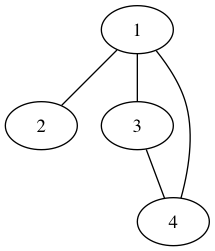

In [63]:
import pydot
from IPython.display import Image

edges=[(1,2), (1,3), (1,4), (3,4)]
g=pydot.graph_from_edges(edges)
g.write_jpeg('dot.jpg', prog='dot')
Image(g.create_png())

0: ('吾輩_は', '見_た_。')
1: ('ここ_で', '始め_て')
2: ('始め_て', '人間_という')
3: ('人間_という', 'もの_を')
4: ('もの_を', '見_た_。')


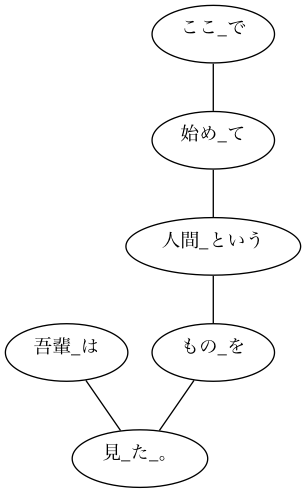

In [76]:
class Morph(object):
    def __init__(self, surface, base, pos, pos1):
        self.surface = surface
        self.base = base
        self.pos = pos
        self.pos1 = pos1


class Chunk(object):
    def __init__(self, idx=-1, morphs=[], dst=-1, srcs=[]):
        self.idx = idx
        self.morphs = morphs
        self.dst = dst
        self.srcs = srcs


doc = []

skip_empty_line = False

with open("neko.txt.cabocha") as f:
    lines = f.readlines()
    chunks = []
    chunk = Chunk()
    morphs = []
    for line in lines:
        line = line[:-1]
        # Enter new chunk
        if line.startswith("*"):
            if len(morphs) > 0:
                chunk.morphs = morphs
                chunks.append(chunk)
                morphs = []

            # parse chunk
            idx, dst, _, score = line[2:].split(" ")
            dst = dst[:-1]  # remove "D"
            idx, dst, score = int(idx), int(dst), float(score)
            chunk = Chunk(idx=idx, morphs=[], dst=dst, srcs=[])
            continue
        elif line == "EOS":
            # todo: remove dup
            if len(morphs) > 0:
                chunk.morphs = morphs
                chunks.append(chunk)
                morphs = []

            if not skip_empty_line or len(chunks) > 0:
                if len(chunks) > 0:
                    assert chunks[0].idx == 0
                for chunk in chunks:
                    chunk.srcs = (
                        list(map(lambda c: c.idx, filter(lambda c: chunk.idx == c.dst, chunks))))
                doc.append(chunks)
            chunks = []
            morphs = []
            continue

        # parse POS tagging result
        surface, rest = line.split("\t")
        rest = rest.split(",")

        assert len(rest) >= 6
        pos, pos1, base = rest[0], rest[1], rest[6]

        m = Morph(surface, base, pos, pos1)
        morphs.append(m)

import pydot
from IPython.display import Image

def vis_dag(chunks):
    chunk_names = list(map(lambda chunk: "_".join(
        [m.surface for m in chunk.morphs]), chunks))
    edges = []
    for idx, chunk in enumerate(chunks):
        if chunk.dst < 0:
            continue
        edges.append((chunk_names[idx], chunk_names[chunk.dst]))
    for idx, edge in enumerate(edges):
        print("{}: {}".format(idx, edge))
    if True:
        g = pydot.graph_from_edges(edges)
        g.write_png("dot.png", prog="dot")
        Image(g.create_png())


vis_dag(doc[7])
from IPython.display import Image, display_png
display_png(Image('dot.png'))

45  動詞の格パターンの抽出  
今回用いている文章をコーパスと見なし，日本語の述語が取りうる格を調査したい． 動詞を述語，動詞に係っている文節の助詞を格と考え，述語と格をタブ区切り形式で出力せよ． ただし，出力は以下の仕様を満たすようにせよ．  

動詞を含む文節において，最左の動詞の基本形を述語とする  
述語に係る助詞を格とする  
述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる  
「吾輩はここで始めて人間というものを見た」という例文（neko.txt.cabochaの8文目）を考える． この文は「始める」と「見る」の２つの動詞を含み，「始める」に係る文節は「ここで」，「見る」に係る文節は「吾輩は」と「ものを」と解析された場合は，次のような出力になるはずである．  

始める  で  
見る    は を  
このプログラムの出力をファイルに保存し，以下の事項をUNIXコマンドを用いて確認せよ．  

コーパス中で頻出する述語と格パターンの組み合わせ  
「する」「見る」「与える」という動詞の格パターン（コーパス中で出現頻度の高い順に並べよ）  


46 動詞の格フレーム情報の抽出  
45のプログラムを改変し，述語と格パターンに続けて項（述語に係っている文節そのもの）をタブ区切り形式で出力せよ．45の仕様に加えて，以下の仕様を満たすようにせよ．  

項は述語に係っている文節の単語列とする（末尾の助詞を取り除く必要はない）  
述語に係る文節が複数あるときは，助詞と同一の基準・順序でスペース区切りで並べる  
「吾輩はここで始めて人間というものを見た」という例文（neko.txt.cabochaの8文目）を考える． この文は「始める」と「見る」の２つの動詞を含み，「始める」に係る文節は「ここで」，「見る」に係る文節は「吾輩は」と「ものを」と解析された場合は，次のような出力になるはずである．  

始める  で      ここで  
見る    は を   吾輩は ものを  


47 機能動詞構文のマイニング  
動詞のヲ格にサ変接続名詞が入っている場合のみに着目したい．46のプログラムを以下の仕様を満たすように改変せよ．  

「サ変接続名詞+を（助詞）」で構成される文節が動詞に係る場合のみを対象とする  
述語は「サ変接続名詞+を+動詞の基本形」とし，文節中に複数の動詞があるときは，最左の動詞を用いる  
述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる  
述語に係る文節が複数ある場合は，すべての項をスペース区切りで並べる（助詞の並び順と揃えよ）  
例えば「別段くるにも及ばんさと、主人は手紙に返事をする。」という文から，以下の出力が得られるはずである．  

返事をする      と に は        及ばんさと 手紙に 主人は  
このプログラムの出力をファイルに保存し，以下の事項をUNIXコマンドを用いて確認せよ．  

コーパス中で頻出する述語（サ変接続名詞+を+動詞）  
コーパス中で頻出する述語と助詞パターン  


48 名詞から根へのパスの抽出  
文中のすべての名詞を含む文節に対し，その文節から構文木の根に至るパスを抽出せよ． ただし，構文木上のパスは以下の仕様を満たすものとする．  
  
各文節は（表層形の）形態素列で表現する  
パスの開始文節から終了文節に至るまで，各文節の表現を"->"で連結する  
「吾輩はここで始めて人間というものを見た」という文（neko.txt.cabochaの8文目）から，次のような出力が得られるはずである．  
  
吾輩は -> 見た  
ここで -> 始めて -> 人間という -> ものを -> 見た  
人間という -> ものを -> 見た  
ものを -> 見た  


49 名詞間の係り受けパスの抽出  
文中のすべての名詞句のペアを結ぶ最短係り受けパスを抽出せよ．ただし，名詞句ペアの文節番号がiとj（i<j）のとき，係り受けパスは以下の仕様を満たすものとする．  
  
問題48と同様に，パスは開始文節から終了文節に至るまでの各文節の表現（表層形の形態素列）を"->"で連結して表現する  
文節iとjに含まれる名詞句はそれぞれ，XとYに置換する  
また，係り受けパスの形状は，以下の2通りが考えられる．  
  
文節iから構文木の根に至る経路上に文節jが存在する場合: 文節iから文節jのパスを表示  
上記以外で，文節iと文節jから構文木の根に至る経路上で共通の文節kで交わる場合: 文節iから文節kに至る直前のパスと文節jから文節kに至る直前までのパス，文節kの内容を"|"で連結して表示  
例えば，「吾輩はここで始めて人間というものを見た。」という文（neko.txt.cabochaの8文目）から，次のような出力が得られるはずである．  
  
Xは | Yで -> 始めて -> 人間という -> ものを | 見た  
Xは | Yという -> ものを | 見た  
Xは | Yを | 見た  
Xで -> 始めて -> Y  
Xで -> 始めて -> 人間という -> Y  
Xという -> Y  
  